# Load the old model developed in Part I

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
import pandas as pd
df = pd.read_csv("nba.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 52 columns):
Number                           486 non-null int64
Season_Start                     486 non-null int64
Player_Name                      486 non-null object
Salary                           484 non-null float64
Position                         486 non-null object
Age                              486 non-null int64
Team                             486 non-null object
Games_Played                     486 non-null int64
Games_Started                    486 non-null int64
Minutes_Played                   486 non-null int64
Player_Efficiency_Rating         486 non-null float64
True_Shooting_Pct                485 non-null float64
Three_Point_Attempt_Rate         485 non-null float64
Free_Throw_Rate                  485 non-null float64
Offensive_Rebound_Pct            486 non-null float64
Defensive_Rebound_Pct            486 non-null float64
Total_Rebound_Pct                486 non-null 

**This code chunk will change all of object classes to numerical values**

In [3]:
# Data transformation
# Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
# Encoding the categorical variable
fit = df.select_dtypes(include=['object']).apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    df[i] = d[i].transform(df[i])

**The `features` DataFrame is everything but Salary (which is what we want to predict)**  

**Salary will be its own DataFrame called `labels`**

In [4]:
features = df[df.columns.difference(["Salary"])]
labels = df["Salary"]

**There are some null values that we need to replace with 0**

In [5]:
pd.set_option('display.max_rows', 500)
labels.isnull()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [6]:
labels = labels.fillna(0)

In [7]:
pd.set_option('display.max_columns', 500)
features.isnull().values.any()

True

In [8]:
features.isnull().sum()

Age                               0
Assists                           0
Assists_Pct                       0
Blocks                            0
Blocks_Pct                        0
Box_Plus_Minus                    0
Defensive_Box_Plus_Minus          0
Defensive_Rebound_Pct             0
Defensive_Rebounds                0
Defensive_Win_Shares              0
Effective_Field_Goal_Pct          1
Field_Goal_Pct                    1
Field_Goals                       0
Field_Goals_Attempted             0
Free_Throw_Rate                   1
Free_Throws                       0
Free_Throws_Attempted             0
Free_Throws_Pct                  15
Games_Played                      0
Games_Started                     0
Minutes_Played                    0
Number                            0
Offensive_Box_Plus_Minus          0
Offensive_Rebound_Pct             0
Offensive_Rebounds                0
Offensive_Win_Shares              0
Personal_Fouls                    0
Player_Efficiency_Rating    

In [9]:
features = features.fillna(0)
features.isnull().sum()

Age                              0
Assists                          0
Assists_Pct                      0
Blocks                           0
Blocks_Pct                       0
Box_Plus_Minus                   0
Defensive_Box_Plus_Minus         0
Defensive_Rebound_Pct            0
Defensive_Rebounds               0
Defensive_Win_Shares             0
Effective_Field_Goal_Pct         0
Field_Goal_Pct                   0
Field_Goals                      0
Field_Goals_Attempted            0
Free_Throw_Rate                  0
Free_Throws                      0
Free_Throws_Attempted            0
Free_Throws_Pct                  0
Games_Played                     0
Games_Started                    0
Minutes_Played                   0
Number                           0
Offensive_Box_Plus_Minus         0
Offensive_Rebound_Pct            0
Offensive_Rebounds               0
Offensive_Win_Shares             0
Personal_Fouls                   0
Player_Efficiency_Rating         0
Player_Name         

**Now we can subset the data to include only the relevant features defined in Part I of this project.  These were:**  

***Age, Player_Efficiency_Rating, Blocks, Turnovers_Pct, Steals, Assists_Pct, Games_Started, Games_Played, Total_Rebounds, Field_Goals, Defensive_Box_Plus_Minus, Defensive_Rebound_Pct, Usage_Pct, and Free_Throws***

In [10]:
nba_subset = df[["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws"]]
nba_subset.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws
0,1312611.0,24,8.4,13,16.4,1,3.8,0,22,36,17,1.9,20.9,17.6,9
1,2116955.0,32,9.5,9,17.2,25,20.7,0,65,69,121,-2.6,6.3,19.2,32
2,5504420.0,21,14.4,40,8.5,64,10.5,72,80,405,393,-0.4,14.1,20.1,156
3,365289.0,22,-2.2,0,0.0,0,22.6,0,5,3,0,-2.1,19.5,12.9,1
4,2022240.0,25,14.4,7,11.4,8,8.0,0,18,33,23,0.7,21.0,23.1,14


**We now need to get our dataset ready for our model**  

The *first line* of code below creates an object of the target variable called "target_column".  
The *second line* gives us the list of all the features, excluding the target variable of Salary.  
The *third line* normalizes the predictors.  This is done because the units of the variables differ significantly and may influence the modeling process. To prevent this, we will do normalization via scaling of the predictors between 0 and 1.  
The *fourth line* displays the summary of the normalized data.  We can see that all the independent variables have now been scaled between 0 and 1. The target variable (Salary) remains unchanged.

In [11]:
import warnings
warnings.filterwarnings("ignore")

target_column = ['Salary'] 
predictors = list(set(list(nba_subset.columns))-set(target_column))
nba_subset[predictors] = nba_subset[predictors]/nba_subset[predictors].max()
nba_subset.describe()

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws
count,4.840000e+02,486.000000,486.000000,486.000000,485.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,6.717244e+06,0.660134,0.413358,0.112342,0.293786,0.248395,0.228058,0.308642,0.655902,0.197394,0.239874,-0.025394,0.152119,0.446255,0.121038
std,7.376188e+06,0.108630,0.182934,0.136705,0.122302,0.208235,0.160085,0.350194,0.302874,0.178025,0.211975,0.169428,0.073374,0.134222,0.146365
min,1.722400e+04,0.475000,-0.558730,0.000000,0.000000,0.000000,0.000000,0.000000,0.012195,0.000000,0.000000,-0.591667,0.000000,0.000000,0.000000
25%,1.471382e+06,0.575000,0.311111,0.023364,0.220183,0.082803,0.113874,0.012195,0.429878,0.058020,0.066748,-0.133333,0.103250,0.350120,0.025804
50%,3.343830e+06,0.650000,0.406349,0.070093,0.284404,0.210191,0.176265,0.134146,0.762195,0.159498,0.194782,-0.025000,0.140500,0.434053,0.076408
75%,1.004073e+07,0.725000,0.501587,0.149533,0.353211,0.361465,0.306719,0.606707,0.914634,0.273970,0.351638,0.075000,0.188750,0.515588,0.158177
max,3.468255e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Now to make the TEST and TRAINING datasets.  We will be using a 70/30 train/test ratio**

In [12]:
nba_subset.isnull().sum()

Salary                      2
Age                         0
Player_Efficiency_Rating    0
Blocks                      0
Turnovers_Pct               1
Steals                      0
Assists_Pct                 0
Games_Started               0
Games_Played                0
Total_Rebounds              0
Field_Goals                 0
Defensive_Box_Plus_Minus    0
Defensive_Rebound_Pct       0
Usage_Pct                   0
Free_Throws                 0
dtype: int64

In [13]:
nba_subset = nba_subset.fillna(0)

**We now separate our data into TRAINING and TEST subsets.  This will be at a 70/30 ratio.**

In [14]:
X = nba_subset[predictors].values
y = nba_subset[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(340, 14)
(146, 14)


**Now we can run the Xgboost Regression model**

In [15]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(X_train, y_train, verbose=False)
y_train_pred1 = xgb_model1.predict(X_train)
y_pred1 = xgb_model1.predict(X_test)

print('Train r2 score: ', r2_score(y_train_pred1, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, y_train)
test_mse1 = mean_squared_error(y_pred1, y_test)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[13:19:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.9221592427857032
Test r2 score:  0.6506232636580878
Train RMSE: 1818765.6973
Test RMSE: 4530414.8808


# Loading the new data from our web scraping application

In [16]:
# This is a snippet for basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Loading the scraped DataFrame**

In [17]:
final = pd.read_csv("final.csv")
final = final.dropna()
final.head(3)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year,Salary
1,Arron Afflalo,SG,24.0,DEN,82.0,75.0,2221.0,272.0,585.0,0.465,108.0,249.0,0.434,164.0,336.0,0.488,0.557,72.0,98.0,0.735,59.0,193.0,252.0,138.0,46.0,30.0,74.0,225.0,10.9,0.576,0.426,0.168,3.1,9.9,6.5,9.3,1.0,1.0,10.5,14.0,2.8,1.4,4.3,0.092,-0.2,-0.2,-0.4,0.9,2010.0,1086240.0
3,LaMarcus Aldridge,PF,24.0,POR,78.0,78.0,2922.0,579.0,1169.0,0.495,5.0,16.0,0.313,574.0,1153.0,0.498,0.497,230.0,304.0,0.757,192.0,435.0,627.0,160.0,67.0,48.0,104.0,231.0,18.2,0.535,0.014,0.260,8.1,18.6,13.3,9.9,1.3,1.3,7.4,22.9,5.5,3.3,8.8,0.145,1.4,-0.2,1.2,2.3,2010.0,5844827.0
5,Joe Alexander,SF,23.0,CHI,8.0,0.0,29.0,1.0,6.0,0.167,0.0,1.0,0.000,1.0,5.0,0.200,0.167,2.0,3.0,0.667,2.0,3.0,5.0,2.0,1.0,1.0,0.0,9.0,2.8,0.273,0.167,0.500,7.8,11.3,9.6,9.3,1.8,2.6,0.0,11.3,0.0,0.0,0.0,0.030,-9.1,0.9,-8.3,0.0,2010.0,2583360.0


In [18]:
final.shape

(3638, 50)

**Changing the column names to the names we used in our previous model**

In [19]:
final = final.rename(columns={'Player': 'Player_Name',
                              'Pos': 'Position',
                              'Age': 'Age',
                              'Tm': 'Team',
                              'G': 'Games_Played',
                              'GS': 'Games_Started',
                              'MP': 'Minutes_Played',
                              'FG': 'Field_Goals',
                              'FGA': 'Field_Goals_Attempted',
                              'FG%': 'Field_Goal_Pct',
                              '3P': 'Three_Pointers',
                              '3PA': 'Three_Pointers_Attempted',
                              '3P%': 'Three_Pointers_Pct',
                              '2P': 'Two_Pointers',
                              '2PA': 'Two_Pointers_Attempted',
                              '2P%': 'Two_Pointers_Pct',
                              'eFG%': 'Effective_Field_Goal_Pct',
                              'FT': 'Free_Throws',
                              'FTA': 'Free_Throws_Attempted',
                              'FT%': 'Free_Throws_Pct',
                              'ORB': 'Offensive_Rebounds',
                              'DRB': 'Defensive_Rebounds',
                              'TRB': 'Total_Rebounds',
                              'AST': 'Assists',
                              'STL': 'Steals',
                              'BLK': 'Blocks',
                              'TOV': 'Turnovers',
                              'PF': 'Personal_Fouls',
                              'PER': 'Player_Efficiency_Rating',
                              'TS%': 'True_Shooting_Pct',
                              '3PAr': 'Three_Point_Attempt_Rate',
                              'FTr': 'Free_Throw_Rate',
                              'ORB%': 'Offensive_Rebound_Pct',
                              'DRB%': 'Defensive_Rebound_Pct',
                              'TRB%': 'Total_Rebound_Pct',
                              'AST%': 'Assists_Pct',
                              'STL%': 'Steals_Pct',
                              'BLK%': 'Blocks_Pct',
                              'TOV%': 'Turnovers_Pct',
                              'USG%': 'Usage_Pct',
                              'OWS': 'Offensive_Win_Shares',
                              'DWS': 'Defensive_Win_Shares',
                              'WS': 'Win_Shares',
                              'WS/48': 'Win_Shares/48',
                              'OBPM': 'Offensive_Box_Plus_Minus',
                              'DBPM': 'Defensive_Box_Plus_Minus',
                              'BPM': 'Box_Plus_Minus',
                              'VORP': 'Value_Over_Replacement_Player',
                              'Year': 'Year',
                              'Salary': 'Salary'})                              

**Separating the DataFrames into years**

**This code chunk will change all of object classes to numerical values**

In [20]:
final_10 = final[final.Year.eq(2010)]
final_11 = final[final.Year.eq(2011)]
final_12 = final[final.Year.eq(2012)]
final_13 = final[final.Year.eq(2013)]
final_14 = final[final.Year.eq(2014)]
final_15 = final[final.Year.eq(2015)]
final_16 = final[final.Year.eq(2016)]
final_17 = final[final.Year.eq(2017)]
final_18 = final[final.Year.eq(2018)]
final_19 = final[final.Year.eq(2019)]

**We need to make an individual dataframe of just the player names that we will be using later**

In [21]:
names_10_actual = final_10["Player_Name"]
names_11_actual = final_11["Player_Name"]
names_12_actual = final_12["Player_Name"]
names_13_actual = final_13["Player_Name"]
names_14_actual = final_14["Player_Name"]
names_15_actual = final_15["Player_Name"]
names_16_actual = final_16["Player_Name"]
names_17_actual = final_17["Player_Name"]
names_18_actual = final_18["Player_Name"]
names_19_actual = final_19["Player_Name"]

In [22]:
# Data transformation
# Convert categorical values to numeric using label encoder
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)
# Encoding the categorical variable
fit = final.select_dtypes(include=['object']).apply(lambda x: d[x.name].fit_transform(x))

#Convert the categorical columns based on encoding
for i in list(d.keys()):
    final[i] = d[i].transform(final[i])

**Separating the DataFrames into years**

In [23]:
final_10 = final[final.Year.eq(2010)]
final_11 = final[final.Year.eq(2011)]
final_12 = final[final.Year.eq(2012)]
final_13 = final[final.Year.eq(2013)]
final_14 = final[final.Year.eq(2014)]
final_15 = final[final.Year.eq(2015)]
final_16 = final[final.Year.eq(2016)]
final_17 = final[final.Year.eq(2017)]
final_18 = final[final.Year.eq(2018)]
final_19 = final[final.Year.eq(2019)]

**We need to make an individual dataframe of just the player names that we will be using later**

In [24]:
names_10 = final_10["Player_Name"]
names_11 = final_11["Player_Name"]
names_12 = final_12["Player_Name"]
names_13 = final_13["Player_Name"]
names_14 = final_14["Player_Name"]
names_15 = final_15["Player_Name"]
names_16 = final_16["Player_Name"]
names_17 = final_17["Player_Name"]
names_18 = final_18["Player_Name"]
names_19 = final_19["Player_Name"]

**The `features` DataFrame is everything but Salary (which is what we want to predict)**

**Salary will be its own DataFrame called `labels`**


In [25]:
features_10 = final_10[final_10.columns.difference(["Salary"])]
features_11 = final_11[final_11.columns.difference(["Salary"])]
features_12 = final_12[final_12.columns.difference(["Salary"])]
features_13 = final_13[final_13.columns.difference(["Salary"])]
features_14 = final_14[final_14.columns.difference(["Salary"])]
features_15 = final_15[final_15.columns.difference(["Salary"])]
features_16 = final_16[final_16.columns.difference(["Salary"])]
features_17 = final_17[final_17.columns.difference(["Salary"])]
features_18 = final_18[final_18.columns.difference(["Salary"])]
features_19 = final_19[final_19.columns.difference(["Salary"])]

labels_10 = final_10["Salary"]
labels_11 = final_11["Salary"]
labels_12 = final_12["Salary"]
labels_13 = final_13["Salary"]
labels_14 = final_14["Salary"]
labels_15 = final_15["Salary"]
labels_16 = final_16["Salary"]
labels_17 = final_17["Salary"]
labels_18 = final_18["Salary"]
labels_19 = final_19["Salary"]

**The web scraping script automatically ignored players who did not have a reported salary.  Therefore, we do not need to check for zero values in the Salary column.**

**Checking the features column for zero values**

In [26]:
pd.set_option('display.max_columns', 500)
print(features_10.isnull().values.any())
print(features_11.isnull().values.any())
print(features_12.isnull().values.any())
print(features_13.isnull().values.any())
print(features_14.isnull().values.any())
print(features_15.isnull().values.any())
print(features_16.isnull().values.any())
print(features_17.isnull().values.any())
print(features_18.isnull().values.any())
print(features_19.isnull().values.any())

False
False
False
False
False
False
False
False
False
False


**Since we already know the features we are going to include in our model, we can go ahead and make a subset with just those features.**

In [27]:
nba_subset_10 = final_10[["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws"]]
nba_subset_11 = final_11[["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws"]]
nba_subset_12 = final_12[["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws"]]
nba_subset_13 = final_13[["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws"]]
nba_subset_14 = final_14[["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws"]]
nba_subset_15 = final_15[["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws"]]
nba_subset_16 = final_16[["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws"]]
nba_subset_17 = final_17[["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws"]]
nba_subset_18 = final_18[["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws"]]
nba_subset_19 = final_19[["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws"]]

**We now need to get our dataset ready for our model**  

The *first line* of code below creates an object of the target variable called "target_column".  
The *second line* gives us the list of all the features, excluding the target variable of Salary.  
The *third line* normalizes the predictors.  This is done because the units of the variables differ significantly and may influence the modeling process. To prevent this, we will do normalization via scaling of the predictors between 0 and 1.  
The *fourth line* displays the summary of the normalized data.  We can see that all the independent variables have now been scaled between 0 and 1. The target variable (Salary) remains unchanged

In [28]:
import warnings
warnings.filterwarnings("ignore")

target_column_10 = ['Salary']
target_column_11 = ['Salary']
target_column_12 = ['Salary']
target_column_13 = ['Salary']
target_column_14 = ['Salary']
target_column_15 = ['Salary']
target_column_16 = ['Salary']
target_column_17 = ['Salary']
target_column_18 = ['Salary']
target_column_19 = ['Salary']

predictors_10 = list(set(list(nba_subset_10.columns))-set(target_column_10))
predictors_11 = list(set(list(nba_subset_11.columns))-set(target_column_11))
predictors_12 = list(set(list(nba_subset_12.columns))-set(target_column_12))
predictors_13 = list(set(list(nba_subset_13.columns))-set(target_column_13))
predictors_14 = list(set(list(nba_subset_14.columns))-set(target_column_14))
predictors_15 = list(set(list(nba_subset_15.columns))-set(target_column_15))
predictors_16 = list(set(list(nba_subset_16.columns))-set(target_column_16))
predictors_17 = list(set(list(nba_subset_17.columns))-set(target_column_17))
predictors_18 = list(set(list(nba_subset_18.columns))-set(target_column_18))
predictors_19 = list(set(list(nba_subset_19.columns))-set(target_column_19))

nba_subset_10[predictors_10] = nba_subset_10[predictors_10]/nba_subset_10[predictors_10].max()
nba_subset_11[predictors_11] = nba_subset_11[predictors_11]/nba_subset_11[predictors_11].max()
nba_subset_12[predictors_12] = nba_subset_12[predictors_12]/nba_subset_12[predictors_12].max()
nba_subset_13[predictors_13] = nba_subset_13[predictors_13]/nba_subset_13[predictors_13].max()
nba_subset_14[predictors_14] = nba_subset_14[predictors_14]/nba_subset_14[predictors_14].max()
nba_subset_15[predictors_15] = nba_subset_15[predictors_15]/nba_subset_15[predictors_15].max()
nba_subset_16[predictors_16] = nba_subset_16[predictors_16]/nba_subset_16[predictors_16].max()
nba_subset_17[predictors_17] = nba_subset_17[predictors_17]/nba_subset_17[predictors_17].max()
nba_subset_18[predictors_18] = nba_subset_18[predictors_18]/nba_subset_18[predictors_18].max()
nba_subset_19[predictors_19] = nba_subset_19[predictors_19]/nba_subset_19[predictors_19].max()

#Just showing one of the datasets to make sure the normalization worked
nba_subset_19.describe()

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws
count,3.980000e+02,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,7.067359e+06,0.622577,0.409578,0.129681,0.450433,0.247960,0.295123,0.332853,0.689698,0.191304,0.265122,-0.023451,0.250044,0.467399,0.126644
std,8.103553e+06,0.102421,0.147215,0.142415,0.140954,0.188784,0.180916,0.351045,0.257215,0.151345,0.208630,0.307322,0.108030,0.126975,0.134994
min,4.737000e+03,0.452381,0.027356,0.000000,0.000000,0.000000,0.000000,0.000000,0.036585,0.002435,0.002372,-1.142857,0.063018,0.192593,0.000000
25%,1.512601e+06,0.547619,0.319149,0.035176,0.358209,0.100000,0.162105,0.024390,0.524390,0.078937,0.098161,-0.214286,0.172886,0.380247,0.035809
50%,3.369804e+06,0.619048,0.386018,0.085427,0.432836,0.211765,0.240000,0.182927,0.768293,0.159497,0.223606,-0.023810,0.223051,0.441975,0.078912
75%,1.000000e+07,0.690476,0.495441,0.170854,0.529851,0.347059,0.386316,0.646341,0.902439,0.257102,0.366251,0.166667,0.300166,0.545679,0.173408
max,3.745715e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Running 2010 Data in the Model

In [29]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(features_10, labels_10, verbose=False)
y_train_pred1 = xgb_model1.predict(features_10)
y_pred1 = xgb_model1.predict(features_10)

print('Train r2 score: ', r2_score(y_train_pred1, labels_10))
print('Test r2 score: ', r2_score(labels_10, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, labels_10)
test_mse1 = mean_squared_error(y_pred1, labels_10)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[13:21:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.9319146481117234
Test r2 score:  0.9455469368276412
Train RMSE: 1099626.5634
Test RMSE: 1099626.5634


In [30]:
y_train_xgb = pd.DataFrame(labels_10, columns=["Salary"])
y_predict_xgb = pd.DataFrame(y_train_pred1, columns=["Prediction"])

train_predictions_xgb = pd.DataFrame(np.concatenate([nba_subset_10, y_predict_xgb], axis=1), columns= ["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws", "Prediction"])
train_predictions_xgb.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws,Prediction
0,1086240.0,0.615385,0.350482,0.131579,0.346535,0.243386,0.204846,0.914634,1.000000,0.232902,0.342569,-0.060606,0.310345,0.359897,0.095238,1676065.625
1,5844827.0,0.615385,0.585209,0.210526,0.244224,0.354497,0.218062,0.951220,0.951220,0.579482,0.729219,-0.060606,0.583072,0.588689,0.304233,6664083.500
2,2583360.0,0.589744,0.090032,0.004386,0.000000,0.005291,0.204846,0.000000,0.097561,0.004621,0.001259,0.272727,0.354232,0.290488,0.002646,2360716.500
3,1300000.0,0.794872,0.189711,0.021930,0.504950,0.058201,0.112335,0.036585,0.621951,0.075786,0.057935,-0.303030,0.360502,0.359897,0.015873,1692061.875
4,2500000.0,0.717949,0.456592,0.083333,0.587459,0.312169,0.286344,0.097561,0.658537,0.134011,0.162469,0.666667,0.391850,0.503856,0.095238,3330890.000


In [31]:
final_df = pd.concat([y_predict_xgb, final_10], axis=1)
final_df = final_df.drop(['Player_Name'], axis=1)
final_df = final_df.drop(final_df.columns[3], axis=1)

final_df = pd.concat([final_df, names_10_actual], axis=1)
final_df = final_df.dropna()
final_df.head(5)

,Prediction,Position,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,True_Shooting_Pct,Three_Point_Attempt_Rate,Free_Throw_Rate,Offensive_Rebound_Pct,Defensive_Rebound_Pct,Total_Rebound_Pct,Assists_Pct,Steals_Pct,Blocks_Pct,Turnovers_Pct,Usage_Pct,Offensive_Win_Shares,Defensive_Win_Shares,Win_Shares,Win_Shares/48,Offensive_Box_Plus_Minus,Defensive_Box_Plus_Minus,Box_Plus_Minus,Value_Over_Replacement_Player,Year,Salary,Player_Name
1,6664083.500,10.0,24.0,82.0,75.0,2221.0,272.0,585.0,0.465,108.0,249.0,0.434,164.0,336.0,0.488,0.557,72.0,98.0,0.735,59.0,193.0,252.0,138.0,46.0,30.0,74.0,225.0,10.9,0.576,0.426,0.168,3.1,9.9,6.5,9.3,1.0,1.0,10.5,14.0,2.8,1.4,4.3,0.092,-0.2,-0.2,-0.4,0.9,2010.0,1086240.0,Arron Afflalo
3,1692061.875,2.0,24.0,78.0,78.0,2922.0,579.0,1169.0,0.495,5.0,16.0,0.313,574.0,1153.0,0.498,0.497,230.0,304.0,0.757,192.0,435.0,627.0,160.0,67.0,48.0,104.0,231.0,18.2,0.535,0.014,0.260,8.1,18.6,13.3,9.9,1.3,1.3,7.4,22.9,5.5,3.3,8.8,0.145,1.4,-0.2,1.2,2.3,2010.0,5844827.0,LaMarcus Aldridge
5,2098974.500,7.0,23.0,8.0,0.0,29.0,1.0,6.0,0.167,0.0,1.0,0.000,1.0,5.0,0.200,0.167,2.0,3.0,0.667,2.0,3.0,5.0,2.0,1.0,1.0,0.0,9.0,2.8,0.273,0.167,0.500,7.8,11.3,9.6,9.3,1.8,2.6,0.0,11.3,0.0,0.0,0.0,0.030,-9.1,0.9,-8.3,0.0,2010.0,2583360.0,Joe Alexander
7,4331724.500,2.0,31.0,51.0,3.0,456.0,46.0,116.0,0.397,1.0,6.0,0.167,45.0,110.0,0.409,0.401,12.0,13.0,0.923,36.0,46.0,82.0,16.0,11.0,5.0,22.0,68.0,5.9,0.431,0.052,0.112,9.2,11.5,10.4,5.1,1.2,0.8,15.3,14.0,-0.3,0.3,0.1,0.009,-4.7,-1.0,-5.7,-0.4,2010.0,1300000.0,Malik Allen
9,1338712.875,10.0,28.0,54.0,8.0,889.0,129.0,253.0,0.510,0.0,5.0,0.000,129.0,248.0,0.520,0.510,72.0,119.0,0.605,52.0,93.0,145.0,72.0,59.0,19.0,66.0,109.0,14.2,0.540,0.020,0.470,7.4,12.5,10.0,13.0,3.5,1.7,17.8,19.6,0.2,1.6,1.9,0.100,-1.8,2.2,0.4,0.5,2010.0,2500000.0,Tony Allen


In [32]:
final_df['Salary-Prediction'] = final_df['Salary'] - final_df['Prediction']

**Rearranging the columns**

In [33]:
cols = list(final_df.columns.values)

In [34]:
cols = ['Player_Name', 'Salary', 'Prediction', 'Salary-Prediction', 'Age',
 'Games_Played',
 'Games_Started',
 'Minutes_Played',
 'Field_Goals',
 'Field_Goals_Attempted',
 'Field_Goal_Pct',
 'Three_Pointers',
 'Three_Pointers_Attempted',
 'Three_Pointers_Pct',
 'Two_Pointers',
 'Two_Pointers_Attempted',
 'Two_Pointers_Pct',
 'Effective_Field_Goal_Pct',
 'Free_Throws',
 'Free_Throws_Attempted',
 'Free_Throws_Pct',
 'Offensive_Rebounds',
 'Defensive_Rebounds',
 'Total_Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Personal_Fouls',
 'Player_Efficiency_Rating',
 'Turnovers_Pct',
 'Assists_Pct',
 'Defensive_Box_Plus_Minus',
 'Defensive_Rebound_Pct',
 'Usage_Pct']

final_df = final_df[cols]
final_df['Prediction'] = final_df['Prediction'].astype('int64')

final_df.head(5)

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
1,Arron Afflalo,1086240.0,6664083,-5577843.500,24.0,82.0,75.0,2221.0,272.0,585.0,0.465,108.0,249.0,0.434,164.0,336.0,0.488,0.557,72.0,98.0,0.735,59.0,193.0,252.0,138.0,46.0,30.0,74.0,225.0,10.9,10.5,9.3,-0.2,9.9,14.0
3,LaMarcus Aldridge,5844827.0,1692061,4152765.125,24.0,78.0,78.0,2922.0,579.0,1169.0,0.495,5.0,16.0,0.313,574.0,1153.0,0.498,0.497,230.0,304.0,0.757,192.0,435.0,627.0,160.0,67.0,48.0,104.0,231.0,18.2,7.4,9.9,-0.2,18.6,22.9
5,Joe Alexander,2583360.0,2098974,484385.500,23.0,8.0,0.0,29.0,1.0,6.0,0.167,0.0,1.0,0.000,1.0,5.0,0.200,0.167,2.0,3.0,0.667,2.0,3.0,5.0,2.0,1.0,1.0,0.0,9.0,2.8,0.0,9.3,0.9,11.3,11.3
7,Malik Allen,1300000.0,4331724,-3031724.500,31.0,51.0,3.0,456.0,46.0,116.0,0.397,1.0,6.0,0.167,45.0,110.0,0.409,0.401,12.0,13.0,0.923,36.0,46.0,82.0,16.0,11.0,5.0,22.0,68.0,5.9,15.3,5.1,-1.0,11.5,14.0
9,Tony Allen,2500000.0,1338712,1161287.125,28.0,54.0,8.0,889.0,129.0,253.0,0.510,0.0,5.0,0.000,129.0,248.0,0.520,0.510,72.0,119.0,0.605,52.0,93.0,145.0,72.0,59.0,19.0,66.0,109.0,14.2,17.8,13.0,2.2,12.5,19.6


In [35]:
final_df_overpaid_10 = final_df.sort_values("Salary-Prediction", ascending = False)
top_10_overpaid_10 = final_df_overpaid_10.head(10)
top_10_overpaid_10

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
195,Tim Duncan,22183220.0,880920,2.130230e+07,33.0,78.0,77.0,2438.0,561.0,1082.0,0.518,2.0,11.0,0.182,559.0,1071.0,0.522,0.519,271.0,374.0,0.725,221.0,567.0,788.0,246.0,45.0,117.0,140.0,152.0,24.7,10.1,17.8,1.8,26.8,26.0
109,Kobe Bryant,23034375.0,3125619,1.990876e+07,31.0,73.0,73.0,2835.0,716.0,1569.0,0.456,99.0,301.0,0.329,617.0,1268.0,0.487,0.488,439.0,541.0,0.811,78.0,313.0,391.0,365.0,113.0,20.0,233.0,187.0,21.9,11.4,23.8,0.2,12.2,32.3
91,Elton Brand,14858472.0,907392,1.395108e+07,30.0,76.0,57.0,2297.0,412.0,858.0,0.480,0.0,1.0,0.000,412.0,857.0,0.481,0.480,172.0,233.0,0.738,179.0,282.0,461.0,109.0,82.0,80.0,131.0,232.0,15.7,12.0,7.9,-0.7,14.7,21.7
133,Vince Carter,16123250.0,3793071,1.233018e+07,33.0,75.0,74.0,2310.0,434.0,1015.0,0.428,119.0,324.0,0.367,315.0,691.0,0.456,0.486,257.0,306.0,0.840,33.0,260.0,293.0,236.0,53.0,18.0,106.0,189.0,17.1,8.4,17.8,0.4,12.6,25.2
21,Carmelo Anthony,15779912.0,4990881,1.078903e+07,25.0,69.0,69.0,2634.0,688.0,1502.0,0.458,59.0,187.0,0.316,629.0,1315.0,0.478,0.478,508.0,612.0,0.830,152.0,302.0,454.0,222.0,88.0,30.0,209.0,225.0,22.2,10.6,15.9,-1.2,13.1,33.4
337,Andre Iguodala,12200000.0,1443273,1.075673e+07,26.0,82.0,82.0,3193.0,496.0,1120.0,0.443,94.0,303.0,0.310,402.0,817.0,0.492,0.485,315.0,430.0,0.733,82.0,447.0,529.0,472.0,141.0,55.0,218.0,145.0,17.8,14.3,23.7,0.4,16.8,21.8
321,Josh Howard,10890000.0,242632,1.064737e+07,29.0,35.0,12.0,918.0,157.0,388.0,0.405,23.0,86.0,0.267,134.0,302.0,0.444,0.434,109.0,139.0,0.784,30.0,95.0,125.0,48.0,26.0,11.0,46.0,91.0,12.7,9.3,8.5,-1.1,11.8,24.8
87,Chris Bosh,15779912.0,5605472,1.017444e+07,25.0,70.0,70.0,2526.0,600.0,1158.0,0.518,8.0,22.0,0.364,592.0,1136.0,0.521,0.522,470.0,590.0,0.797,205.0,554.0,759.0,166.0,43.0,68.0,169.0,170.0,25.0,10.7,11.5,-1.2,25.2,28.7
73,Chauncey Billups,12100000.0,2014230,1.008577e+07,33.0,73.0,73.0,2490.0,402.0,962.0,0.418,157.0,407.0,0.386,245.0,555.0,0.441,0.499,466.0,512.0,0.910,25.0,203.0,228.0,409.0,82.0,9.0,177.0,153.0,20.2,13.0,26.1,-0.8,9.3,24.3
167,Baron Davis,12100000.0,2086629,1.001337e+07,30.0,75.0,73.0,2523.0,412.0,1015.0,0.406,82.0,296.0,0.277,330.0,719.0,0.459,0.446,239.0,291.0,0.821,52.0,214.0,266.0,598.0,126.0,43.0,211.0,210.0,17.4,15.6,39.6,0.0,9.9,24.3


In [36]:
final_df_underpaid_10 = final_df.sort_values("Salary-Prediction", ascending = True)
top_10_underpaid_10 = final_df_underpaid_10.head(10)
top_10_underpaid_10

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
97,Aaron Brooks,1118520.0,21628846,-20510326.0,25.0,82.0,82.0,2919.0,575.0,1331.0,0.432,209.0,525.0,0.398,366.0,806.0,0.454,0.511,245.0,298.0,0.822,54.0,161.0,215.0,434.0,69.0,14.0,232.0,199.0,16.0,13.7,25.6,-1.6,6.6,25.7
239,Rudy Gay,3280997.0,19312470,-16031473.0,23.0,80.0,80.0,3175.0,600.0,1288.0,0.466,66.0,202.0,0.327,534.0,1086.0,0.492,0.491,301.0,400.0,0.753,115.0,357.0,472.0,153.0,118.0,64.0,169.0,201.0,16.2,10.3,7.8,-0.3,13.2,22.5
11,Rafer Alston,475875.0,15781898,-15306023.0,33.0,52.0,38.0,1421.0,155.0,446.0,0.348,58.0,168.0,0.345,97.0,278.0,0.349,0.413,59.0,81.0,0.728,13.0,116.0,129.0,176.0,50.0,10.0,95.0,103.0,8.2,16.5,20.2,-0.5,9.7,18.8
261,Stephen Graham,825497.0,15574602,-14749105.0,27.0,70.0,8.0,804.0,119.0,240.0,0.496,16.0,50.0,0.320,103.0,190.0,0.542,0.529,42.0,65.0,0.646,24.0,111.0,135.0,23.0,20.0,10.0,36.0,94.0,11.2,11.8,5.0,0.8,16.3,17.6
307,Jordan Hill,2483280.0,16427102,-13943822.0,22.0,47.0,0.0,624.0,99.0,201.0,0.493,0.0,2.0,0.000,99.0,199.0,0.497,0.493,46.0,68.0,0.676,76.0,99.0,175.0,20.0,14.0,21.0,30.0,92.0,15.0,11.5,5.2,-1.4,18.7,18.7
159,Dante Cunningham,457588.0,14191066,-13733478.0,22.0,63.0,2.0,707.0,106.0,214.0,0.495,0.0,2.0,0.000,106.0,212.0,0.500,0.495,31.0,48.0,0.646,54.0,106.0,160.0,14.0,24.0,22.0,15.0,97.0,14.3,6.0,3.3,0.2,18.7,16.8
175,Carlos Delfino,3500000.0,15601446,-12101446.0,27.0,75.0,66.0,2279.0,299.0,732.0,0.408,134.0,365.0,0.367,165.0,367.0,0.450,0.500,93.0,119.0,0.782,51.0,343.0,394.0,202.0,80.0,21.0,119.0,138.0,12.9,13.2,14.0,1.5,18.0,18.0
325,Lester Hudson,457588.0,12029192,-11571604.0,25.0,25.0,0.0,131.0,21.0,53.0,0.396,5.0,16.0,0.313,16.0,37.0,0.432,0.443,11.0,13.0,0.846,7.0,11.0,18.0,13.0,8.0,3.0,14.0,12.0,13.2,19.3,15.7,0.5,9.9,25.0
45,J.J. Barea,1657500.0,12947800,-11290300.0,25.0,78.0,18.0,1546.0,232.0,527.0,0.440,56.0,157.0,0.357,176.0,370.0,0.476,0.493,76.0,90.0,0.844,17.0,129.0,146.0,258.0,35.0,6.0,102.0,119.0,12.8,15.3,26.1,-0.7,9.5,19.9
139,Wilson Chandler,1255440.0,11741122,-10485682.0,22.0,65.0,64.0,2320.0,412.0,860.0,0.479,40.0,150.0,0.267,372.0,710.0,0.524,0.502,129.0,160.0,0.806,93.0,255.0,348.0,138.0,46.0,49.0,108.0,184.0,13.7,10.4,9.8,-1.1,12.7,20.2


**Making the Plots**

In [37]:
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector
utils = importr('utils')
utils.install_packages('ggplot2')
utils.install_packages('ggthemes')
utils.install_packages('gridExtra')
utils.install_packages('grid')
utils.install_packages('forcats')
utils.install_packages('magrittr')
utils.install_packages('dplyr')
%reload_ext rpy2.ipython
%R library(ggplot2)
%R library(gridExtra)
%R library(grid)
%R library(forcats)
%R library(magrittr)
%R library(dplyr)

array(['dplyr', 'magrittr', 'forcats', 'grid', 'gridExtra', 'ggplot2',
       'tools', 'stats', 'graphics', 'grDevices', 'utils', 'datasets',
       'methods', 'base'], dtype='<U9')

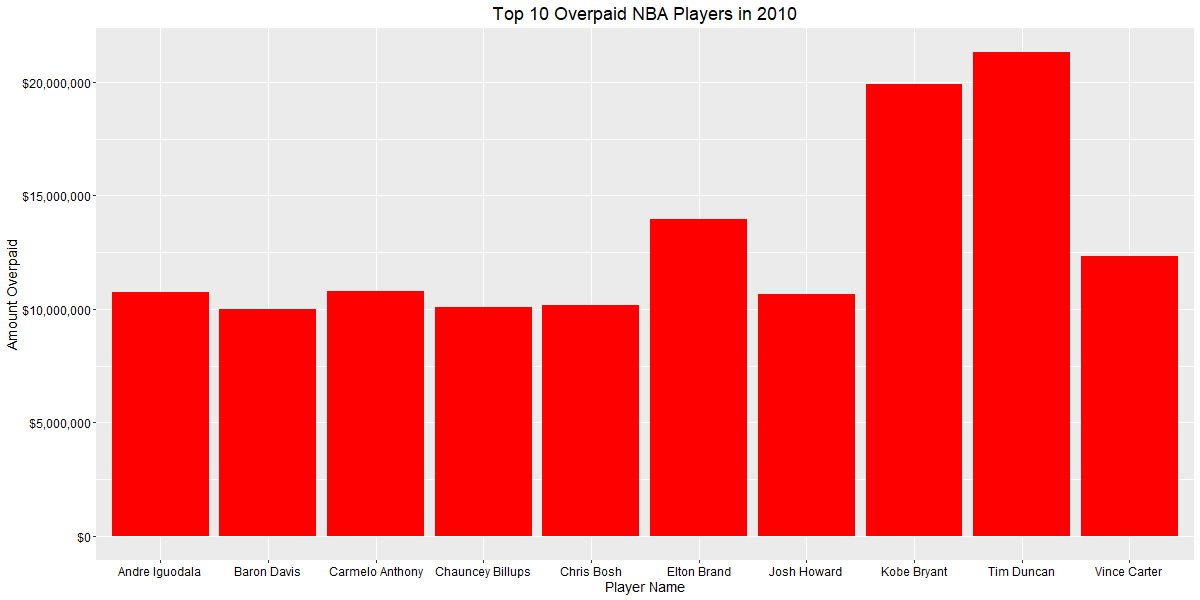

In [38]:
%%R -i top_10_overpaid_10 -w 1200 -h 600 -u px
options(scipen=999)
player_overpaid_bar_10 <- ggplot(top_10_overpaid_10, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "red") + 
labs(x = "Player Name", y = "Amount Overpaid") + ggtitle("Top 10 Overpaid NBA Players in 2010") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) + 
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour="black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))

ggsave(file="player_overpaid_bar_10.png")
player_overpaid_bar_10

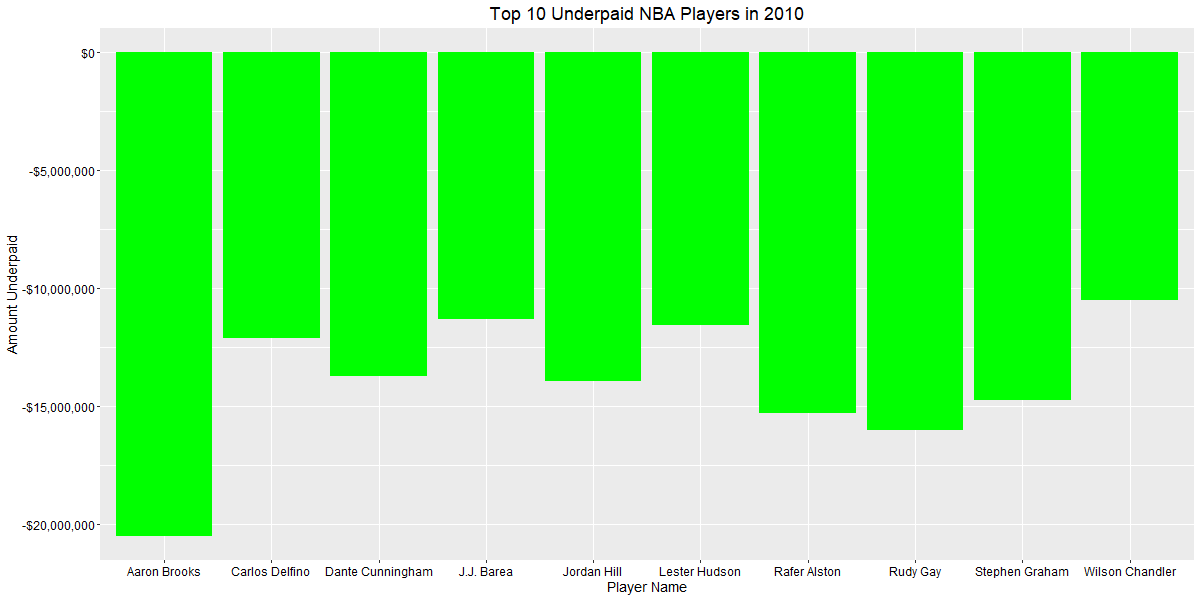

In [39]:
%%R -i top_10_underpaid_10 -w 1200 -h 600 -u px

player_underpaid_bar_10 <- ggplot(top_10_underpaid_10, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "green") + 
labs(x = "Player Name", y = "Amount Underpaid") + ggtitle("Top 10 Underpaid NBA Players in 2010") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) +
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour = "black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))
ggsave(file="player_underpaid_bar_10.png")
player_underpaid_bar_10

# Running 2011 Data in the Model

In [40]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(features_11, labels_11, verbose=False)
y_train_pred1 = xgb_model1.predict(features_11)
y_pred1 = xgb_model1.predict(features_11)

print('Train r2 score: ', r2_score(y_train_pred1, labels_11))
print('Test r2 score: ', r2_score(labels_11, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, labels_11)
test_mse1 = mean_squared_error(y_pred1, labels_11)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[13:23:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.9375518247968413
Test r2 score:  0.9490464658809084
Train RMSE: 1070874.0781
Test RMSE: 1070874.0781


In [41]:
y_train_xgb = pd.DataFrame(labels_11, columns=["Salary"])
y_predict_xgb = pd.DataFrame(y_train_pred1, columns=["Prediction"])

train_predictions_xgb = pd.DataFrame(np.concatenate([nba_subset_11, y_predict_xgb], axis=1), columns= ["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws", "Prediction"])
train_predictions_xgb.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws,Prediction
0,1959577.0,0.657895,0.498168,0.156566,0.195745,0.180851,0.231423,0.841463,0.831325,0.225719,0.411609,-0.068182,0.281250,0.421652,0.232323,2785246.50
1,11244000.0,0.657895,0.787546,0.474747,0.185106,0.436170,0.214437,0.987805,0.975904,0.637590,0.932718,-0.113636,0.488636,0.732194,0.590909,11683302.00
2,3000000.0,0.763158,0.670330,0.222222,0.278723,0.686170,0.231423,0.378049,0.867470,0.173561,0.331135,0.795455,0.281250,0.566952,0.230640,4954868.50
3,2563320.0,0.526316,0.351648,0.126263,0.389362,0.313830,0.135881,0.170732,0.975904,0.240108,0.211082,-0.022727,0.437500,0.492877,0.154882,2312129.25
4,4533300.0,0.842105,0.695971,0.292929,0.240426,0.122340,0.084926,0.000000,0.542169,0.196942,0.108179,0.409091,0.627841,0.384615,0.144781,4380841.50


In [42]:
y_predict_xgb.reset_index(drop=True, inplace=True)
final_11.reset_index(drop=True, inplace=True)
names_11_actual.reset_index(drop=True, inplace=True)

In [43]:
final_df = pd.concat([y_predict_xgb, final_11], axis=1)
final_df = final_df.drop(['Player_Name'], axis=1)
final_df = final_df.drop(final_df.columns[3], axis=1)

final_df = pd.concat([final_df, names_11_actual], axis=1)
# final_df = final_df.dropna()
final_df.head(5)

,Prediction,Position,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,True_Shooting_Pct,Three_Point_Attempt_Rate,Free_Throw_Rate,Offensive_Rebound_Pct,Defensive_Rebound_Pct,Total_Rebound_Pct,Assists_Pct,Steals_Pct,Blocks_Pct,Turnovers_Pct,Usage_Pct,Offensive_Win_Shares,Defensive_Win_Shares,Win_Shares,Win_Shares/48,Offensive_Box_Plus_Minus,Defensive_Box_Plus_Minus,Box_Plus_Minus,Value_Over_Replacement_Player,Year,Salary,Player_Name
0,2785246.50,10,25.0,69.0,69.0,2324.0,312.0,627.0,0.498,105.0,248.0,0.423,207.0,379.0,0.546,0.581,138.0,163.0,0.847,45.0,206.0,251.0,168.0,34.0,31.0,71.0,153.0,13.6,0.620,0.396,0.260,2.3,9.9,6.2,10.9,0.7,1.0,9.2,14.8,4.8,1.4,6.2,0.128,1.7,-0.3,1.4,2.0,2011.0,1959577.0,Arron Afflalo
1,11683302.00,2,25.0,81.0,81.0,3211.0,707.0,1415.0,0.500,4.0,23.0,0.174,703.0,1392.0,0.505,0.501,351.0,444.0,0.791,278.0,431.0,709.0,170.0,82.0,94.0,153.0,220.0,21.5,0.549,0.016,0.314,10.1,17.2,13.5,10.1,1.4,2.4,8.7,25.7,7.6,3.5,11.1,0.166,2.6,-0.5,2.1,3.4,2011.0,11244000.0,LaMarcus Aldridge
2,4954868.50,10,29.0,72.0,31.0,1494.0,251.0,492.0,0.510,4.0,23.0,0.174,247.0,469.0,0.527,0.514,137.0,182.0,0.753,70.0,123.0,193.0,104.0,129.0,44.0,86.0,161.0,18.3,0.562,0.047,0.370,5.5,9.9,7.7,10.9,4.5,2.4,13.1,19.9,2.0,2.7,4.7,0.152,0.1,3.5,3.6,2.1,2011.0,3000000.0,Tony Allen
3,2312129.25,7,20.0,81.0,14.0,1452.0,160.0,406.0,0.394,45.0,143.0,0.315,115.0,263.0,0.437,0.450,92.0,119.0,0.773,75.0,192.0,267.0,60.0,59.0,25.0,103.0,121.0,9.6,0.499,0.352,0.293,6.1,15.4,10.8,6.4,2.1,1.3,18.3,17.3,-0.8,1.4,0.7,0.022,-2.7,-0.1,-2.8,-0.3,2011.0,2563320.0,Al-Farouq Aminu
4,4380841.50,0,32.0,45.0,0.0,732.0,82.0,137.0,0.599,0.0,1.0,0.000,82.0,136.0,0.603,0.599,86.0,135.0,0.637,75.0,144.0,219.0,20.0,23.0,58.0,25.0,79.0,19.0,0.636,0.007,0.985,12.2,22.1,17.3,4.0,1.6,6.0,11.3,13.5,1.9,1.2,3.2,0.207,1.2,1.8,3.0,0.9,2011.0,4533300.0,Chris Andersen


In [44]:
final_df['Salary-Prediction'] = final_df['Salary'] - final_df['Prediction']

**Rearranging the columns**

In [45]:
cols = list(final_df.columns.values)

In [46]:
cols = ['Player_Name', 'Salary', 'Prediction', 'Salary-Prediction', 'Age',
 'Games_Played',
 'Games_Started',
 'Minutes_Played',
 'Field_Goals',
 'Field_Goals_Attempted',
 'Field_Goal_Pct',
 'Three_Pointers',
 'Three_Pointers_Attempted',
 'Three_Pointers_Pct',
 'Two_Pointers',
 'Two_Pointers_Attempted',
 'Two_Pointers_Pct',
 'Effective_Field_Goal_Pct',
 'Free_Throws',
 'Free_Throws_Attempted',
 'Free_Throws_Pct',
 'Offensive_Rebounds',
 'Defensive_Rebounds',
 'Total_Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Personal_Fouls',
 'Player_Efficiency_Rating',
 'Turnovers_Pct',
 'Assists_Pct',
 'Defensive_Box_Plus_Minus',
 'Defensive_Rebound_Pct',
 'Usage_Pct']

final_df = final_df[cols]
final_df['Prediction'] = final_df['Prediction'].astype('int64')

final_df.head(5)

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
0,Arron Afflalo,1959577.0,2785246,-825669.50,25.0,69.0,69.0,2324.0,312.0,627.0,0.498,105.0,248.0,0.423,207.0,379.0,0.546,0.581,138.0,163.0,0.847,45.0,206.0,251.0,168.0,34.0,31.0,71.0,153.0,13.6,9.2,10.9,-0.3,9.9,14.8
1,LaMarcus Aldridge,11244000.0,11683302,-439302.00,25.0,81.0,81.0,3211.0,707.0,1415.0,0.500,4.0,23.0,0.174,703.0,1392.0,0.505,0.501,351.0,444.0,0.791,278.0,431.0,709.0,170.0,82.0,94.0,153.0,220.0,21.5,8.7,10.1,-0.5,17.2,25.7
2,Tony Allen,3000000.0,4954868,-1954868.50,29.0,72.0,31.0,1494.0,251.0,492.0,0.510,4.0,23.0,0.174,247.0,469.0,0.527,0.514,137.0,182.0,0.753,70.0,123.0,193.0,104.0,129.0,44.0,86.0,161.0,18.3,13.1,10.9,3.5,9.9,19.9
3,Al-Farouq Aminu,2563320.0,2312129,251190.75,20.0,81.0,14.0,1452.0,160.0,406.0,0.394,45.0,143.0,0.315,115.0,263.0,0.437,0.450,92.0,119.0,0.773,75.0,192.0,267.0,60.0,59.0,25.0,103.0,121.0,9.6,18.3,6.4,-0.1,15.4,17.3
4,Chris Andersen,4533300.0,4380841,152458.50,32.0,45.0,0.0,732.0,82.0,137.0,0.599,0.0,1.0,0.000,82.0,136.0,0.603,0.599,86.0,135.0,0.637,75.0,144.0,219.0,20.0,23.0,58.0,25.0,79.0,19.0,11.3,4.0,1.8,22.1,13.5


In [47]:
final_df_overpaid_11 = final_df.sort_values("Salary-Prediction", ascending = False)
top_10_overpaid_11 = final_df_overpaid_11.head(10)
top_10_overpaid_11

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
199,Rashard Lewis,19573711.0,15005214,4568497.0,31.0,57.0,52.0,1824.0,252.0,582.0,0.433,87.0,244.0,0.357,165.0,338.0,0.488,0.508,77.0,96.0,0.802,71.0,219.0,290.0,92.0,52.0,30.0,87.0,159.0,12.0,12.2,8.1,0.3,14.0,17.6
190,Andrei Kirilenko,17823000.0,13955712,3867288.0,29.0,64.0,62.0,1999.0,253.0,542.0,0.467,36.0,98.0,0.367,217.0,444.0,0.489,0.500,208.0,270.0,0.770,100.0,227.0,327.0,192.0,81.0,74.0,117.0,113.0,16.6,15.0,14.9,0.5,13.8,17.8
269,Brandon Roy,13603750.0,9749412,3854338.0,26.0,47.0,23.0,1310.0,209.0,523.0,0.400,38.0,114.0,0.333,171.0,409.0,0.418,0.436,117.0,138.0,0.848,28.0,93.0,121.0,129.0,37.0,12.0,55.0,76.0,13.9,8.6,16.8,-0.4,9.1,22.8
211,Kenyon Martin,16545454.0,12784600,3760854.0,33.0,48.0,48.0,1233.0,185.0,362.0,0.511,2.0,9.0,0.222,183.0,353.0,0.518,0.514,42.0,72.0,0.583,67.0,230.0,297.0,109.0,43.0,35.0,59.0,136.0,14.1,13.0,13.6,1.7,20.9,16.4
261,Michael Redd,18300000.0,14722574,3577426.0,31.0,10.0,0.0,134.0,18.0,45.0,0.400,4.0,17.0,0.235,14.0,28.0,0.500,0.444,4.0,4.0,1.000,0.0,8.0,8.0,12.0,2.0,1.0,4.0,4.0,9.7,7.9,15.6,-1.4,7.1,17.7
52,Caron Butler,10561960.0,7054976,3506984.0,30.0,29.0,29.0,867.0,170.0,378.0,0.450,28.0,65.0,0.431,142.0,313.0,0.454,0.487,68.0,88.0,0.773,22.0,96.0,118.0,46.0,28.0,8.0,49.0,59.0,14.2,10.5,9.1,0.0,12.5,25.1
59,Vince Carter,17522375.0,14455542,3066833.0,34.0,73.0,63.0,2051.0,389.0,891.0,0.437,116.0,321.0,0.361,273.0,570.0,0.479,0.502,128.0,173.0,0.740,54.0,221.0,275.0,146.0,67.0,20.0,90.0,193.0,14.8,8.5,12.1,0.2,12.4,23.5
241,Mehmet Okur,9945000.0,6894919,3050080.5,31.0,13.0,0.0,168.0,22.0,62.0,0.355,5.0,16.0,0.313,17.0,46.0,0.370,0.395,15.0,20.0,0.750,9.0,21.0,30.0,19.0,4.0,4.0,7.0,18.0,12.6,9.0,17.7,-1.5,15.2,21.2
110,T.J. Ford,8500000.0,5680021,2819979.0,27.0,41.0,3.0,773.0,91.0,236.0,0.386,6.0,32.0,0.188,85.0,204.0,0.417,0.398,35.0,48.0,0.729,17.0,64.0,81.0,141.0,35.0,8.0,63.0,69.0,9.9,19.7,28.4,0.4,9.1,18.3
63,Josh Childress,6500000.0,4018967,2481032.5,27.0,54.0,3.0,894.0,121.0,214.0,0.565,1.0,16.0,0.063,120.0,198.0,0.606,0.568,29.0,59.0,0.492,69.0,86.0,155.0,42.0,33.0,23.0,44.0,68.0,13.0,15.5,7.0,0.1,11.1,14.3


In [48]:
final_df_underpaid_11 = final_df.sort_values("Salary-Prediction", ascending = True)
top_10_underpaid_11 = final_df_underpaid_11.head(10)
top_10_underpaid_11

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
320,David West,8287500.0,11467776,-3180276.00,30.0,70.0,70.0,2451.0,528.0,1040.0,0.508,2.0,9.0,0.222,526.0,1031.0,0.510,0.509,264.0,327.0,0.807,155.0,374.0,529.0,164.0,67.0,62.0,142.0,202.0,20.4,10.7,12.7,0.6,18.7,25.8
42,Earl Boykins,854389.0,3472965,-2618576.75,34.0,57.0,0.0,862.0,156.0,352.0,0.443,27.0,71.0,0.380,129.0,281.0,0.459,0.482,69.0,82.0,0.841,15.0,40.0,55.0,141.0,38.0,3.0,52.0,43.0,17.6,11.8,30.9,0.4,5.6,23.9
273,Luis Scola,7775378.0,10318822,-2543444.00,30.0,74.0,74.0,2412.0,569.0,1129.0,0.504,0.0,3.0,0.000,569.0,1126.0,0.505,0.504,214.0,290.0,0.738,147.0,459.0,606.0,185.0,48.0,44.0,147.0,227.0,18.4,10.5,13.7,-0.8,21.6,25.7
169,Stephen Jackson,8453250.0,10901166,-2447916.00,32.0,67.0,67.0,2405.0,435.0,1059.0,0.411,121.0,359.0,0.337,314.0,700.0,0.449,0.468,249.0,305.0,0.816,53.0,251.0,304.0,241.0,80.0,28.0,209.0,161.0,14.6,14.9,18.4,-0.7,12.7,27.4
264,Luke Ridnour,4000000.0,6038604,-2038604.50,29.0,71.0,66.0,2159.0,319.0,681.0,0.468,81.0,184.0,0.440,238.0,497.0,0.479,0.528,121.0,137.0,0.883,37.0,162.0,199.0,384.0,89.0,10.0,158.0,146.0,15.0,17.6,28.1,-0.7,8.6,17.8
338,Nick Young,2630503.0,4642066,-2011563.50,25.0,64.0,40.0,2034.0,412.0,935.0,0.441,105.0,271.0,0.387,307.0,664.0,0.462,0.497,186.0,228.0,0.816,26.0,148.0,174.0,75.0,45.0,17.0,90.0,144.0,14.5,8.0,6.6,-1.8,8.6,24.4
235,Joakim Noah,3128536.0,5101314,-1972778.50,25.0,48.0,48.0,1576.0,211.0,402.0,0.525,0.0,1.0,0.000,211.0,401.0,0.526,0.525,139.0,188.0,0.739,182.0,316.0,498.0,107.0,48.0,72.0,90.0,156.0,18.8,15.7,10.7,2.1,22.8,16.8
2,Tony Allen,3000000.0,4954868,-1954868.50,29.0,72.0,31.0,1494.0,251.0,492.0,0.510,4.0,23.0,0.174,247.0,469.0,0.527,0.514,137.0,182.0,0.753,70.0,123.0,193.0,104.0,129.0,44.0,86.0,161.0,18.3,13.1,10.9,3.5,9.9,19.9
53,Rasual Butler,211084.0,2146462,-1935378.00,31.0,47.0,2.0,770.0,79.0,237.0,0.333,46.0,136.0,0.338,33.0,101.0,0.327,0.430,18.0,27.0,0.667,10.0,67.0,77.0,27.0,8.0,15.0,24.0,37.0,6.2,8.8,5.3,-1.5,10.1,15.8
158,Eddie House,1352181.0,3261679,-1909498.00,32.0,56.0,1.0,978.0,128.0,321.0,0.399,68.0,175.0,0.389,60.0,146.0,0.411,0.505,38.0,40.0,0.950,9.0,83.0,92.0,62.0,32.0,3.0,29.0,68.0,11.9,7.9,10.0,0.2,9.5,17.6


**Making the Plots**

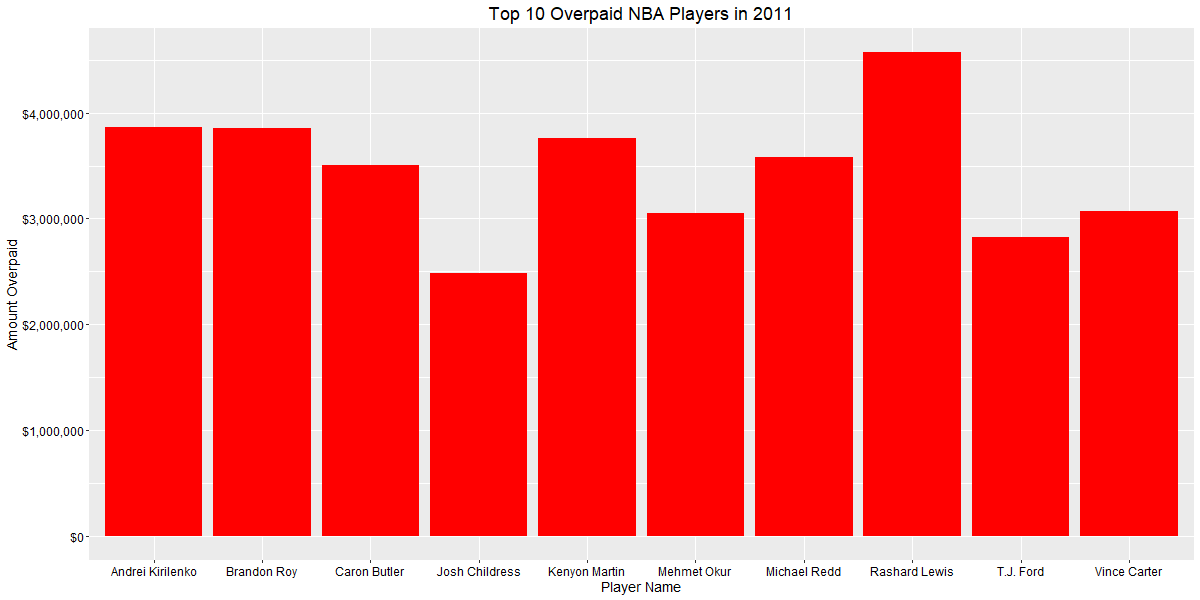

In [49]:
%%R -i top_10_overpaid_11 -w 1200 -h 600 -u px
options(scipen=999)
player_overpaid_bar_11 <- ggplot(top_10_overpaid_11, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "red") + 
labs(x = "Player Name", y = "Amount Overpaid") + ggtitle("Top 10 Overpaid NBA Players in 2011") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) + 
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour="black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))

ggsave(file="player_overpaid_bar_11.png")
player_overpaid_bar_11

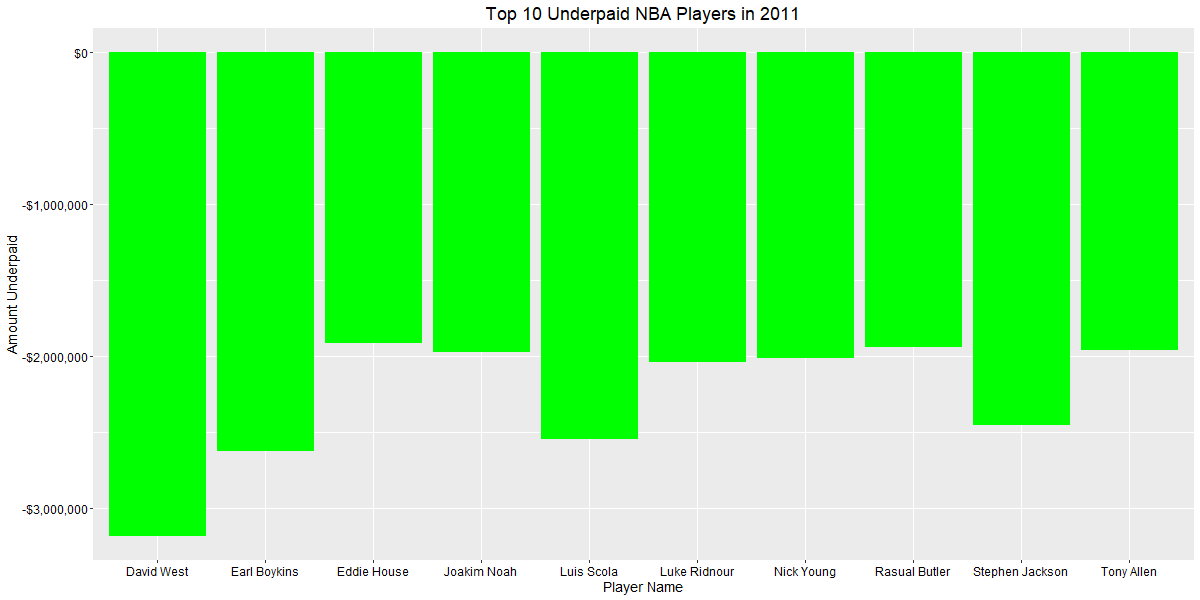

In [50]:
%%R -i top_10_underpaid_11 -w 1200 -h 600 -u px

player_underpaid_bar_11 <- ggplot(top_10_underpaid_11, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "green") + 
labs(x = "Player Name", y = "Amount Underpaid") + ggtitle("Top 10 Underpaid NBA Players in 2011") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) +
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour = "black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))
ggsave(file="player_underpaid_bar_11.png")
player_underpaid_bar_11

# Running 2012 Data in the Model

In [51]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(features_12, labels_12, verbose=False)
y_train_pred1 = xgb_model1.predict(features_12)
y_pred1 = xgb_model1.predict(features_12)

print('Train r2 score: ', r2_score(y_train_pred1, labels_12))
print('Test r2 score: ', r2_score(labels_12, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, labels_12)
test_mse1 = mean_squared_error(y_pred1, labels_12)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[13:24:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.9489241895501423
Test r2 score:  0.9567032901339774
Train RMSE: 989150.0014
Test RMSE: 989150.0014


In [52]:
y_train_xgb = pd.DataFrame(labels_12, columns=["Salary"])
y_predict_xgb = pd.DataFrame(y_train_pred1, columns=["Prediction"])

train_predictions_xgb = pd.DataFrame(np.concatenate([nba_subset_12, y_predict_xgb], axis=1), columns= ["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws", "Prediction"])
train_predictions_xgb.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws,Prediction
0,7750000.0,0.702703,0.478827,0.053942,0.276163,0.236842,0.211429,0.939394,0.939394,0.250955,0.511664,-0.285714,0.256798,0.535014,0.457077,6.831878e+06
1,14000000.0,0.702703,0.739414,0.186722,0.276163,0.335526,0.251429,0.833333,0.833333,0.563057,0.751166,-0.095238,0.528701,0.756303,0.517401,1.363243e+07
2,3150000.0,0.810811,0.511401,0.136929,0.441860,0.684211,0.158095,0.863636,0.878788,0.296815,0.326594,0.547619,0.320242,0.515406,0.324826,4.919110e+06
3,75793.0,0.702703,0.283388,0.000000,0.151163,0.046053,0.083810,0.000000,0.060606,0.010191,0.009331,1.000000,0.359517,0.361345,0.002320,5.423358e+05
4,2755560.0,0.567568,0.345277,0.141079,0.523256,0.388158,0.137143,0.318182,1.000000,0.392357,0.233281,0.142857,0.510574,0.453782,0.199536,2.444576e+06


In [53]:
y_predict_xgb.reset_index(drop=True, inplace=True)
final_12.reset_index(drop=True, inplace=True)
names_12_actual.reset_index(drop=True, inplace=True)

In [54]:
final_df = pd.concat([y_predict_xgb, final_12], axis=1)
final_df = final_df.drop(['Player_Name'], axis=1)
final_df = final_df.drop(final_df.columns[3], axis=1)

final_df = pd.concat([final_df, names_12_actual], axis=1)
# final_df = final_df.dropna()
final_df.head(5)

,Prediction,Position,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,True_Shooting_Pct,Three_Point_Attempt_Rate,Free_Throw_Rate,Offensive_Rebound_Pct,Defensive_Rebound_Pct,Total_Rebound_Pct,Assists_Pct,Steals_Pct,Blocks_Pct,Turnovers_Pct,Usage_Pct,Offensive_Win_Shares,Defensive_Win_Shares,Win_Shares,Win_Shares/48,Offensive_Box_Plus_Minus,Defensive_Box_Plus_Minus,Box_Plus_Minus,Value_Over_Replacement_Player,Year,Salary,Player_Name
0,6.831878e+06,10,26.0,62.0,62.0,2086.0,329.0,699.0,0.471,88.0,221.0,0.398,241.0,478.0,0.504,0.534,197.0,247.0,0.798,40.0,157.0,197.0,149.0,36.0,13.0,85.0,134.0,14.7,0.584,0.316,0.353,2.3,8.5,5.5,11.1,0.9,0.5,9.5,19.1,4.7,0.6,5.3,0.121,1.4,-1.2,0.1,1.1,2012.0,7750000.0,Arron Afflalo
1,1.363243e+07,2,26.0,55.0,55.0,1994.0,483.0,943.0,0.512,2.0,11.0,0.182,481.0,932.0,0.516,0.513,223.0,274.0,0.814,150.0,292.0,442.0,134.0,51.0,45.0,111.0,153.0,22.7,0.560,0.012,0.291,8.6,17.5,12.9,13.2,1.3,1.7,9.5,27.0,5.4,1.6,7.0,0.169,3.4,-0.4,3.0,2.5,2012.0,14000000.0,LaMarcus Aldridge
2,4.919110e+06,10,30.0,58.0,57.0,1525.0,210.0,448.0,0.469,8.0,26.0,0.308,202.0,422.0,0.479,0.478,140.0,175.0,0.800,98.0,135.0,233.0,79.0,104.0,33.0,94.0,142.0,15.7,0.541,0.058,0.391,7.4,10.6,8.9,8.3,3.6,1.8,15.2,18.4,1.7,2.5,4.2,0.131,-0.6,2.3,1.7,1.4,2012.0,3150000.0,Tony Allen
3,5.423358e+05,10,26.0,4.0,0.0,67.0,6.0,17.0,0.353,1.0,3.0,0.333,5.0,14.0,0.357,0.382,1.0,3.0,0.333,1.0,7.0,8.0,2.0,7.0,0.0,1.0,6.0,8.7,0.382,0.176,0.176,1.7,11.9,6.7,4.4,5.4,0.0,5.2,12.9,-0.1,0.1,0.0,0.032,-6.0,4.2,-1.8,0.0,2012.0,75793.0,Morris Almond
4,2.444576e+06,7,21.0,66.0,21.0,1477.0,150.0,365.0,0.411,13.0,47.0,0.277,137.0,318.0,0.431,0.429,86.0,114.0,0.754,95.0,213.0,308.0,66.0,59.0,34.0,91.0,136.0,10.6,0.481,0.129,0.312,7.8,16.9,12.4,7.2,2.2,1.9,18.0,16.2,-0.4,1.8,1.4,0.044,-2.9,0.6,-2.2,-0.1,2012.0,2755560.0,Al-Farouq Aminu


In [55]:
final_df['Salary-Prediction'] = final_df['Salary'] - final_df['Prediction']

**Rearranging the columns**

In [56]:
cols = list(final_df.columns.values)

In [57]:
cols = ['Player_Name', 'Salary', 'Prediction', 'Salary-Prediction', 'Age',
 'Games_Played',
 'Games_Started',
 'Minutes_Played',
 'Field_Goals',
 'Field_Goals_Attempted',
 'Field_Goal_Pct',
 'Three_Pointers',
 'Three_Pointers_Attempted',
 'Three_Pointers_Pct',
 'Two_Pointers',
 'Two_Pointers_Attempted',
 'Two_Pointers_Pct',
 'Effective_Field_Goal_Pct',
 'Free_Throws',
 'Free_Throws_Attempted',
 'Free_Throws_Pct',
 'Offensive_Rebounds',
 'Defensive_Rebounds',
 'Total_Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Personal_Fouls',
 'Player_Efficiency_Rating',
 'Turnovers_Pct',
 'Assists_Pct',
 'Defensive_Box_Plus_Minus',
 'Defensive_Rebound_Pct',
 'Usage_Pct']

final_df = final_df[cols]
final_df['Prediction'] = final_df['Prediction'].astype('int64')

final_df.head(5)

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
0,Arron Afflalo,7750000.0,6831878,9.181220e+05,26.0,62.0,62.0,2086.0,329.0,699.0,0.471,88.0,221.0,0.398,241.0,478.0,0.504,0.534,197.0,247.0,0.798,40.0,157.0,197.0,149.0,36.0,13.0,85.0,134.0,14.7,9.5,11.1,-1.2,8.5,19.1
1,LaMarcus Aldridge,14000000.0,13632426,3.675740e+05,26.0,55.0,55.0,1994.0,483.0,943.0,0.512,2.0,11.0,0.182,481.0,932.0,0.516,0.513,223.0,274.0,0.814,150.0,292.0,442.0,134.0,51.0,45.0,111.0,153.0,22.7,9.5,13.2,-0.4,17.5,27.0
2,Tony Allen,3150000.0,4919110,-1.769110e+06,30.0,58.0,57.0,1525.0,210.0,448.0,0.469,8.0,26.0,0.308,202.0,422.0,0.479,0.478,140.0,175.0,0.800,98.0,135.0,233.0,79.0,104.0,33.0,94.0,142.0,15.7,15.2,8.3,2.3,10.6,18.4
3,Morris Almond,75793.0,542335,-4.665428e+05,26.0,4.0,0.0,67.0,6.0,17.0,0.353,1.0,3.0,0.333,5.0,14.0,0.357,0.382,1.0,3.0,0.333,1.0,7.0,8.0,2.0,7.0,0.0,1.0,6.0,8.7,5.2,4.4,4.2,11.9,12.9
4,Al-Farouq Aminu,2755560.0,2444576,3.109835e+05,21.0,66.0,21.0,1477.0,150.0,365.0,0.411,13.0,47.0,0.277,137.0,318.0,0.431,0.429,86.0,114.0,0.754,95.0,213.0,308.0,66.0,59.0,34.0,91.0,136.0,10.6,18.0,7.2,0.6,16.9,16.2


In [58]:
final_df_overpaid_12 = final_df.sort_values("Salary-Prediction", ascending = False)
top_10_overpaid_12 = final_df_overpaid_12.head(10)
top_10_overpaid_12

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
212,Rashard Lewis,21136631.0,15162632,5973999.00,32.0,28.0,15.0,729.0,85.0,221.0,0.385,16.0,67.0,0.239,69.0,154.0,0.448,0.421,31.0,37.0,0.838,34.0,75.0,109.0,27.0,23.0,10.0,32.0,49.0,9.3,11.9,5.7,-1.3,11.7,16.5
181,Richard Jefferson,9282000.0,5920181,3361818.50,31.0,63.0,44.0,1748.0,203.0,488.0,0.416,113.0,269.0,0.420,90.0,219.0,0.411,0.532,59.0,85.0,0.694,26.0,193.0,219.0,88.0,37.0,19.0,50.0,121.0,11.1,8.7,7.3,-0.3,12.4,15.1
128,Ben Gordon,11600000.0,8833972,2766028.00,28.0,52.0,21.0,1398.0,234.0,530.0,0.442,63.0,147.0,0.429,171.0,383.0,0.446,0.501,117.0,136.0,0.860,14.0,107.0,121.0,127.0,34.0,11.0,115.0,114.0,13.5,16.3,16.5,-1.4,9.5,23.3
22,Michael Beasley,6262347.0,3846490,2415856.75,23.0,47.0,7.0,1087.0,221.0,497.0,0.445,38.0,101.0,0.376,183.0,396.0,0.462,0.483,61.0,95.0,0.642,39.0,168.0,207.0,45.0,18.0,19.0,80.0,83.0,13.0,12.9,7.7,-0.9,17.2,25.3
51,Caron Butler,8000000.0,5736456,2263544.00,31.0,63.0,63.0,1871.0,287.0,705.0,0.407,92.0,257.0,0.358,195.0,448.0,0.435,0.472,87.0,107.0,0.813,44.0,186.0,230.0,78.0,52.0,9.0,77.0,123.0,11.7,9.3,6.8,-1.2,12.0,20.4
160,Kirk Hinrich,8000000.0,5780448,2219552.00,31.0,48.0,31.0,1237.0,122.0,295.0,0.414,47.0,136.0,0.346,75.0,159.0,0.472,0.493,25.0,32.0,0.781,11.0,90.0,101.0,132.0,38.0,11.0,58.0,100.0,9.2,15.8,16.3,0.5,8.5,13.9
66,Wilson Chandler,5516664.0,3334044,2182619.75,24.0,8.0,6.0,215.0,31.0,79.0,0.392,3.0,12.0,0.250,28.0,67.0,0.418,0.411,10.0,12.0,0.833,6.0,35.0,41.0,17.0,6.0,6.0,18.0,18.0,9.0,17.6,12.0,-1.0,18.4,21.2
359,Thaddeus Young,8039130.0,5979937,2059193.00,23.0,63.0,1.0,1755.0,348.0,687.0,0.507,1.0,4.0,0.250,347.0,683.0,0.508,0.507,111.0,144.0,0.771,137.0,188.0,325.0,74.0,64.0,41.0,55.0,127.0,18.9,6.8,7.3,0.6,12.0,21.5
225,Kevin Martin,11519840.0,9481712,2038128.00,28.0,40.0,40.0,1264.0,222.0,537.0,0.413,78.0,225.0,0.347,144.0,312.0,0.462,0.486,160.0,179.0,0.894,13.0,93.0,106.0,110.0,28.0,3.0,70.0,70.0,16.5,10.2,14.5,-1.1,8.6,24.7
254,Lamar Odom,8900000.0,6942651,1957349.00,32.0,50.0,4.0,1027.0,123.0,349.0,0.352,28.0,111.0,0.252,95.0,238.0,0.399,0.393,58.0,98.0,0.592,36.0,172.0,208.0,83.0,20.0,18.0,52.0,97.0,9.2,11.7,12.9,0.1,18.7,20.1


In [59]:
final_df_underpaid_12 = final_df.sort_values("Salary-Prediction", ascending = True)
top_10_underpaid_12 = final_df_underpaid_12.head(10)
top_10_underpaid_12

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
89,Boris Diaw,241158.0,3161587,-2920429.25,29.0,57.0,35.0,1424.0,156.0,351.0,0.444,31.0,99.0,0.313,125.0,252.0,0.496,0.489,22.0,35.0,0.629,70.0,210.0,280.0,205.0,34.0,25.0,112.0,125.0,11.2,23.4,23.8,-0.2,17.3,15.5
127,Drew Gooden,6226200.0,9032490,-2806290.00,30.0,56.0,46.0,1469.0,287.0,657.0,0.437,16.0,55.0,0.291,271.0,602.0,0.450,0.449,176.0,208.0,0.846,130.0,233.0,363.0,144.0,46.0,34.0,109.0,112.0,18.8,12.7,16.5,-0.6,18.0,25.7
166,Josh Howard,2150000.0,4553835,-2403835.00,31.0,43.0,18.0,991.0,144.0,361.0,0.399,9.0,37.0,0.243,135.0,324.0,0.417,0.411,75.0,97.0,0.773,39.0,119.0,158.0,50.0,32.0,10.0,53.0,91.0,10.5,11.6,7.9,-0.9,13.9,20.7
249,Gary Neal,854389.0,3176236,-2321847.50,27.0,56.0,7.0,1206.0,212.0,486.0,0.436,83.0,198.0,0.419,129.0,288.0,0.448,0.522,50.0,64.0,0.781,12.0,106.0,118.0,117.0,27.0,2.0,60.0,75.0,14.2,10.5,15.1,-0.8,9.9,21.7
17,Matt Barnes,1906200.0,3990187,-2083987.00,31.0,63.0,16.0,1440.0,175.0,387.0,0.452,46.0,138.0,0.333,129.0,249.0,0.518,0.512,95.0,128.0,0.742,97.0,247.0,344.0,126.0,35.0,48.0,73.0,152.0,15.5,14.1,13.8,1.3,18.3,16.4
2,Tony Allen,3150000.0,4919110,-1769110.00,30.0,58.0,57.0,1525.0,210.0,448.0,0.469,8.0,26.0,0.308,202.0,422.0,0.479,0.478,140.0,175.0,0.800,98.0,135.0,233.0,79.0,104.0,33.0,94.0,142.0,15.7,15.2,8.3,2.3,10.6,18.4
278,Nate Robinson,785487.0,2503038,-1717551.25,27.0,51.0,9.0,1192.0,205.0,484.0,0.424,66.0,181.0,0.365,139.0,303.0,0.459,0.492,94.0,113.0,0.832,15.0,85.0,100.0,231.0,59.0,2.0,75.0,118.0,18.0,12.3,31.8,-1.1,8.1,23.6
130,Marcin Gortat,7258960.0,8972970,-1714010.00,27.0,66.0,66.0,2114.0,427.0,769.0,0.555,0.0,2.0,0.000,427.0,767.0,0.557,0.555,163.0,251.0,0.649,185.0,474.0,659.0,59.0,48.0,99.0,90.0,142.0,21.2,9.3,4.8,0.0,25.0,20.8
294,James Singleton,151585.0,1853364,-1701779.50,30.0,12.0,0.0,262.0,41.0,75.0,0.547,2.0,9.0,0.222,39.0,66.0,0.591,0.560,14.0,15.0,0.933,25.0,56.0,81.0,15.0,9.0,8.0,10.0,27.0,19.6,10.9,9.5,0.5,24.3,15.6
182,Jared Jeffries,854389.0,2504021,-1649632.00,30.0,39.0,4.0,729.0,59.0,144.0,0.410,3.0,16.0,0.188,56.0,128.0,0.438,0.420,49.0,72.0,0.681,69.0,83.0,152.0,26.0,29.0,25.0,29.0,89.0,10.9,14.2,5.4,1.4,13.3,12.6


**Making the Plots**

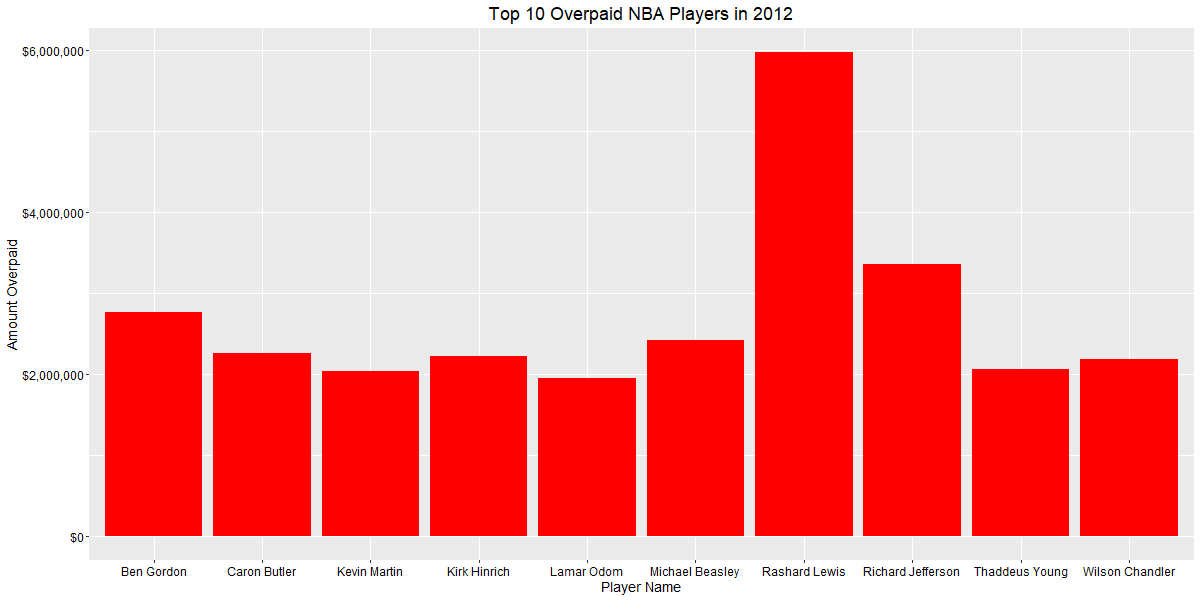

In [60]:
%%R -i top_10_overpaid_12 -w 1200 -h 600 -u px
options(scipen=999)
player_overpaid_bar_12 <- ggplot(top_10_overpaid_12, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "red") + 
labs(x = "Player Name", y = "Amount Overpaid") + ggtitle("Top 10 Overpaid NBA Players in 2012") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) + 
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour="black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))

ggsave(file="player_overpaid_bar_12.png")
player_overpaid_bar_12

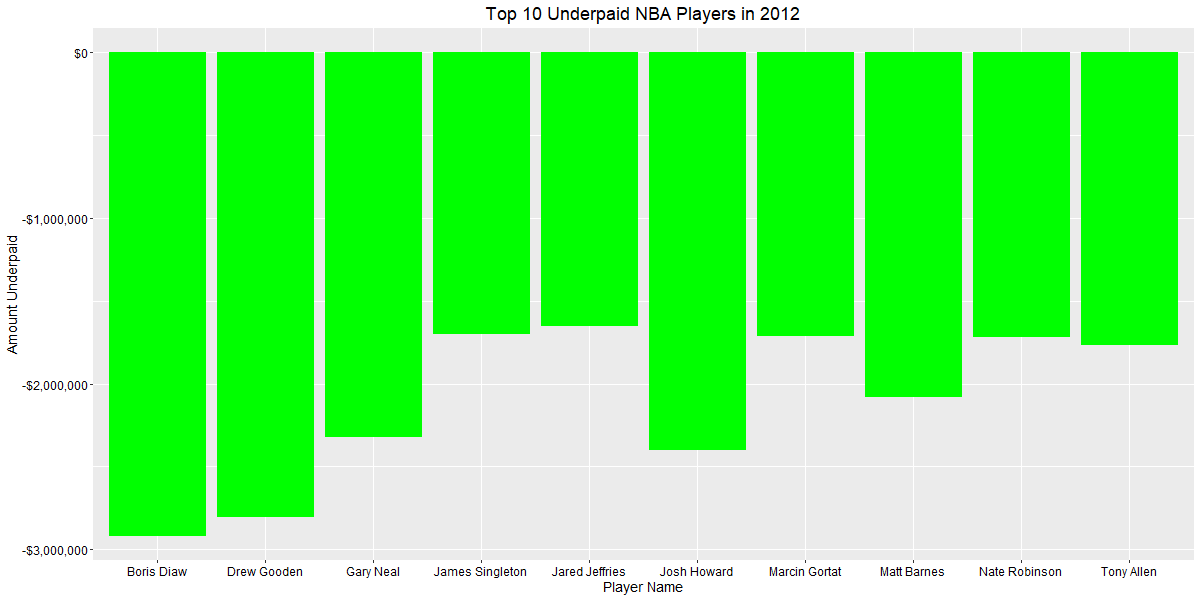

In [61]:
%%R -i top_10_underpaid_12 -w 1200 -h 600 -u px

player_underpaid_bar_12 <- ggplot(top_10_underpaid_12, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "green") + 
labs(x = "Player Name", y = "Amount Underpaid") + ggtitle("Top 10 Underpaid NBA Players in 2012") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) +
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour = "black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))
ggsave(file="player_underpaid_bar_12.png")
player_underpaid_bar_12

# Running 2013 Data in the Model

In [62]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(features_13, labels_13, verbose=False)
y_train_pred1 = xgb_model1.predict(features_13)
y_pred1 = xgb_model1.predict(features_13)

print('Train r2 score: ', r2_score(y_train_pred1, labels_13))
print('Test r2 score: ', r2_score(labels_13, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, labels_13)
test_mse1 = mean_squared_error(y_pred1, labels_13)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[13:26:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.9274330993549923
Test r2 score:  0.9419926164016555
Train RMSE: 1132491.3098
Test RMSE: 1132491.3098


In [63]:
y_train_xgb = pd.DataFrame(labels_13, columns=["Salary"])
y_predict_xgb = pd.DataFrame(y_train_pred1, columns=["Prediction"])

train_predictions_xgb = pd.DataFrame(np.concatenate([nba_subset_13, y_predict_xgb], axis=1), columns= ["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws", "Prediction"])
train_predictions_xgb.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws,Prediction
0,665000.0,0.550,0.503165,0.061983,0.289963,0.074713,0.105477,0.000000,0.353659,0.086907,0.054902,0.322581,0.462396,0.412921,0.045655,7.410186e+05
1,916099.0,0.650,0.424051,0.111570,0.243494,0.103448,0.168357,0.060976,0.634146,0.221219,0.094118,-0.290323,0.590529,0.438202,0.095729,2.792544e+06
2,7750000.0,0.675,0.411392,0.045455,0.224907,0.229885,0.296146,0.780488,0.780488,0.269752,0.518954,-0.580645,0.286908,0.632022,0.281296,7.626414e+06
3,13500000.0,0.675,0.645570,0.376033,0.165428,0.356322,0.263692,0.902439,0.902439,0.756208,0.833987,-0.129032,0.582173,0.744382,0.415317,1.325341e+07
4,3000000.0,0.575,0.363924,0.227273,0.191450,0.137931,0.135903,0.451220,0.963415,0.445824,0.269281,-0.096774,0.459610,0.415730,0.063328,2.217858e+06


In [64]:
y_predict_xgb.reset_index(drop=True, inplace=True)
final_13.reset_index(drop=True, inplace=True)
names_13_actual.reset_index(drop=True, inplace=True)

In [65]:
final_df = pd.concat([y_predict_xgb, final_13], axis=1)
final_df = final_df.drop(['Player_Name'], axis=1)
final_df = final_df.drop(final_df.columns[3], axis=1)

final_df = pd.concat([final_df, names_13_actual], axis=1)
# final_df = final_df.dropna()
final_df.head(5)

,Prediction,Position,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,True_Shooting_Pct,Three_Point_Attempt_Rate,Free_Throw_Rate,Offensive_Rebound_Pct,Defensive_Rebound_Pct,Total_Rebound_Pct,Assists_Pct,Steals_Pct,Blocks_Pct,Turnovers_Pct,Usage_Pct,Offensive_Win_Shares,Defensive_Win_Shares,Win_Shares,Win_Shares/48,Offensive_Box_Plus_Minus,Defensive_Box_Plus_Minus,Box_Plus_Minus,Value_Over_Replacement_Player,Year,Salary,Player_Name
0,7.410186e+05,2,22.0,29.0,0.0,342.0,42.0,75.0,0.560,1.0,2.0,0.500,41.0,73.0,0.562,0.567,31.0,38.0,0.816,30.0,47.0,77.0,11.0,13.0,15.0,17.0,53.0,15.9,0.632,0.027,0.507,10.3,16.6,13.4,5.2,2.0,3.5,15.6,14.7,0.7,0.4,1.1,0.157,-1.0,1.0,0.1,0.2,2013.0,665000.0,Quincy Acy
1,2.792544e+06,2,26.0,52.0,5.0,713.0,72.0,168.0,0.429,0.0,2.0,0.000,72.0,166.0,0.434,0.429,65.0,100.0,0.650,68.0,128.0,196.0,36.0,18.0,27.0,32.0,80.0,13.4,0.493,0.012,0.595,10.6,21.2,15.7,8.3,1.3,3.1,13.1,15.6,0.5,0.4,1.0,0.064,-2.1,-0.9,-3.0,-0.2,2013.0,916099.0,Jeff Adrien
2,7.626414e+06,7,27.0,64.0,64.0,2307.0,397.0,905.0,0.439,72.0,240.0,0.300,325.0,665.0,0.489,0.478,191.0,223.0,0.857,29.0,210.0,239.0,206.0,40.0,11.0,138.0,137.0,13.0,0.527,0.265,0.246,1.4,10.3,5.8,14.6,0.9,0.4,12.1,22.5,1.5,0.5,2.0,0.042,-1.1,-1.8,-2.9,-0.5,2013.0,7750000.0,Arron Afflalo
3,1.325341e+07,2,27.0,74.0,74.0,2790.0,638.0,1318.0,0.484,2.0,14.0,0.143,636.0,1304.0,0.488,0.485,282.0,348.0,0.810,175.0,495.0,670.0,192.0,62.0,91.0,143.0,187.0,20.4,0.530,0.011,0.264,7.2,20.9,14.0,13.0,1.2,2.5,8.9,26.5,4.8,2.3,7.2,0.124,1.7,-0.4,1.3,2.3,2013.0,13500000.0,LaMarcus Aldridge
4,2.217858e+06,0,23.0,79.0,37.0,1669.0,206.0,454.0,0.454,0.0,1.0,0.000,206.0,453.0,0.455,0.454,43.0,60.0,0.717,159.0,236.0,395.0,73.0,24.0,55.0,55.0,180.0,11.5,0.474,0.002,0.132,10.5,16.5,13.4,6.7,0.8,2.6,10.3,14.8,0.9,1.6,2.5,0.072,-3.0,-0.3,-3.3,-0.6,2013.0,3000000.0,Lavoy Allen


In [66]:
final_df['Salary-Prediction'] = final_df['Salary'] - final_df['Prediction']

**Rearranging the columns**

In [67]:
cols = list(final_df.columns.values)

In [68]:
cols = ['Player_Name', 'Salary', 'Prediction', 'Salary-Prediction', 'Age',
 'Games_Played',
 'Games_Started',
 'Minutes_Played',
 'Field_Goals',
 'Field_Goals_Attempted',
 'Field_Goal_Pct',
 'Three_Pointers',
 'Three_Pointers_Attempted',
 'Three_Pointers_Pct',
 'Two_Pointers',
 'Two_Pointers_Attempted',
 'Two_Pointers_Pct',
 'Effective_Field_Goal_Pct',
 'Free_Throws',
 'Free_Throws_Attempted',
 'Free_Throws_Pct',
 'Offensive_Rebounds',
 'Defensive_Rebounds',
 'Total_Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Personal_Fouls',
 'Player_Efficiency_Rating',
 'Turnovers_Pct',
 'Assists_Pct',
 'Defensive_Box_Plus_Minus',
 'Defensive_Rebound_Pct',
 'Usage_Pct']

final_df = final_df[cols]
final_df['Prediction'] = final_df['Prediction'].astype('int64')

final_df.head(5)

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
0,Quincy Acy,665000.0,741018,-7.601856e+04,22.0,29.0,0.0,342.0,42.0,75.0,0.560,1.0,2.0,0.500,41.0,73.0,0.562,0.567,31.0,38.0,0.816,30.0,47.0,77.0,11.0,13.0,15.0,17.0,53.0,15.9,15.6,5.2,1.0,16.6,14.7
1,Jeff Adrien,916099.0,2792544,-1.876445e+06,26.0,52.0,5.0,713.0,72.0,168.0,0.429,0.0,2.0,0.000,72.0,166.0,0.434,0.429,65.0,100.0,0.650,68.0,128.0,196.0,36.0,18.0,27.0,32.0,80.0,13.4,13.1,8.3,-0.9,21.2,15.6
2,Arron Afflalo,7750000.0,7626414,1.235860e+05,27.0,64.0,64.0,2307.0,397.0,905.0,0.439,72.0,240.0,0.300,325.0,665.0,0.489,0.478,191.0,223.0,0.857,29.0,210.0,239.0,206.0,40.0,11.0,138.0,137.0,13.0,12.1,14.6,-1.8,10.3,22.5
3,LaMarcus Aldridge,13500000.0,13253410,2.465900e+05,27.0,74.0,74.0,2790.0,638.0,1318.0,0.484,2.0,14.0,0.143,636.0,1304.0,0.488,0.485,282.0,348.0,0.810,175.0,495.0,670.0,192.0,62.0,91.0,143.0,187.0,20.4,8.9,13.0,-0.4,20.9,26.5
4,Lavoy Allen,3000000.0,2217858,7.821420e+05,23.0,79.0,37.0,1669.0,206.0,454.0,0.454,0.0,1.0,0.000,206.0,453.0,0.455,0.454,43.0,60.0,0.717,159.0,236.0,395.0,73.0,24.0,55.0,55.0,180.0,11.5,10.3,6.7,-0.3,16.5,14.8


In [69]:
final_df_overpaid_13 = final_df.sort_values("Salary-Prediction", ascending = False)
top_10_overpaid_13 = final_df_overpaid_13.head(10)
top_10_overpaid_13

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
169,Richard Jefferson,10164000.0,4580900,5583100.0,32.0,56.0,1.0,568.0,62.0,136.0,0.456,14.0,45.0,0.311,48.0,91.0,0.527,0.507,38.0,53.0,0.717,5.0,79.0,84.0,31.0,14.0,7.0,23.0,45.0,10.3,12.6,8.0,0.6,14.9,14.4
178,Joe Johnson,19752645.0,15045588,4707057.0,31.0,72.0,72.0,2642.0,445.0,1052.0,0.423,148.0,395.0,0.375,297.0,657.0,0.452,0.493,132.0,161.0,0.820,53.0,165.0,218.0,253.0,49.0,14.0,123.0,99.0,14.1,9.9,16.7,-1.4,7.4,21.7
157,Kris Humphries,12000000.0,8052070,3947929.5,27.0,65.0,21.0,1191.0,139.0,310.0,0.448,0.0,2.0,0.000,139.0,308.0,0.451,0.448,97.0,123.0,0.789,126.0,239.0,365.0,32.0,16.0,33.0,57.0,127.0,13.6,13.5,4.3,-1.0,23.9,16.3
316,Tyrus Thomas,8000000.0,4531414,3468586.0,26.0,26.0,2.0,360.0,48.0,136.0,0.353,3.0,8.0,0.375,45.0,128.0,0.352,0.364,26.0,31.0,0.839,16.0,44.0,60.0,19.0,14.0,15.0,17.0,51.0,9.6,10.2,9.1,-1.0,14.4,21.1
218,Corey Maggette,10924138.0,7477913,3446225.0,33.0,18.0,0.0,257.0,27.0,76.0,0.355,5.0,21.0,0.238,22.0,55.0,0.400,0.388,36.0,48.0,0.750,5.0,20.0,25.0,19.0,6.0,2.0,17.0,42.0,7.9,14.9,11.4,-0.9,9.1,20.2
164,Stephen Jackson,10059750.0,6902868,3156882.0,34.0,55.0,6.0,1075.0,123.0,330.0,0.373,46.0,170.0,0.271,77.0,160.0,0.481,0.442,49.0,70.0,0.700,22.0,133.0,155.0,80.0,37.0,14.0,77.0,89.0,8.0,17.6,10.7,0.1,13.5,18.7
122,Danny Granger,13058606.0,9941856,3116750.0,29.0,5.0,0.0,74.0,10.0,35.0,0.286,2.0,10.0,0.200,8.0,25.0,0.320,0.314,5.0,8.0,0.625,3.0,6.0,9.0,3.0,2.0,1.0,4.0,6.0,4.0,9.4,6.9,-2.4,8.9,26.2
223,Kevin Martin,12439675.0,9529776,2909899.0,29.0,77.0,0.0,2136.0,350.0,778.0,0.450,158.0,371.0,0.426,192.0,407.0,0.472,0.551,219.0,246.0,0.890,31.0,147.0,178.0,106.0,72.0,8.0,101.0,138.0,16.0,10.2,7.9,-0.7,7.4,21.0
334,Luke Walton,6091363.0,3288226,2803136.5,32.0,50.0,0.0,857.0,71.0,181.0,0.392,20.0,67.0,0.299,51.0,114.0,0.447,0.448,10.0,20.0,0.500,38.0,107.0,145.0,166.0,42.0,13.0,60.0,98.0,11.3,24.0,28.7,0.9,15.2,13.0
326,Beno Udrih,7372000.0,4943816,2428184.0,30.0,66.0,9.0,1457.0,210.0,476.0,0.441,34.0,102.0,0.333,176.0,374.0,0.471,0.477,84.0,103.0,0.816,34.0,107.0,141.0,302.0,41.0,3.0,108.0,90.0,14.2,17.2,32.3,-1.4,8.2,19.3


In [70]:
final_df_underpaid_13 = final_df.sort_values("Salary-Prediction", ascending = True)
top_10_underpaid_13 = final_df_underpaid_13.head(10)
top_10_underpaid_13

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
8,Alan Anderson,854389.0,4076822,-3222433.0,30.0,65.0,2.0,1495.0,236.0,616.0,0.383,95.0,285.0,0.333,141.0,331.0,0.426,0.460,126.0,147.0,0.857,34.0,114.0,148.0,103.0,48.0,7.0,80.0,131.0,12.6,10.5,11.7,-1.3,9.2,23.6
17,Leandro Barbosa,854389.0,3397026,-2542637.5,30.0,41.0,2.0,513.0,83.0,193.0,0.430,18.0,47.0,0.383,65.0,146.0,0.445,0.477,31.0,41.0,0.756,8.0,38.0,46.0,58.0,17.0,6.0,21.0,51.0,13.5,9.1,19.0,0.3,8.5,21.4
102,Raymond Felton,3480453.0,5900611,-2420158.0,28.0,68.0,68.0,2313.0,377.0,882.0,0.427,93.0,258.0,0.360,284.0,624.0,0.455,0.480,101.0,128.0,0.789,51.0,143.0,194.0,372.0,94.0,14.0,155.0,130.0,15.2,14.2,27.0,-0.8,7.5,22.1
256,Chandler Parsons,888250.0,3254866,-2366616.0,24.0,76.0,76.0,2758.0,456.0,939.0,0.486,152.0,395.0,0.385,304.0,544.0,0.559,0.567,113.0,155.0,0.729,79.0,325.0,404.0,269.0,75.0,32.0,147.0,148.0,15.3,12.7,15.6,0.0,13.2,18.3
176,Ivan Johnson,962195.0,3327435,-2365240.5,28.0,69.0,5.0,1035.0,185.0,356.0,0.520,1.0,13.0,0.077,184.0,343.0,0.536,0.521,81.0,131.0,0.618,76.0,190.0,266.0,46.0,56.0,14.0,71.0,131.0,15.7,14.7,7.4,0.7,20.7,21.7
69,Chris Copeland,473604.0,2749921,-2276317.0,28.0,56.0,13.0,862.0,182.0,380.0,0.479,59.0,140.0,0.421,123.0,240.0,0.513,0.557,63.0,83.0,0.759,34.0,85.0,119.0,27.0,16.0,12.0,50.0,104.0,16.8,10.7,5.7,-1.6,11.9,25.3
323,P.J. Tucker,884293.0,3158692,-2274399.5,27.0,79.0,45.0,1910.0,210.0,444.0,0.473,22.0,70.0,0.314,188.0,374.0,0.503,0.498,64.0,86.0,0.744,132.0,218.0,350.0,109.0,62.0,19.0,67.0,145.0,11.6,12.2,8.6,-0.1,13.3,12.8
340,David West,10000000.0,12048276,-2048276.0,32.0,73.0,73.0,2435.0,502.0,1009.0,0.498,4.0,19.0,0.211,498.0,990.0,0.503,0.500,242.0,315.0,0.768,145.0,418.0,563.0,213.0,74.0,69.0,157.0,149.0,20.1,12.0,16.8,1.5,18.8,24.4
352,Brandan Wright,992680.0,3028285,-2035605.0,25.0,64.0,16.0,1149.0,241.0,404.0,0.597,0.0,3.0,0.000,241.0,401.0,0.601,0.597,59.0,96.0,0.615,85.0,175.0,260.0,38.0,26.0,76.0,34.0,78.0,21.0,7.1,5.6,0.4,16.7,19.0
356,Sam Young,402065.0,2308570,-1906505.5,27.0,56.0,3.0,693.0,58.0,148.0,0.392,16.0,52.0,0.308,42.0,96.0,0.438,0.446,23.0,43.0,0.535,26.0,97.0,123.0,42.0,15.0,8.0,33.0,62.0,7.5,16.5,9.4,0.8,15.3,13.2


**Making the Plots**

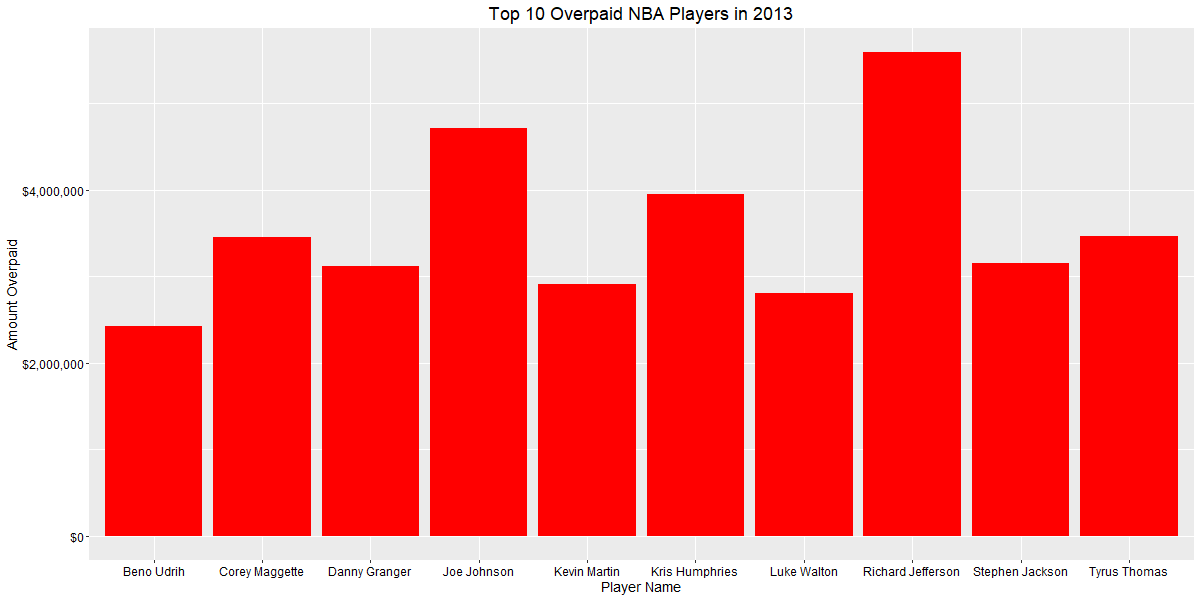

In [71]:
%%R -i top_10_overpaid_13 -w 1200 -h 600 -u px
options(scipen=999)
player_overpaid_bar_13 <- ggplot(top_10_overpaid_13, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "red") + 
labs(x = "Player Name", y = "Amount Overpaid") + ggtitle("Top 10 Overpaid NBA Players in 2013") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) + 
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour="black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))

ggsave(file="player_overpaid_bar_13.png")
player_overpaid_bar_13

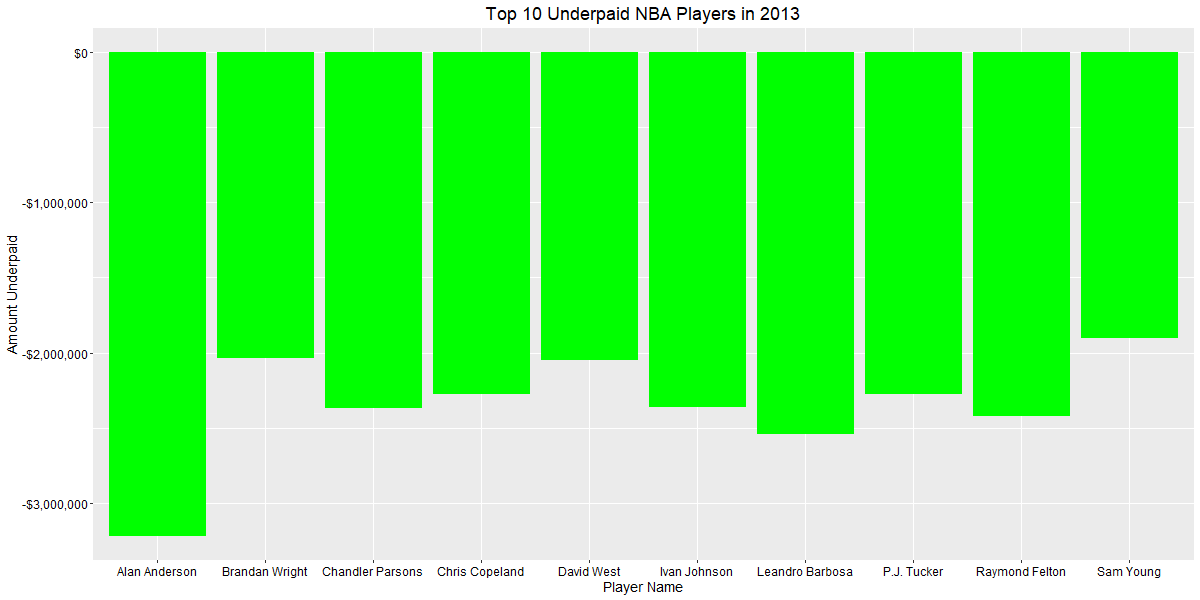

In [72]:
%%R -i top_10_underpaid_13 -w 1200 -h 600 -u px

player_underpaid_bar_13 <- ggplot(top_10_underpaid_13, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "green") + 
labs(x = "Player Name", y = "Amount Underpaid") + ggtitle("Top 10 Underpaid NBA Players in 2013") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) +
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour = "black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))
ggsave(file="player_underpaid_bar_13.png")
player_underpaid_bar_13

# Running 2014 Data in the Model

In [73]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(features_14, labels_14, verbose=False)
y_train_pred1 = xgb_model1.predict(features_14)
y_pred1 = xgb_model1.predict(features_14)

print('Train r2 score: ', r2_score(y_train_pred1, labels_14))
print('Test r2 score: ', r2_score(labels_14, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, labels_14)
test_mse1 = mean_squared_error(y_pred1, labels_14)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[13:27:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.9333043038662966
Test r2 score:  0.9463851960661243
Train RMSE: 1174768.8833
Test RMSE: 1174768.8833


In [74]:
y_train_xgb = pd.DataFrame(labels_14, columns=["Salary"])
y_predict_xgb = pd.DataFrame(y_train_pred1, columns=["Prediction"])

train_predictions_xgb = pd.DataFrame(np.concatenate([nba_subset_14, y_predict_xgb], axis=1), columns= ["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws", "Prediction"])
train_predictions_xgb.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws,Prediction
0,788872.0,0.605263,0.338926,0.118721,0.269702,0.120419,0.100204,0.000000,0.759036,0.201681,0.077739,0.222222,0.607477,0.293605,0.049787,1860835.00
1,7500000.0,0.736842,0.536913,0.013699,0.196147,0.183246,0.345603,0.890244,0.879518,0.244631,0.546525,-0.444444,0.317757,0.677326,0.389758,8343345.00
2,14878000.0,0.736842,0.731544,0.310502,0.126095,0.329843,0.265849,0.841463,0.831325,0.714286,0.767962,0.027778,0.794393,0.866279,0.421053,15580174.00
3,3060000.0,0.631579,0.419463,0.150685,0.210158,0.125654,0.206544,0.024390,0.783133,0.290383,0.157833,-0.222222,0.623053,0.424419,0.046942,2559069.75
4,4494383.0,0.842105,0.523490,0.086758,0.283713,0.471204,0.239264,0.341463,0.662651,0.194211,0.240283,0.583333,0.373832,0.584302,0.108108,4226438.50


In [75]:
y_predict_xgb.reset_index(drop=True, inplace=True)
final_14.reset_index(drop=True, inplace=True)
names_14_actual.reset_index(drop=True, inplace=True)

In [76]:
final_df = pd.concat([y_predict_xgb, final_14], axis=1)
final_df = final_df.drop(['Player_Name'], axis=1)
final_df = final_df.drop(final_df.columns[3], axis=1)

final_df = pd.concat([final_df, names_14_actual], axis=1)
# final_df = final_df.dropna()
final_df.head(5)

,Prediction,Position,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,True_Shooting_Pct,Three_Point_Attempt_Rate,Free_Throw_Rate,Offensive_Rebound_Pct,Defensive_Rebound_Pct,Total_Rebound_Pct,Assists_Pct,Steals_Pct,Blocks_Pct,Turnovers_Pct,Usage_Pct,Offensive_Win_Shares,Defensive_Win_Shares,Win_Shares,Win_Shares/48,Offensive_Box_Plus_Minus,Defensive_Box_Plus_Minus,Box_Plus_Minus,Value_Over_Replacement_Player,Year,Salary,Player_Name
0,1860835.00,7,23.0,63.0,0.0,847.0,66.0,141.0,0.468,4.0,15.0,0.267,62.0,126.0,0.492,0.482,35.0,53.0,0.660,72.0,144.0,216.0,28.0,23.0,26.0,30.0,122.0,10.1,0.520,0.106,0.376,9.5,19.5,14.4,4.9,1.4,2.5,15.4,10.1,0.6,0.9,1.5,0.086,-2.5,0.8,-1.7,0.1,2014.0,788872.0,Quincy Acy
1,8343345.00,10,28.0,73.0,73.0,2552.0,464.0,1011.0,0.459,128.0,300.0,0.427,336.0,711.0,0.473,0.522,274.0,336.0,0.815,32.0,230.0,262.0,248.0,35.0,3.0,146.0,136.0,16.0,0.574,0.297,0.332,1.4,10.2,5.8,16.9,0.7,0.1,11.2,23.3,4.3,1.0,5.3,0.099,1.4,-1.6,-0.2,1.1,2014.0,7500000.0,Arron Afflalo
2,15580174.00,2,28.0,69.0,69.0,2498.0,652.0,1423.0,0.458,3.0,15.0,0.200,649.0,1408.0,0.461,0.459,296.0,360.0,0.822,166.0,599.0,765.0,178.0,63.0,68.0,123.0,147.0,21.8,0.507,0.011,0.253,7.2,25.5,16.5,13.0,1.3,1.9,7.2,29.8,4.0,3.5,7.5,0.144,2.3,0.1,2.3,2.7,2014.0,14878000.0,LaMarcus Aldridge
3,2559069.75,2,24.0,65.0,2.0,1072.0,134.0,300.0,0.447,2.0,13.0,0.154,132.0,287.0,0.460,0.450,33.0,50.0,0.660,119.0,192.0,311.0,71.0,24.0,33.0,44.0,126.0,12.5,0.470,0.043,0.167,11.7,20.0,15.7,10.1,1.1,2.4,12.0,14.6,0.6,0.9,1.5,0.066,-2.6,-0.8,-3.5,-0.4,2014.0,3060000.0,Lavoy Allen
4,4226438.50,10,32.0,55.0,28.0,1278.0,204.0,413.0,0.494,11.0,47.0,0.234,193.0,366.0,0.527,0.507,76.0,121.0,0.628,79.0,129.0,208.0,94.0,90.0,19.0,90.0,121.0,15.6,0.531,0.114,0.293,7.3,12.0,9.6,11.7,3.8,1.2,16.2,20.1,0.5,2.1,2.7,0.100,-1.1,2.1,1.0,1.0,2014.0,4494383.0,Tony Allen


In [77]:
final_df['Salary-Prediction'] = final_df['Salary'] - final_df['Prediction']

**Rearranging the columns**

In [78]:
cols = list(final_df.columns.values)

In [79]:
cols = ['Player_Name', 'Salary', 'Prediction', 'Salary-Prediction', 'Age',
 'Games_Played',
 'Games_Started',
 'Minutes_Played',
 'Field_Goals',
 'Field_Goals_Attempted',
 'Field_Goal_Pct',
 'Three_Pointers',
 'Three_Pointers_Attempted',
 'Three_Pointers_Pct',
 'Two_Pointers',
 'Two_Pointers_Attempted',
 'Two_Pointers_Pct',
 'Effective_Field_Goal_Pct',
 'Free_Throws',
 'Free_Throws_Attempted',
 'Free_Throws_Pct',
 'Offensive_Rebounds',
 'Defensive_Rebounds',
 'Total_Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Personal_Fouls',
 'Player_Efficiency_Rating',
 'Turnovers_Pct',
 'Assists_Pct',
 'Defensive_Box_Plus_Minus',
 'Defensive_Rebound_Pct',
 'Usage_Pct']

final_df = final_df[cols]
final_df['Prediction'] = final_df['Prediction'].astype('int64')

final_df.head(5)

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
0,Quincy Acy,788872.0,1860835,-1071963.00,23.0,63.0,0.0,847.0,66.0,141.0,0.468,4.0,15.0,0.267,62.0,126.0,0.492,0.482,35.0,53.0,0.660,72.0,144.0,216.0,28.0,23.0,26.0,30.0,122.0,10.1,15.4,4.9,0.8,19.5,10.1
1,Arron Afflalo,7500000.0,8343345,-843345.00,28.0,73.0,73.0,2552.0,464.0,1011.0,0.459,128.0,300.0,0.427,336.0,711.0,0.473,0.522,274.0,336.0,0.815,32.0,230.0,262.0,248.0,35.0,3.0,146.0,136.0,16.0,11.2,16.9,-1.6,10.2,23.3
2,LaMarcus Aldridge,14878000.0,15580174,-702174.00,28.0,69.0,69.0,2498.0,652.0,1423.0,0.458,3.0,15.0,0.200,649.0,1408.0,0.461,0.459,296.0,360.0,0.822,166.0,599.0,765.0,178.0,63.0,68.0,123.0,147.0,21.8,7.2,13.0,0.1,25.5,29.8
3,Lavoy Allen,3060000.0,2559069,500930.25,24.0,65.0,2.0,1072.0,134.0,300.0,0.447,2.0,13.0,0.154,132.0,287.0,0.460,0.450,33.0,50.0,0.660,119.0,192.0,311.0,71.0,24.0,33.0,44.0,126.0,12.5,12.0,10.1,-0.8,20.0,14.6
4,Tony Allen,4494383.0,4226438,267944.50,32.0,55.0,28.0,1278.0,204.0,413.0,0.494,11.0,47.0,0.234,193.0,366.0,0.527,0.507,76.0,121.0,0.628,79.0,129.0,208.0,94.0,90.0,19.0,90.0,121.0,15.6,16.2,11.7,2.1,12.0,20.1


In [80]:
final_df_overpaid_14 = final_df.sort_values("Salary-Prediction", ascending = False)
top_10_overpaid_14 = final_df_overpaid_14.head(10)
top_10_overpaid_14

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
161,Kris Humphries,12000000.0,7698955,4301045.00,28.0,69.0,30.0,1376.0,231.0,461.0,0.501,0.0,2.0,0.000,231.0,459.0,0.503,0.501,117.0,144.0,0.813,127.0,282.0,409.0,67.0,31.0,61.0,64.0,136.0,18.2,10.9,8.2,0.4,24.0,19.0
180,Joe Johnson,21466718.0,17681146,3785572.00,32.0,79.0,79.0,2575.0,462.0,1018.0,0.454,162.0,404.0,0.401,300.0,614.0,0.489,0.533,159.0,195.0,0.815,48.0,222.0,270.0,216.0,47.0,10.0,120.0,129.0,15.5,9.8,15.0,-1.8,10.3,22.3
126,Eric Gordon,14283844.0,10636072,3647772.00,25.0,64.0,64.0,2057.0,356.0,817.0,0.436,101.0,258.0,0.391,255.0,559.0,0.456,0.498,175.0,223.0,0.785,30.0,135.0,165.0,208.0,74.0,12.0,134.0,114.0,14.9,12.8,16.6,-1.4,7.7,23.2
109,Landry Fields,6250000.0,2717337,3532662.25,25.0,30.0,2.0,322.0,27.0,67.0,0.403,0.0,5.0,0.000,27.0,62.0,0.435,0.403,14.0,22.0,0.636,15.0,44.0,59.0,20.0,10.0,3.0,11.0,25.0,8.6,12.5,9.3,1.0,16.0,12.4
313,Marcus Thornton,8050000.0,4878960,3171039.50,26.0,72.0,27.0,1741.0,252.0,639.0,0.394,109.0,316.0,0.345,143.0,323.0,0.443,0.480,90.0,112.0,0.804,57.0,141.0,198.0,77.0,58.0,11.0,67.0,110.0,12.0,8.9,7.3,-1.1,9.4,19.7
329,Deron Williams,18466130.0,15361248,3104882.00,29.0,64.0,58.0,2059.0,322.0,716.0,0.450,98.0,268.0,0.366,224.0,448.0,0.500,0.518,173.0,216.0,0.801,15.0,153.0,168.0,392.0,93.0,13.0,143.0,148.0,17.6,15.0,32.8,-0.7,8.9,21.8
205,Jeremy Lin,8374646.0,5385457,2989189.00,25.0,71.0,33.0,2054.0,295.0,662.0,0.446,82.0,229.0,0.358,213.0,433.0,0.492,0.508,218.0,265.0,0.823,34.0,153.0,187.0,294.0,68.0,27.0,176.0,166.0,14.3,18.4,22.3,-0.4,7.8,20.4
47,Chase Budinger,5000000.0,2087954,2912045.75,25.0,41.0,8.0,751.0,100.0,254.0,0.394,42.0,120.0,0.350,58.0,134.0,0.433,0.476,32.0,39.0,0.821,19.0,84.0,103.0,31.0,19.0,2.0,24.0,58.0,9.7,8.1,6.2,-0.8,12.5,16.7
163,Andre Iguodala,12868632.0,9986612,2882020.00,30.0,63.0,63.0,2040.0,220.0,458.0,0.480,62.0,175.0,0.354,158.0,283.0,0.558,0.548,86.0,132.0,0.652,53.0,240.0,293.0,263.0,95.0,18.0,100.0,103.0,13.7,16.2,18.2,2.4,12.6,13.3
156,Jrue Holiday,9713484.0,6856769,2856715.00,23.0,34.0,34.0,1143.0,203.0,454.0,0.447,30.0,77.0,0.390,173.0,377.0,0.459,0.480,51.0,63.0,0.810,28.0,114.0,142.0,268.0,56.0,12.0,105.0,92.0,17.1,17.9,38.9,-0.9,11.8,23.3


In [81]:
final_df_underpaid_14 = final_df.sort_values("Salary-Prediction", ascending = True)
top_10_underpaid_14 = final_df_underpaid_14.head(10)
top_10_underpaid_14

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
206,Shaun Livingston,884293.0,3988528,-3104235.50,28.0,76.0,54.0,1974.0,235.0,487.0,0.483,1.0,6.0,0.167,234.0,481.0,0.486,0.484,158.0,191.0,0.827,67.0,179.0,246.0,245.0,93.0,31.0,105.0,172.0,14.5,15.5,20.1,1.1,10.8,16.1
33,Andray Blatche,1375604.0,4272563,-2896959.00,27.0,73.0,7.0,1618.0,321.0,674.0,0.476,15.0,54.0,0.278,306.0,620.0,0.494,0.487,164.0,221.0,0.742,120.0,270.0,390.0,112.0,75.0,38.0,110.0,166.0,18.8,12.5,12.8,-0.1,19.9,25.6
257,Chandler Parsons,926500.0,3738410,-2811910.00,25.0,74.0,74.0,2783.0,466.0,987.0,0.472,130.0,351.0,0.370,336.0,636.0,0.528,0.538,164.0,221.0,0.742,69.0,340.0,409.0,298.0,88.0,29.0,144.0,168.0,15.9,11.7,17.3,0.2,12.8,19.3
315,P.J. Tucker,884293.0,3663806,-2779513.00,28.0,81.0,81.0,2490.0,265.0,615.0,0.431,74.0,191.0,0.387,191.0,424.0,0.450,0.491,156.0,201.0,0.776,161.0,368.0,529.0,141.0,110.0,23.0,102.0,204.0,13.3,12.7,8.1,0.9,16.6,14.2
186,Chris Kaman,3183000.0,5491764,-2308764.50,31.0,39.0,13.0,736.0,176.0,346.0,0.509,0.0,3.0,0.000,176.0,343.0,0.513,0.509,52.0,68.0,0.765,54.0,175.0,229.0,58.0,11.0,40.0,74.0,93.0,17.0,16.4,14.1,0.3,25.4,26.7
132,Gerald Green,3500000.0,5735202,-2235202.00,28.0,82.0,48.0,2330.0,448.0,1006.0,0.445,204.0,510.0,0.400,244.0,496.0,0.492,0.547,195.0,230.0,0.848,48.0,227.0,275.0,122.0,70.0,42.0,145.0,220.0,16.5,11.6,8.6,-0.6,10.9,23.6
340,Nick Young,1106942.0,3333801,-2226859.50,28.0,64.0,9.0,1810.0,387.0,889.0,0.435,135.0,350.0,0.386,252.0,539.0,0.468,0.511,235.0,285.0,0.825,29.0,137.0,166.0,95.0,46.0,12.0,95.0,156.0,16.0,8.6,9.0,-1.9,8.1,26.8
284,Mike Scott,788872.0,2926426,-2137554.00,25.0,80.0,6.0,1482.0,301.0,628.0,0.479,62.0,200.0,0.310,239.0,428.0,0.558,0.529,103.0,132.0,0.780,62.0,222.0,284.0,75.0,30.0,7.0,79.0,121.0,15.3,10.3,8.9,-1.6,17.2,23.5
51,Caron Butler,244489.0,2346278,-2101789.25,33.0,56.0,13.0,1419.0,213.0,540.0,0.394,98.0,249.0,0.394,115.0,291.0,0.395,0.485,63.0,75.0,0.840,21.0,208.0,229.0,82.0,47.0,17.0,60.0,120.0,12.2,9.5,9.6,-0.8,16.8,20.1
336,Nate Wolters,500000.0,2548361,-2048361.00,22.0,58.0,31.0,1309.0,170.0,389.0,0.437,18.0,62.0,0.290,152.0,327.0,0.465,0.460,59.0,90.0,0.656,33.0,116.0,149.0,187.0,35.0,15.0,57.0,67.0,12.7,11.7,23.3,-1.0,10.5,16.8


**Making the Plots**

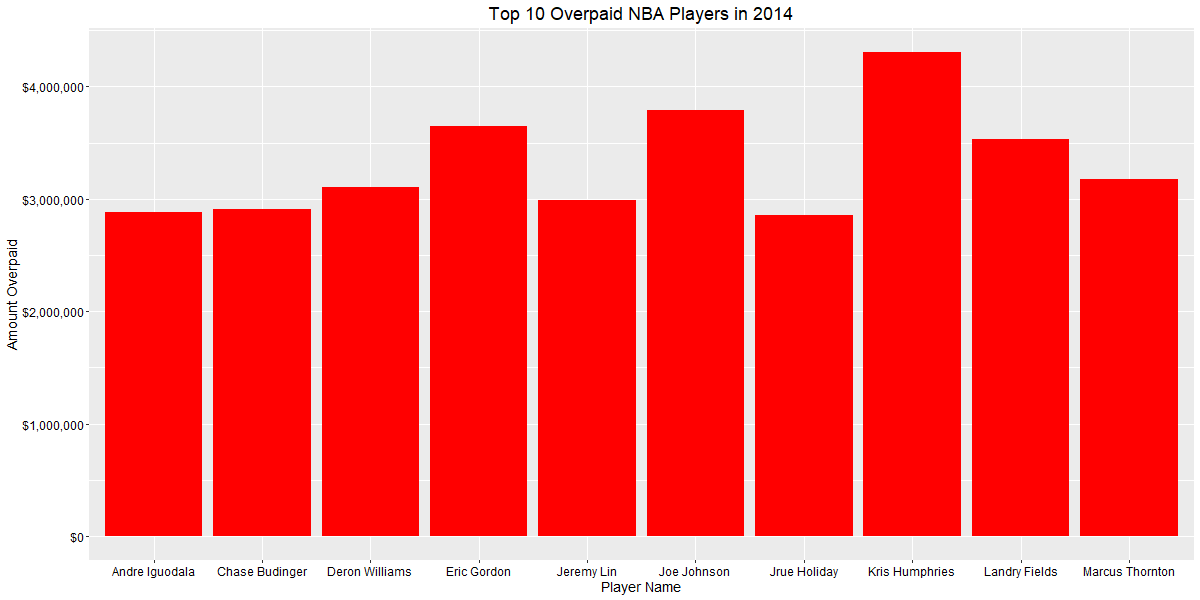

In [82]:
%%R -i top_10_overpaid_14 -w 1200 -h 600 -u px
options(scipen=999)
player_overpaid_bar_14 <- ggplot(top_10_overpaid_14, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "red") + 
labs(x = "Player Name", y = "Amount Overpaid") + ggtitle("Top 10 Overpaid NBA Players in 2014") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) + 
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour="black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))

ggsave(file="player_overpaid_bar_14.png")
player_overpaid_bar_14

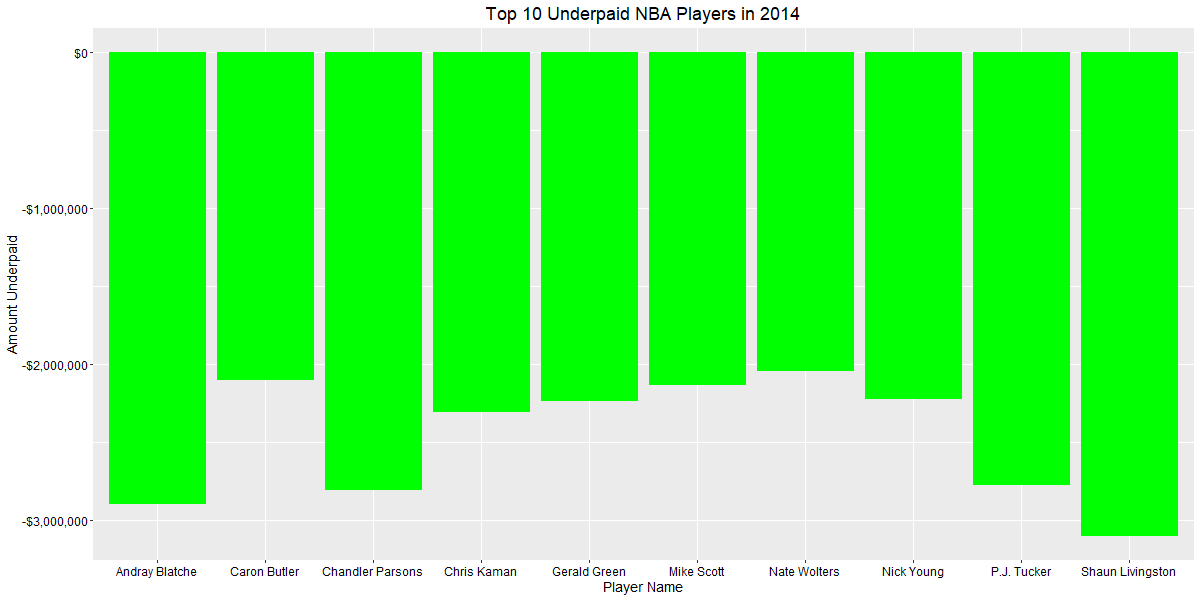

In [83]:
%%R -i top_10_underpaid_14 -w 1200 -h 600 -u px

player_underpaid_bar_14 <- ggplot(top_10_underpaid_14, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "green") + 
labs(x = "Player Name", y = "Amount Underpaid") + ggtitle("Top 10 Underpaid NBA Players in 2014") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) +
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour = "black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))
ggsave(file="player_underpaid_bar_14.png")
player_underpaid_bar_14

# Running 2015 Data in the Model

In [84]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(features_15, labels_15, verbose=False)
y_train_pred1 = xgb_model1.predict(features_15)
y_pred1 = xgb_model1.predict(features_15)

print('Train r2 score: ', r2_score(y_train_pred1, labels_15))
print('Test r2 score: ', r2_score(labels_15, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, labels_15)
test_mse1 = mean_squared_error(y_pred1, labels_15)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[13:29:25] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.923539160055924
Test r2 score:  0.9395819510050532
Train RMSE: 1204873.8339
Test RMSE: 1204873.8339


In [85]:
y_train_xgb = pd.DataFrame(labels_15, columns=["Salary"])
y_predict_xgb = pd.DataFrame(y_train_pred1, columns=["Prediction"])

train_predictions_xgb = pd.DataFrame(np.concatenate([nba_subset_15, y_predict_xgb], axis=1), columns= ["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws", "Prediction"])
train_predictions_xgb.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws,Prediction
0,915243.0,0.631579,0.386364,0.110,0.436709,0.165644,0.183544,0.268293,0.819277,0.245514,0.230653,-0.31250,0.632716,0.403646,0.106294,1610782.875
1,1344120.0,0.526316,0.415584,0.035,0.401899,0.098160,0.213080,0.000000,0.361446,0.022838,0.053111,0.81250,0.268519,0.531250,0.019580,1145078.000
2,2184960.0,0.552632,0.457792,0.430,0.531646,0.233129,0.116034,0.817073,0.843373,0.426591,0.329287,0.06250,0.595679,0.372396,0.144056,2481302.500
3,7500000.0,0.763158,0.347403,0.035,0.338608,0.251534,0.172996,0.878049,0.939759,0.201468,0.569044,-0.34375,0.299383,0.494792,0.233566,6948061.500
4,2963232.0,0.605263,0.389610,0.080,0.503165,0.104294,0.175105,0.109756,0.493976,0.143556,0.060698,0.12500,0.638889,0.223958,0.018182,2143111.000


In [86]:
y_predict_xgb.reset_index(drop=True, inplace=True)
final_15.reset_index(drop=True, inplace=True)
names_15_actual.reset_index(drop=True, inplace=True)

In [87]:
final_df = pd.concat([y_predict_xgb, final_15], axis=1)
final_df = final_df.drop(['Player_Name'], axis=1)
final_df = final_df.drop(final_df.columns[3], axis=1)

final_df = pd.concat([final_df, names_15_actual], axis=1)
# final_df = final_df.dropna()
final_df.head(5)

,Prediction,Position,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,True_Shooting_Pct,Three_Point_Attempt_Rate,Free_Throw_Rate,Offensive_Rebound_Pct,Defensive_Rebound_Pct,Total_Rebound_Pct,Assists_Pct,Steals_Pct,Blocks_Pct,Turnovers_Pct,Usage_Pct,Offensive_Win_Shares,Defensive_Win_Shares,Win_Shares,Win_Shares/48,Offensive_Box_Plus_Minus,Defensive_Box_Plus_Minus,Box_Plus_Minus,Value_Over_Replacement_Player,Year,Salary,Player_Name
0,1610782.875,2,24.0,68.0,22.0,1287.0,152.0,331.0,0.459,18.0,60.0,0.300,134.0,271.0,0.494,0.486,76.0,97.0,0.784,79.0,222.0,301.0,68.0,27.0,22.0,60.0,147.0,11.9,0.533,0.181,0.293,6.9,20.5,13.5,8.7,1.1,1.4,13.8,15.5,1.0,0.7,1.7,0.063,-2.1,-1.0,-3.1,-0.3,2015.0,915243.0,Quincy Acy
1,1145078.000,10,20.0,30.0,0.0,248.0,35.0,86.0,0.407,10.0,25.0,0.400,25.0,61.0,0.410,0.465,14.0,23.0,0.609,9.0,19.0,28.0,16.0,16.0,7.0,14.0,24.0,12.8,0.489,0.291,0.267,4.2,8.7,6.4,10.1,3.4,2.3,12.7,20.4,0.0,0.4,0.4,0.073,-1.2,2.6,1.4,0.2,2015.0,1344120.0,Jordan Adams
2,2481302.500,0,21.0,70.0,67.0,1771.0,217.0,399.0,0.544,0.0,2.0,0.000,217.0,397.0,0.547,0.544,103.0,205.0,0.502,199.0,324.0,523.0,66.0,38.0,86.0,99.0,222.0,14.1,0.549,0.005,0.514,12.2,19.3,15.8,5.5,1.1,3.8,16.8,14.3,1.9,2.2,4.1,0.111,-1.5,0.2,-1.3,0.3,2015.0,2184960.0,Steven Adams
3,6948061.500,10,29.0,78.0,72.0,2502.0,375.0,884.0,0.424,118.0,333.0,0.354,257.0,551.0,0.466,0.491,167.0,198.0,0.843,27.0,220.0,247.0,129.0,41.0,7.0,116.0,167.0,10.7,0.533,0.377,0.224,1.1,9.7,5.3,8.2,0.8,0.2,10.7,19.0,1.6,1.0,2.6,0.050,-1.4,-1.1,-2.5,-0.3,2015.0,7500000.0,Arron Afflalo
4,2143111.000,2,23.0,41.0,9.0,540.0,40.0,78.0,0.513,0.0,5.0,0.000,40.0,73.0,0.548,0.513,13.0,27.0,0.481,78.0,98.0,176.0,28.0,17.0,16.0,17.0,96.0,12.0,0.517,0.064,0.346,14.9,20.7,17.7,8.3,1.6,2.4,15.9,8.6,0.7,0.7,1.4,0.122,-3.9,0.4,-3.6,-0.2,2015.0,2963232.0,Furkan Aldemir


In [88]:
final_df['Salary-Prediction'] = final_df['Salary'] - final_df['Prediction']

**Rearranging the columns**

In [89]:
cols = list(final_df.columns.values)

In [90]:
cols = ['Player_Name', 'Salary', 'Prediction', 'Salary-Prediction', 'Age',
 'Games_Played',
 'Games_Started',
 'Minutes_Played',
 'Field_Goals',
 'Field_Goals_Attempted',
 'Field_Goal_Pct',
 'Three_Pointers',
 'Three_Pointers_Attempted',
 'Three_Pointers_Pct',
 'Two_Pointers',
 'Two_Pointers_Attempted',
 'Two_Pointers_Pct',
 'Effective_Field_Goal_Pct',
 'Free_Throws',
 'Free_Throws_Attempted',
 'Free_Throws_Pct',
 'Offensive_Rebounds',
 'Defensive_Rebounds',
 'Total_Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Personal_Fouls',
 'Player_Efficiency_Rating',
 'Turnovers_Pct',
 'Assists_Pct',
 'Defensive_Box_Plus_Minus',
 'Defensive_Rebound_Pct',
 'Usage_Pct']

final_df = final_df[cols]
final_df['Prediction'] = final_df['Prediction'].astype('int64')

final_df.head(5)

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
0,Quincy Acy,915243.0,1610782,-695539.875,24.0,68.0,22.0,1287.0,152.0,331.0,0.459,18.0,60.0,0.300,134.0,271.0,0.494,0.486,76.0,97.0,0.784,79.0,222.0,301.0,68.0,27.0,22.0,60.0,147.0,11.9,13.8,8.7,-1.0,20.5,15.5
1,Jordan Adams,1344120.0,1145078,199042.000,20.0,30.0,0.0,248.0,35.0,86.0,0.407,10.0,25.0,0.400,25.0,61.0,0.410,0.465,14.0,23.0,0.609,9.0,19.0,28.0,16.0,16.0,7.0,14.0,24.0,12.8,12.7,10.1,2.6,8.7,20.4
2,Steven Adams,2184960.0,2481302,-296342.500,21.0,70.0,67.0,1771.0,217.0,399.0,0.544,0.0,2.0,0.000,217.0,397.0,0.547,0.544,103.0,205.0,0.502,199.0,324.0,523.0,66.0,38.0,86.0,99.0,222.0,14.1,16.8,5.5,0.2,19.3,14.3
3,Arron Afflalo,7500000.0,6948061,551938.500,29.0,78.0,72.0,2502.0,375.0,884.0,0.424,118.0,333.0,0.354,257.0,551.0,0.466,0.491,167.0,198.0,0.843,27.0,220.0,247.0,129.0,41.0,7.0,116.0,167.0,10.7,10.7,8.2,-1.1,9.7,19.0
4,Furkan Aldemir,2963232.0,2143111,820121.000,23.0,41.0,9.0,540.0,40.0,78.0,0.513,0.0,5.0,0.000,40.0,73.0,0.548,0.513,13.0,27.0,0.481,78.0,98.0,176.0,28.0,17.0,16.0,17.0,96.0,12.0,15.9,8.3,0.4,20.7,8.6


In [91]:
final_df_overpaid_15 = final_df.sort_values("Salary-Prediction", ascending = False)
top_10_overpaid_15 = final_df_overpaid_15.head(10)
top_10_overpaid_15

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
360,Deron Williams,19754465.0,15366410,4388055.00,30.0,68.0,55.0,2114.0,298.0,771.0,0.387,87.0,237.0,0.367,211.0,534.0,0.395,0.443,201.0,241.0,0.834,29.0,208.0,237.0,448.0,64.0,17.0,154.0,157.0,15.7,14.9,33.7,-0.9,11.0,22.3
291,Jason Richardson,6601125.0,2612296,3988828.50,34.0,19.0,15.0,416.0,62.0,178.0,0.348,31.0,96.0,0.323,31.0,82.0,0.378,0.435,17.0,22.0,0.773,13.0,53.0,66.0,38.0,13.0,3.0,16.0,28.0,11.7,7.9,16.6,-0.4,14.5,21.3
339,Marcus Thornton,8575000.0,4865416,3709584.00,27.0,48.0,0.0,721.0,140.0,345.0,0.406,54.0,143.0,0.378,86.0,202.0,0.426,0.484,46.0,56.0,0.821,23.0,63.0,86.0,36.0,27.0,7.0,27.0,38.0,15.0,6.8,8.2,-0.4,9.7,24.1
273,Chandler Parsons,14700000.0,11105402,3594598.00,26.0,66.0,66.0,2186.0,383.0,829.0,0.462,132.0,347.0,0.380,251.0,482.0,0.521,0.542,139.0,193.0,0.720,64.0,259.0,323.0,161.0,69.0,19.0,96.0,140.0,16.3,9.5,11.4,-0.4,13.0,20.6
176,Serge Ibaka,12350000.0,8782102,3567898.00,25.0,64.0,64.0,2116.0,374.0,786.0,0.476,77.0,205.0,0.376,297.0,581.0,0.511,0.525,92.0,110.0,0.836,135.0,364.0,499.0,55.0,30.0,155.0,97.0,194.0,16.6,10.4,4.2,0.4,18.1,18.9
215,David Lee,15012000.0,11713204,3298796.00,31.0,49.0,4.0,904.0,160.0,313.0,0.511,0.0,2.0,0.000,160.0,311.0,0.514,0.511,68.0,104.0,0.654,81.0,176.0,257.0,85.0,31.0,26.0,49.0,83.0,17.8,12.0,13.7,0.8,20.3,19.6
193,Joe Johnson,23180790.0,19895778,3285012.00,33.0,80.0,80.0,2791.0,446.0,1025.0,0.435,121.0,337.0,0.359,325.0,688.0,0.472,0.494,141.0,176.0,0.801,53.0,331.0,384.0,292.0,59.0,14.0,137.0,120.0,14.1,11.1,17.1,-0.8,13.3,20.3
177,Andre Iguodala,12289544.0,9320008,2969536.00,31.0,77.0,0.0,2069.0,231.0,496.0,0.466,74.0,212.0,0.349,157.0,284.0,0.553,0.540,68.0,114.0,0.596,44.0,213.0,257.0,228.0,89.0,25.0,88.0,100.0,12.3,13.9,14.6,1.4,10.8,13.3
21,Andrea Bargnani,11500000.0,8569986,2930014.00,29.0,29.0,22.0,785.0,164.0,361.0,0.454,15.0,41.0,0.366,149.0,320.0,0.466,0.475,87.0,107.0,0.813,32.0,95.0,127.0,46.0,2.0,27.0,42.0,53.0,16.6,9.3,11.3,-2.2,14.4,26.4
269,Kostas Papanikolaou,4797664.0,1899827,2897836.25,24.0,43.0,1.0,795.0,69.0,197.0,0.350,31.0,106.0,0.292,38.0,91.0,0.418,0.429,13.0,18.0,0.722,39.0,79.0,118.0,85.0,29.0,13.0,55.0,71.0,7.8,21.2,15.8,0.4,10.9,14.2


In [92]:
final_df_underpaid_15 = final_df.sort_values("Salary-Prediction", ascending = True)
top_10_underpaid_15 = final_df_underpaid_15.head(10)
top_10_underpaid_15

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
327,Rodney Stuckey,915243.0,4114319,-3199076.25,28.0,71.0,36.0,1874.0,332.0,754.0,0.440,55.0,141.0,0.390,277.0,613.0,0.452,0.477,177.0,216.0,0.819,36.0,212.0,248.0,219.0,56.0,10.0,118.0,131.0,15.4,12.2,20.2,0.2,12.4,23.4
326,Amar'e Stoudemire,306876.0,3018201,-2711325.75,32.0,59.0,15.0,1245.0,273.0,490.0,0.557,0.0,4.0,0.000,273.0,486.0,0.562,0.557,134.0,186.0,0.720,110.0,219.0,329.0,45.0,29.0,38.0,78.0,161.0,20.3,12.0,6.8,-0.9,20.5,23.8
128,Pau Gasol,7128000.0,9822810,-2694810.00,34.0,78.0,78.0,2681.0,570.0,1153.0,0.494,12.0,26.0,0.462,558.0,1127.0,0.495,0.500,294.0,366.0,0.803,220.0,699.0,919.0,210.0,25.0,147.0,158.0,147.0,22.7,10.7,14.4,0.6,27.6,24.7
73,Darren Collison,4797664.0,7372277,-2574613.50,27.0,45.0,45.0,1565.0,260.0,550.0,0.473,60.0,161.0,0.373,200.0,389.0,0.514,0.527,145.0,184.0,0.788,19.0,124.0,143.0,252.0,67.0,14.0,112.0,95.0,17.5,15.1,27.2,-0.2,8.7,20.9
20,J.J. Barea,909859.0,3469649,-2559790.00,30.0,77.0,10.0,1362.0,225.0,536.0,0.420,54.0,167.0,0.323,171.0,369.0,0.463,0.470,76.0,94.0,0.809,23.0,111.0,134.0,263.0,33.0,1.0,70.0,104.0,15.1,10.8,29.6,-1.1,9.0,21.2
125,Langston Galloway,235762.0,2737654,-2501892.50,23.0,45.0,41.0,1457.0,204.0,511.0,0.399,62.0,176.0,0.352,142.0,335.0,0.424,0.460,63.0,78.0,0.808,37.0,153.0,190.0,150.0,52.0,12.0,61.0,129.0,12.3,10.1,17.6,-0.9,12.5,19.2
19,Leandro Barbosa,915243.0,3380046,-2464803.50,32.0,66.0,1.0,982.0,183.0,386.0,0.474,43.0,112.0,0.384,140.0,274.0,0.511,0.530,58.0,74.0,0.784,23.0,68.0,91.0,99.0,41.0,8.0,44.0,87.0,15.3,9.5,14.9,0.4,7.2,20.5
344,Charlie Villanueva,915243.0,3308595,-2393352.25,30.0,64.0,1.0,678.0,150.0,362.0,0.414,83.0,221.0,0.376,67.0,141.0,0.475,0.529,20.0,35.0,0.571,30.0,119.0,149.0,19.0,15.0,22.0,28.0,64.0,17.4,6.9,4.7,-1.2,19.3,26.7
63,DeMarre Carroll,2442455.0,4830966,-2388511.50,28.0,70.0,69.0,2189.0,318.0,653.0,0.487,120.0,304.0,0.395,198.0,349.0,0.567,0.579,127.0,181.0,0.702,99.0,273.0,372.0,118.0,94.0,17.0,75.0,154.0,15.9,9.3,8.3,0.4,13.8,16.9
35,Patrick Beverley,915243.0,3275820,-2360577.00,26.0,56.0,55.0,1727.0,204.0,532.0,0.383,115.0,323.0,0.356,89.0,209.0,0.426,0.492,45.0,60.0,0.750,67.0,170.0,237.0,192.0,59.0,23.0,83.0,182.0,11.3,12.9,17.2,0.5,10.8,16.1


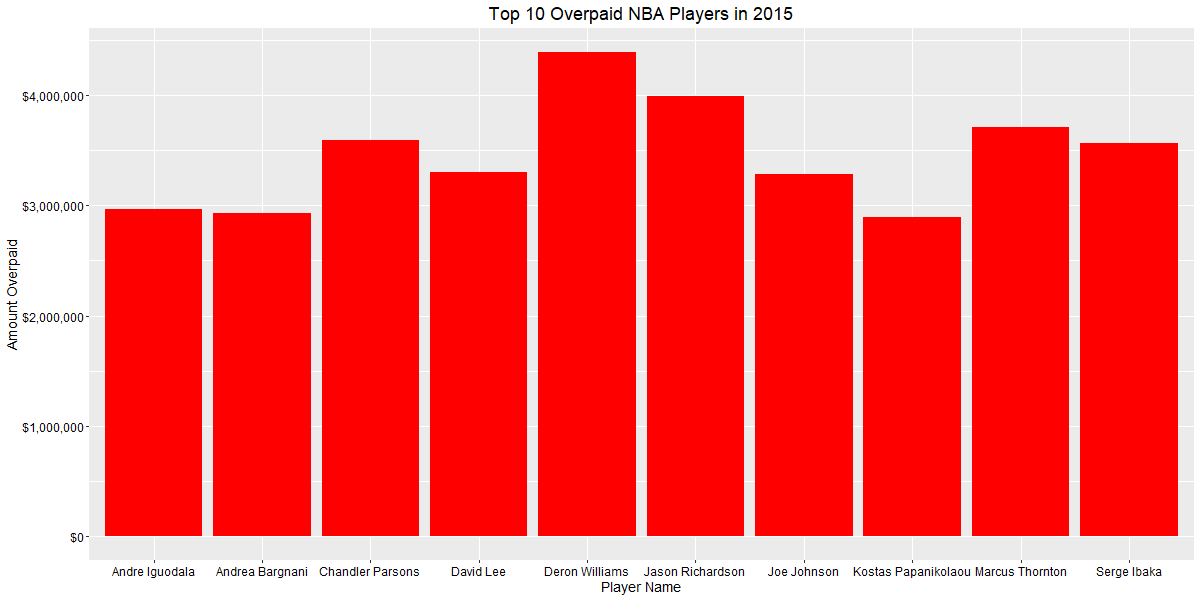

In [93]:
%%R -i top_10_overpaid_15 -w 1200 -h 600 -u px
options(scipen=999)
player_overpaid_bar_15 <- ggplot(top_10_overpaid_15, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "red") + 
labs(x = "Player Name", y = "Amount Overpaid") + ggtitle("Top 10 Overpaid NBA Players in 2015") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) + 
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour="black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))

ggsave(file="player_overpaid_bar_15.png")
player_overpaid_bar_15

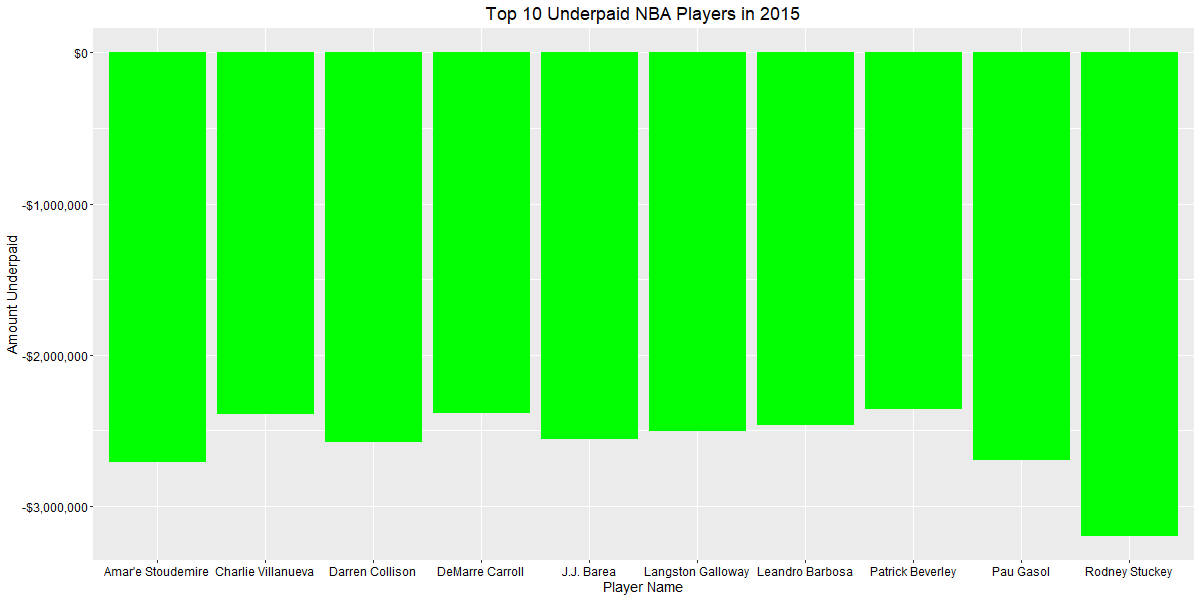

In [94]:
%%R -i top_10_underpaid_15 -w 1200 -h 600 -u px

player_underpaid_bar_15 <- ggplot(top_10_underpaid_15, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "green") + 
labs(x = "Player Name", y = "Amount Underpaid") + ggtitle("Top 10 Underpaid NBA Players in 2015") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) +
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour = "black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))
ggsave(file="player_underpaid_bar_15.png")
player_underpaid_bar_15

# Running 2016 Data in the Model

In [95]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(features_16, labels_16, verbose=False)
y_train_pred1 = xgb_model1.predict(features_16)
y_pred1 = xgb_model1.predict(features_16)

print('Train r2 score: ', r2_score(y_train_pred1, labels_16))
print('Test r2 score: ', r2_score(labels_16, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, labels_16)
test_mse1 = mean_squared_error(y_pred1, labels_16)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[13:31:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.9457051573649677
Test r2 score:  0.9549776219832756
Train RMSE: 1147450.9442
Test RMSE: 1147450.9442


In [96]:
y_train_xgb = pd.DataFrame(labels_16, columns=["Salary"])
y_predict_xgb = pd.DataFrame(y_train_pred1, columns=["Prediction"])

train_predictions_xgb = pd.DataFrame(np.concatenate([nba_subset_16, y_predict_xgb], axis=1), columns= ["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws", "Prediction"])
train_predictions_xgb.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws,Prediction
0,981348.0,0.641026,0.466667,0.135593,0.337838,0.171598,0.083491,0.353659,0.719512,0.156928,0.147826,0.021277,0.441520,0.370056,0.069444,1.673773e+06
1,1404600.0,0.538462,0.549206,0.000000,0.662162,0.017751,0.605313,0.000000,0.024390,0.001669,0.002484,1.000000,0.464912,0.861582,0.004167,1.907881e+06
2,8000000.0,0.769231,0.346032,0.056497,0.293919,0.147929,0.187856,0.695122,0.865854,0.222037,0.439752,-0.170213,0.321637,0.505650,0.152778,8.419974e+06
3,19689000.0,0.769231,0.711111,0.457627,0.263514,0.224852,0.153700,0.902439,0.902439,0.527546,0.665839,0.031915,0.649123,0.731638,0.359722,1.902708e+07
4,5158539.0,0.871795,0.409524,0.101695,0.432432,0.650888,0.130930,0.695122,0.780488,0.247078,0.267081,0.127660,0.412281,0.474576,0.125000,5.582366e+06


In [97]:
y_predict_xgb.reset_index(drop=True, inplace=True)
final_16.reset_index(drop=True, inplace=True)
names_16_actual.reset_index(drop=True, inplace=True)

In [98]:
final_df = pd.concat([y_predict_xgb, final_16], axis=1)
final_df = final_df.drop(['Player_Name'], axis=1)
final_df = final_df.drop(final_df.columns[3], axis=1)

final_df = pd.concat([final_df, names_16_actual], axis=1)
# final_df = final_df.dropna()
final_df.head(5)

,Prediction,Position,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,True_Shooting_Pct,Three_Point_Attempt_Rate,Free_Throw_Rate,Offensive_Rebound_Pct,Defensive_Rebound_Pct,Total_Rebound_Pct,Assists_Pct,Steals_Pct,Blocks_Pct,Turnovers_Pct,Usage_Pct,Offensive_Win_Shares,Defensive_Win_Shares,Win_Shares,Win_Shares/48,Offensive_Box_Plus_Minus,Defensive_Box_Plus_Minus,Box_Plus_Minus,Value_Over_Replacement_Player,Year,Salary,Player_Name
0,1.673773e+06,2,25.0,59.0,29.0,876.0,119.0,214.0,0.556,19.0,49.0,0.388,100.0,165.0,0.606,0.600,50.0,68.0,0.735,65.0,123.0,188.0,27.0,29.0,24.0,27.0,103.0,14.7,0.629,0.229,0.318,8.1,15.1,11.6,4.4,1.6,2.2,10.0,13.1,1.8,0.7,2.5,0.137,-0.2,0.2,-0.1,0.4,2016.0,981348.0,Quincy Acy
1,1.907881e+06,10,21.0,2.0,0.0,15.0,2.0,6.0,0.333,0.0,1.0,0.000,2.0,5.0,0.400,0.333,3.0,5.0,0.600,0.0,2.0,2.0,3.0,3.0,0.0,2.0,2.0,17.3,0.427,0.167,0.833,0.0,15.9,7.6,31.9,10.3,0.0,19.6,30.5,0.0,0.0,0.0,0.015,-2.5,9.4,6.9,0.0,2016.0,1404600.0,Jordan Adams
2,8.419974e+06,10,30.0,71.0,57.0,2371.0,354.0,799.0,0.443,91.0,238.0,0.382,263.0,561.0,0.469,0.500,110.0,131.0,0.840,23.0,243.0,266.0,144.0,25.0,10.0,82.0,142.0,10.9,0.531,0.298,0.164,1.1,11.0,6.1,9.9,0.5,0.3,8.7,17.9,1.8,0.9,2.7,0.055,-1.3,-1.6,-2.9,-0.5,2016.0,8000000.0,Arron Afflalo
3,1.902708e+07,2,30.0,74.0,74.0,2261.0,536.0,1045.0,0.513,0.0,16.0,0.000,536.0,1029.0,0.521,0.513,259.0,302.0,0.858,176.0,456.0,632.0,110.0,38.0,81.0,99.0,151.0,22.4,0.565,0.015,0.289,9.2,22.2,15.9,8.1,0.9,2.8,7.8,25.9,5.6,4.5,10.1,0.215,2.0,0.3,2.3,2.5,2016.0,19689000.0,LaMarcus Aldridge
4,5.582366e+06,10,34.0,64.0,57.0,1620.0,215.0,469.0,0.458,15.0,42.0,0.357,200.0,427.0,0.468,0.474,90.0,138.0,0.652,104.0,192.0,296.0,70.0,110.0,18.0,78.0,175.0,12.9,0.505,0.090,0.294,7.0,14.1,10.4,6.9,3.5,1.0,12.8,16.8,0.5,1.9,2.4,0.072,-2.2,1.2,-1.0,0.4,2016.0,5158539.0,Tony Allen


In [99]:
final_df['Salary-Prediction'] = final_df['Salary'] - final_df['Prediction']

**Rearranging the columns**

In [100]:
cols = list(final_df.columns.values)

In [101]:
cols = ['Player_Name', 'Salary', 'Prediction', 'Salary-Prediction', 'Age',
 'Games_Played',
 'Games_Started',
 'Minutes_Played',
 'Field_Goals',
 'Field_Goals_Attempted',
 'Field_Goal_Pct',
 'Three_Pointers',
 'Three_Pointers_Attempted',
 'Three_Pointers_Pct',
 'Two_Pointers',
 'Two_Pointers_Attempted',
 'Two_Pointers_Pct',
 'Effective_Field_Goal_Pct',
 'Free_Throws',
 'Free_Throws_Attempted',
 'Free_Throws_Pct',
 'Offensive_Rebounds',
 'Defensive_Rebounds',
 'Total_Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Personal_Fouls',
 'Player_Efficiency_Rating',
 'Turnovers_Pct',
 'Assists_Pct',
 'Defensive_Box_Plus_Minus',
 'Defensive_Rebound_Pct',
 'Usage_Pct']

final_df = final_df[cols]
final_df['Prediction'] = final_df['Prediction'].astype('int64')

final_df.head(5)

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
0,Quincy Acy,981348.0,1673773,-692425.125,25.0,59.0,29.0,876.0,119.0,214.0,0.556,19.0,49.0,0.388,100.0,165.0,0.606,0.600,50.0,68.0,0.735,65.0,123.0,188.0,27.0,29.0,24.0,27.0,103.0,14.7,10.0,4.4,0.2,15.1,13.1
1,Jordan Adams,1404600.0,1907881,-503281.250,21.0,2.0,0.0,15.0,2.0,6.0,0.333,0.0,1.0,0.000,2.0,5.0,0.400,0.333,3.0,5.0,0.600,0.0,2.0,2.0,3.0,3.0,0.0,2.0,2.0,17.3,19.6,31.9,9.4,15.9,30.5
2,Arron Afflalo,8000000.0,8419974,-419974.000,30.0,71.0,57.0,2371.0,354.0,799.0,0.443,91.0,238.0,0.382,263.0,561.0,0.469,0.500,110.0,131.0,0.840,23.0,243.0,266.0,144.0,25.0,10.0,82.0,142.0,10.9,8.7,9.9,-1.6,11.0,17.9
3,LaMarcus Aldridge,19689000.0,19027076,661924.000,30.0,74.0,74.0,2261.0,536.0,1045.0,0.513,0.0,16.0,0.000,536.0,1029.0,0.521,0.513,259.0,302.0,0.858,176.0,456.0,632.0,110.0,38.0,81.0,99.0,151.0,22.4,7.8,8.1,0.3,22.2,25.9
4,Tony Allen,5158539.0,5582366,-423827.500,34.0,64.0,57.0,1620.0,215.0,469.0,0.458,15.0,42.0,0.357,200.0,427.0,0.468,0.474,90.0,138.0,0.652,104.0,192.0,296.0,70.0,110.0,18.0,78.0,175.0,12.9,12.8,6.9,1.2,14.1,16.8


In [102]:
final_df_overpaid_16 = final_df.sort_values("Salary-Prediction", ascending = False)
top_10_overpaid_16 = final_df_overpaid_16.head(10)
top_10_overpaid_16

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
333,Lance Stephenson,9000000.0,4240104,4759895.5,25.0,69.0,13.0,1372.0,228.0,474.0,0.481,30.0,78.0,0.385,198.0,396.0,0.500,0.513,87.0,111.0,0.784,40.0,183.0,223.0,133.0,43.0,9.0,94.0,135.0,13.5,15.2,16.2,-0.3,15.1,20.2
331,Tiago Splitter,9756250.0,5836750,3919499.5,31.0,36.0,2.0,579.0,81.0,155.0,0.523,0.0,2.0,0.000,81.0,153.0,0.529,0.523,39.0,48.0,0.813,45.0,75.0,120.0,30.0,20.0,12.0,24.0,71.0,13.7,12.0,7.9,0.5,13.8,15.5
205,Michael Kidd-Gilchrist,6331404.0,2743396,3588007.5,22.0,7.0,7.0,205.0,33.0,61.0,0.541,3.0,7.0,0.429,30.0,54.0,0.556,0.566,20.0,29.0,0.690,12.0,33.0,45.0,9.0,3.0,3.0,8.0,9.0,16.9,9.8,7.3,-0.2,17.8,18.0
64,DeMarre Carroll,13600000.0,10054780,3545220.0,29.0,26.0,22.0,786.0,105.0,270.0,0.389,46.0,118.0,0.390,59.0,152.0,0.388,0.474,30.0,50.0,0.600,31.0,91.0,122.0,27.0,44.0,6.0,28.0,63.0,11.9,8.8,5.5,1.1,13.1,18.5
130,Eric Gordon,15514031.0,12094824,3419207.0,27.0,45.0,44.0,1481.0,231.0,552.0,0.418,113.0,294.0,0.384,118.0,258.0,0.457,0.521,111.0,125.0,0.888,10.0,89.0,99.0,121.0,43.0,14.0,73.0,98.0,13.5,10.7,12.7,-1.0,6.9,20.3
151,Tobias Harris,16000000.0,12624060,3375940.0,23.0,76.0,74.0,2513.0,417.0,889.0,0.469,80.0,239.0,0.335,337.0,650.0,0.518,0.514,202.0,243.0,0.831,96.0,414.0,510.0,169.0,65.0,40.0,108.0,153.0,16.2,9.8,10.6,0.3,18.6,19.3
234,Wesley Matthews,16407500.0,13280896,3126604.0,29.0,78.0,78.0,2644.0,331.0,854.0,0.388,189.0,525.0,0.360,142.0,329.0,0.432,0.498,126.0,146.0,0.863,27.0,211.0,238.0,151.0,78.0,17.0,78.0,179.0,10.9,7.8,8.9,-0.1,8.8,17.2
175,Andre Iguodala,11710456.0,8767072,2943384.0,32.0,65.0,1.0,1732.0,176.0,368.0,0.478,54.0,154.0,0.351,122.0,214.0,0.570,0.552,51.0,83.0,0.614,52.0,211.0,263.0,219.0,73.0,19.0,79.0,102.0,12.2,16.3,16.3,1.3,12.4,12.1
320,Iman Shumpert,8988765.0,6045441,2943323.5,25.0,54.0,5.0,1316.0,114.0,305.0,0.374,43.0,146.0,0.295,71.0,159.0,0.447,0.444,40.0,51.0,0.784,32.0,171.0,203.0,92.0,54.0,19.0,57.0,119.0,8.4,14.8,9.8,1.4,14.6,13.2
48,Corey Brewer,8229375.0,5393711,2835663.5,29.0,82.0,12.0,1669.0,212.0,552.0,0.384,61.0,224.0,0.272,151.0,328.0,0.460,0.439,105.0,140.0,0.750,42.0,157.0,199.0,109.0,84.0,19.0,78.0,168.0,9.9,11.3,10.0,-0.3,10.4,17.8


In [103]:
final_df_underpaid_16 = final_df.sort_values("Salary-Prediction", ascending = True)
top_10_underpaid_16 = final_df_underpaid_16.head(10)
top_10_underpaid_16

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
31,Kent Bazemore,2000000.0,5111111,-3111111.50,26.0,75.0,68.0,2083.0,320.0,725.0,0.441,109.0,305.0,0.357,211.0,420.0,0.502,0.517,123.0,151.0,0.815,28.0,351.0,379.0,171.0,98.0,38.0,138.0,176.0,13.4,14.8,12.7,1.5,18.0,20.0
325,Ish Smith,947276.0,3748740,-2801464.00,27.0,77.0,53.0,2239.0,397.0,967.0,0.411,56.0,170.0,0.329,341.0,797.0,0.428,0.440,122.0,176.0,0.693,43.0,262.0,305.0,502.0,88.0,24.0,175.0,133.0,14.9,14.4,38.3,-1.3,13.3,23.9
278,Kelly Olynyk,2165160.0,4826370,-2661210.00,24.0,69.0,8.0,1395.0,253.0,556.0,0.455,85.0,210.0,0.405,168.0,346.0,0.486,0.531,96.0,128.0,0.750,72.0,209.0,281.0,105.0,52.0,33.0,74.0,163.0,16.3,10.8,11.9,0.8,16.2,20.9
169,Rodney Hood,1348440.0,3997333,-2648893.00,23.0,79.0,79.0,2541.0,408.0,972.0,0.420,161.0,449.0,0.359,247.0,523.0,0.472,0.503,172.0,200.0,0.860,38.0,229.0,267.0,213.0,73.0,16.0,125.0,202.0,14.1,10.5,14.4,0.0,10.5,21.5
26,Will Barton,3533333.0,6115936,-2582603.50,25.0,82.0,1.0,2353.0,425.0,983.0,0.432,112.0,325.0,0.345,313.0,658.0,0.476,0.489,216.0,268.0,0.806,59.0,417.0,476.0,203.0,71.0,39.0,139.0,147.0,16.0,11.2,14.4,-0.4,20.0,23.0
122,Pau Gasol,7448760.0,10021274,-2572514.00,35.0,72.0,72.0,2291.0,467.0,995.0,0.469,24.0,69.0,0.348,443.0,926.0,0.478,0.481,229.0,289.0,0.792,155.0,638.0,793.0,294.0,42.0,146.0,164.0,148.0,21.7,12.8,21.7,2.3,28.7,24.6
369,Marvin Williams,7000000.0,9312182,-2312182.00,29.0,81.0,81.0,2338.0,338.0,747.0,0.452,152.0,378.0,0.402,186.0,369.0,0.504,0.554,120.0,144.0,0.833,127.0,394.0,521.0,110.0,58.0,77.0,62.0,133.0,16.8,7.1,7.6,0.5,18.6,16.8
348,Evan Turner,3425510.0,5491414,-2065904.50,27.0,81.0,12.0,2271.0,343.0,753.0,0.456,20.0,83.0,0.241,323.0,670.0,0.482,0.469,148.0,179.0,0.827,50.0,347.0,397.0,359.0,80.0,28.0,169.0,139.0,13.6,16.9,23.9,0.9,16.5,18.8
365,Deron Williams,5378974.0,7443563,-2064589.50,31.0,65.0,63.0,2106.0,321.0,775.0,0.414,97.0,282.0,0.344,224.0,493.0,0.454,0.477,179.0,206.0,0.869,19.0,171.0,190.0,378.0,61.0,14.0,150.0,155.0,14.6,14.8,29.3,-0.7,8.9,22.0
233,Kevin Martin,200600.0,2154428,-1953828.75,32.0,55.0,13.0,1095.0,156.0,419.0,0.372,49.0,136.0,0.360,107.0,283.0,0.378,0.431,153.0,172.0,0.890,14.0,96.0,110.0,58.0,26.0,3.0,54.0,83.0,11.5,9.8,8.2,-1.6,10.0,22.6


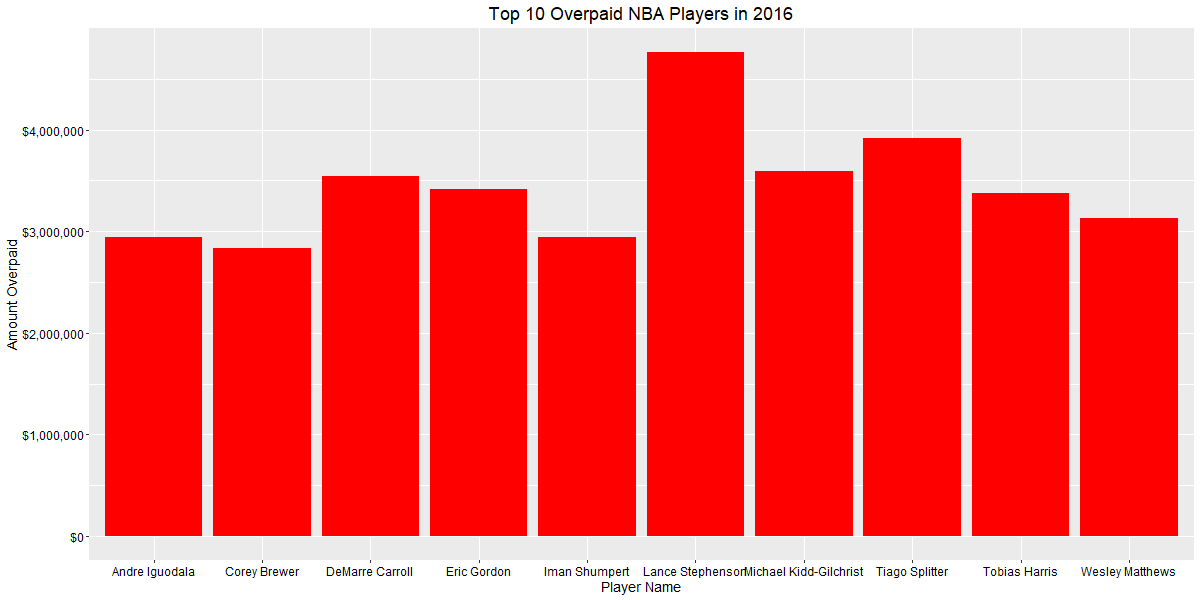

In [104]:
%%R -i top_10_overpaid_16 -w 1200 -h 600 -u px
options(scipen=999)
player_overpaid_bar_16 <- ggplot(top_10_overpaid_16, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "red") + 
labs(x = "Player Name", y = "Amount Overpaid") + ggtitle("Top 10 Overpaid NBA Players in 2016") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) + 
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour="black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))

ggsave(file="player_overpaid_bar_16.png")
player_overpaid_bar_16

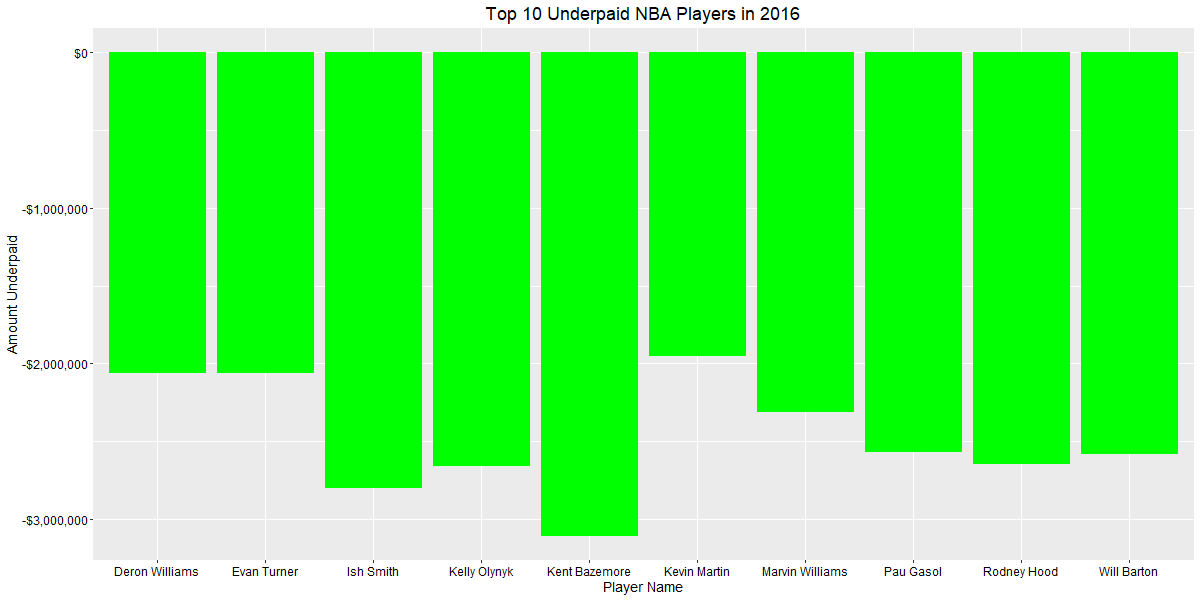

In [105]:
%%R -i top_10_underpaid_16 -w 1200 -h 600 -u px

player_underpaid_bar_16 <- ggplot(top_10_underpaid_16, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "green") + 
labs(x = "Player Name", y = "Amount Underpaid") + ggtitle("Top 10 Underpaid NBA Players in 2016") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) +
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour = "black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))
ggsave(file="player_underpaid_bar_16.png")
player_underpaid_bar_16

# Running 2017 Data in the Model

In [106]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(features_17, labels_17, verbose=False)
y_train_pred1 = xgb_model1.predict(features_17)
y_pred1 = xgb_model1.predict(features_17)

print('Train r2 score: ', r2_score(y_train_pred1, labels_17))
print('Test r2 score: ', r2_score(labels_17, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, labels_17)
test_mse1 = mean_squared_error(y_pred1, labels_17)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[13:32:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.9240670772224324
Test r2 score:  0.9398401824768344
Train RMSE: 1641826.5574
Test RMSE: 1641826.5574


In [107]:
y_train_xgb = pd.DataFrame(labels_17, columns=["Salary"])
y_predict_xgb = pd.DataFrame(y_train_pred1, columns=["Prediction"])

train_predictions_xgb = pd.DataFrame(np.concatenate([nba_subset_17, y_predict_xgb], axis=1), columns= ["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws", "Prediction"])
train_predictions_xgb.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws,Prediction
0,1790092.0,0.650,0.383117,0.070093,0.222477,0.089172,0.085515,0.012195,0.463415,0.103139,0.084951,-0.153846,0.497238,0.402878,0.060322,2.033745e+06
1,3140517.0,0.575,0.535714,0.364486,0.366972,0.566879,0.094241,0.975610,0.975610,0.549776,0.453883,0.000000,0.425414,0.388489,0.210456,3.678990e+06
2,12500000.0,0.775,0.288961,0.028037,0.192661,0.133758,0.129145,0.548780,0.743902,0.112108,0.224515,-0.384615,0.232044,0.345324,0.111260,1.141594e+07
3,20575005.0,0.775,0.603896,0.411215,0.176606,0.292994,0.172775,0.878049,0.878049,0.469058,0.606796,0.025641,0.458564,0.587530,0.294906,2.106197e+07
4,4000000.0,0.675,0.376623,0.112150,0.314220,0.114650,0.158813,0.060976,0.743902,0.196413,0.093447,-0.051282,0.400552,0.261391,0.030831,4.843621e+06


In [108]:
y_predict_xgb.reset_index(drop=True, inplace=True)
final_17.reset_index(drop=True, inplace=True)
names_17_actual.reset_index(drop=True, inplace=True)

In [109]:
final_df = pd.concat([y_predict_xgb, final_17], axis=1)
final_df = final_df.drop(['Player_Name'], axis=1)
final_df = final_df.drop(final_df.columns[3], axis=1)

final_df = pd.concat([final_df, names_17_actual], axis=1)
# final_df = final_df.dropna()
final_df.head(5)

,Prediction,Position,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,True_Shooting_Pct,Three_Point_Attempt_Rate,Free_Throw_Rate,Offensive_Rebound_Pct,Defensive_Rebound_Pct,Total_Rebound_Pct,Assists_Pct,Steals_Pct,Blocks_Pct,Turnovers_Pct,Usage_Pct,Offensive_Win_Shares,Defensive_Win_Shares,Win_Shares,Win_Shares/48,Offensive_Box_Plus_Minus,Defensive_Box_Plus_Minus,Box_Plus_Minus,Value_Over_Replacement_Player,Year,Salary,Player_Name
0,2.033745e+06,2,26.0,38.0,1.0,558.0,70.0,170.0,0.412,37.0,90.0,0.411,33.0,80.0,0.413,0.521,45.0,60.0,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,11.8,0.565,0.529,0.353,3.9,18.0,11.0,4.9,1.2,2.0,9.7,16.8,0.5,0.5,0.9,0.082,-1.5,-0.6,-2.1,0.0,2017.0,1790092.0,Quincy Acy
1,3.678990e+06,0,23.0,80.0,80.0,2389.0,374.0,655.0,0.571,0.0,1.0,0.000,374.0,654.0,0.572,0.571,157.0,257.0,0.611,281.0,332.0,613.0,86.0,89.0,78.0,146.0,195.0,16.5,0.589,0.002,0.392,13.0,15.4,14.2,5.4,1.8,2.6,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1,2017.0,3140517.0,Steven Adams
2,1.141594e+07,10,31.0,61.0,45.0,1580.0,185.0,420.0,0.440,62.0,151.0,0.411,123.0,269.0,0.457,0.514,83.0,93.0,0.892,9.0,116.0,125.0,78.0,21.0,6.0,42.0,104.0,8.9,0.559,0.360,0.221,0.7,8.4,4.6,7.4,0.7,0.3,8.4,14.4,1.2,0.2,1.4,0.043,-2.1,-1.5,-3.6,-0.7,2017.0,12500000.0,Arron Afflalo
3,2.106197e+07,2,31.0,72.0,72.0,2335.0,500.0,1049.0,0.477,23.0,56.0,0.411,477.0,993.0,0.480,0.488,220.0,271.0,0.812,172.0,351.0,523.0,139.0,46.0,88.0,98.0,158.0,18.6,0.532,0.053,0.258,8.5,16.6,12.7,9.9,1.0,3.0,7.7,24.5,3.5,3.7,7.2,0.149,0.7,0.1,0.8,1.7,2017.0,20575005.0,LaMarcus Aldridge
4,4.843621e+06,2,27.0,61.0,5.0,871.0,77.0,168.0,0.458,0.0,1.0,0.000,77.0,167.0,0.461,0.458,23.0,33.0,0.697,105.0,114.0,219.0,57.0,18.0,24.0,29.0,78.0,11.6,0.485,0.006,0.196,13.7,14.5,14.1,9.1,1.0,2.4,13.7,10.9,0.9,0.8,1.7,0.093,-1.5,-0.2,-1.7,0.1,2017.0,4000000.0,Lavoy Allen


In [110]:
final_df['Salary-Prediction'] = final_df['Salary'] - final_df['Prediction']

**Rearranging the columns**

In [111]:
cols = list(final_df.columns.values)

In [112]:
cols = ['Player_Name', 'Salary', 'Prediction', 'Salary-Prediction', 'Age',
 'Games_Played',
 'Games_Started',
 'Minutes_Played',
 'Field_Goals',
 'Field_Goals_Attempted',
 'Field_Goal_Pct',
 'Three_Pointers',
 'Three_Pointers_Attempted',
 'Three_Pointers_Pct',
 'Two_Pointers',
 'Two_Pointers_Attempted',
 'Two_Pointers_Pct',
 'Effective_Field_Goal_Pct',
 'Free_Throws',
 'Free_Throws_Attempted',
 'Free_Throws_Pct',
 'Offensive_Rebounds',
 'Defensive_Rebounds',
 'Total_Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Personal_Fouls',
 'Player_Efficiency_Rating',
 'Turnovers_Pct',
 'Assists_Pct',
 'Defensive_Box_Plus_Minus',
 'Defensive_Rebound_Pct',
 'Usage_Pct']

final_df = final_df[cols]
final_df['Prediction'] = final_df['Prediction'].astype('int64')

final_df.head(5)

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
0,Quincy Acy,1790092.0,2033745,-243653.375,26.0,38.0,1.0,558.0,70.0,170.0,0.412,37.0,90.0,0.411,33.0,80.0,0.413,0.521,45.0,60.0,0.750,20.0,95.0,115.0,18.0,14.0,15.0,21.0,67.0,11.8,9.7,4.9,-0.6,18.0,16.8
1,Steven Adams,3140517.0,3678990,-538473.500,23.0,80.0,80.0,2389.0,374.0,655.0,0.571,0.0,1.0,0.000,374.0,654.0,0.572,0.571,157.0,257.0,0.611,281.0,332.0,613.0,86.0,89.0,78.0,146.0,195.0,16.5,16.0,5.4,0.0,15.4,16.2
2,Arron Afflalo,12500000.0,11415942,1084058.000,31.0,61.0,45.0,1580.0,185.0,420.0,0.440,62.0,151.0,0.411,123.0,269.0,0.457,0.514,83.0,93.0,0.892,9.0,116.0,125.0,78.0,21.0,6.0,42.0,104.0,8.9,8.4,7.4,-1.5,8.4,14.4
3,LaMarcus Aldridge,20575005.0,21061966,-486961.000,31.0,72.0,72.0,2335.0,500.0,1049.0,0.477,23.0,56.0,0.411,477.0,993.0,0.480,0.488,220.0,271.0,0.812,172.0,351.0,523.0,139.0,46.0,88.0,98.0,158.0,18.6,7.7,9.9,0.1,16.6,24.5
4,Lavoy Allen,4000000.0,4843621,-843621.000,27.0,61.0,5.0,871.0,77.0,168.0,0.458,0.0,1.0,0.000,77.0,167.0,0.461,0.458,23.0,33.0,0.697,105.0,114.0,219.0,57.0,18.0,24.0,29.0,78.0,11.6,13.7,9.1,-0.2,14.5,10.9


In [113]:
final_df_overpaid_17 = final_df.sort_values("Salary-Prediction", ascending = False)
top_10_overpaid_17 = final_df_overpaid_17.head(10)
top_10_overpaid_17

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
286,Chandler Parsons,22116750.0,14710280,7406470.0,28.0,34.0,34.0,675.0,75.0,222.0,0.338,25.0,93.0,0.269,50.0,129.0,0.388,0.394,35.0,43.0,0.814,6.0,78.0,84.0,55.0,20.0,5.0,24.0,52.0,7.7,9.1,12.8,-0.2,13.6,17.8
85,Luol Deng,18000000.0,11854422,6145578.0,31.0,56.0,49.0,1486.0,164.0,424.0,0.387,51.0,165.0,0.309,113.0,259.0,0.436,0.447,46.0,63.0,0.730,63.0,232.0,295.0,74.0,48.0,20.0,43.0,61.0,10.1,8.7,7.0,-0.6,17.7,14.2
353,Evan Turner,16393443.0,11589294,4804149.0,28.0,65.0,12.0,1658.0,235.0,552.0,0.426,31.0,118.0,0.263,204.0,434.0,0.470,0.454,85.0,103.0,0.825,36.0,211.0,247.0,205.0,53.0,24.0,100.0,121.0,11.4,14.3,18.4,-0.1,14.2,18.5
167,Al Horford,26540100.0,21786892,4753208.0,30.0,68.0,68.0,2193.0,379.0,801.0,0.473,86.0,242.0,0.355,293.0,559.0,0.524,0.527,108.0,135.0,0.800,95.0,370.0,465.0,337.0,52.0,86.0,115.0,138.0,17.7,11.8,24.4,1.1,18.6,19.7
92,Jared Dudley,10470000.0,5942127,4527873.0,31.0,64.0,7.0,1362.0,157.0,346.0,0.454,77.0,203.0,0.379,80.0,143.0,0.559,0.565,43.0,65.0,0.662,31.0,194.0,225.0,121.0,42.0,16.0,73.0,154.0,10.6,16.3,12.5,0.1,15.9,13.8
51,Alec Burks,10154495.0,5692048,4462446.5,25.0,42.0,0.0,653.0,99.0,248.0,0.399,25.0,76.0,0.329,74.0,172.0,0.430,0.450,60.0,78.0,0.769,17.0,103.0,120.0,30.0,18.0,5.0,35.0,50.0,11.6,11.0,7.5,0.0,17.7,22.7
276,Dirk Nowitzki,25000000.0,20795476,4204524.0,38.0,54.0,54.0,1424.0,296.0,678.0,0.437,79.0,209.0,0.378,217.0,469.0,0.463,0.495,98.0,112.0,0.875,23.0,330.0,353.0,82.0,30.0,38.0,51.0,113.0,17.0,6.6,10.6,0.1,28.3,25.8
273,Joakim Noah,17000000.0,13034342,3965658.0,31.0,46.0,46.0,1015.0,99.0,202.0,0.490,0.0,1.0,0.000,99.0,201.0,0.493,0.490,34.0,78.0,0.436,162.0,241.0,403.0,103.0,30.0,37.0,58.0,127.0,15.2,19.7,14.1,0.4,25.6,12.6
204,Brandon Knight,12606250.0,8798514,3807736.0,25.0,54.0,5.0,1140.0,209.0,525.0,0.398,45.0,139.0,0.324,164.0,386.0,0.425,0.441,132.0,154.0,0.857,25.0,93.0,118.0,130.0,27.0,5.0,88.0,87.0,12.4,12.9,17.8,-2.1,9.1,25.0
156,John Henson,12517606.0,8800004,3717602.0,26.0,58.0,39.0,1123.0,159.0,309.0,0.515,0.0,1.0,0.000,159.0,308.0,0.516,0.515,74.0,107.0,0.692,92.0,203.0,295.0,57.0,29.0,78.0,52.0,151.0,15.3,12.7,7.7,0.7,20.8,16.6


In [114]:
final_df_underpaid_17 = final_df.sort_values("Salary-Prediction", ascending = True)
top_10_underpaid_17 = final_df_underpaid_17.head(10)
top_10_underpaid_17

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
363,Dion Waiters,2898000.0,7173128,-4275128.50,25.0,46.0,43.0,1384.0,281.0,663.0,0.424,85.0,215.0,0.395,196.0,448.0,0.438,0.488,82.0,127.0,0.646,18.0,135.0,153.0,200.0,42.0,20.0,103.0,95.0,14.5,12.5,23.8,-0.4,10.9,26.3
376,Deron Williams,259526.0,4387177,-4127651.00,32.0,64.0,44.0,1657.0,263.0,600.0,0.438,85.0,234.0,0.363,178.0,366.0,0.486,0.509,90.0,109.0,0.826,14.0,133.0,147.0,360.0,31.0,8.0,138.0,138.0,14.0,17.6,35.9,-1.8,9.4,22.1
203,Sean Kilpatrick,980431.0,4833067,-3852636.00,27.0,70.0,24.0,1754.0,305.0,735.0,0.415,105.0,308.0,0.341,200.0,427.0,0.468,0.486,204.0,242.0,0.843,22.0,258.0,280.0,157.0,45.0,6.0,135.0,118.0,13.1,13.8,14.6,-1.4,15.4,23.8
22,Matt Barnes,242224.0,3653303,-3411079.25,36.0,74.0,18.0,1777.0,185.0,473.0,0.391,87.0,263.0,0.331,98.0,210.0,0.467,0.483,70.0,89.0,0.787,70.0,314.0,384.0,195.0,48.0,26.0,107.0,185.0,10.3,17.3,15.7,0.3,19.7,15.6
137,JaMychal Green,980431.0,3926015,-2945584.50,26.0,77.0,75.0,2101.0,250.0,500.0,0.500,55.0,145.0,0.379,195.0,355.0,0.549,0.555,134.0,167.0,0.802,167.0,377.0,544.0,84.0,47.0,34.0,94.0,248.0,13.5,14.1,6.3,0.2,21.1,14.4
195,Terrence Jones,980431.0,3883318,-2902887.75,25.0,54.0,12.0,1270.0,231.0,492.0,0.470,19.0,75.0,0.253,212.0,417.0,0.508,0.489,103.0,170.0,0.606,65.0,241.0,306.0,59.0,40.0,54.0,48.0,67.0,16.1,7.8,7.5,0.4,20.2,21.4
30,Michael Beasley,1403611.0,4244590,-2840979.50,28.0,56.0,6.0,935.0,216.0,406.0,0.532,18.0,43.0,0.419,198.0,363.0,0.545,0.554,78.0,105.0,0.743,40.0,153.0,193.0,53.0,27.0,27.0,66.0,92.0,17.8,12.7,9.9,-0.8,18.9,25.3
238,CJ McCollum,3219579.0,5900217,-2680638.50,25.0,80.0,80.0,2796.0,692.0,1441.0,0.480,185.0,439.0,0.421,507.0,1002.0,0.506,0.544,268.0,294.0,0.912,60.0,229.0,289.0,285.0,72.0,42.0,172.0,202.0,19.9,9.9,18.0,-1.4,9.1,27.5
328,Jonathon Simmons,874636.0,3519596,-2644960.50,27.0,78.0,8.0,1392.0,177.0,421.0,0.420,30.0,102.0,0.294,147.0,319.0,0.461,0.456,99.0,132.0,0.750,20.0,140.0,160.0,126.0,47.0,25.0,76.0,146.0,9.9,13.7,13.2,1.1,11.1,18.0
107,Raymond Felton,980431.0,3583678,-2603247.25,32.0,80.0,11.0,1700.0,221.0,514.0,0.430,46.0,144.0,0.319,175.0,370.0,0.473,0.475,50.0,64.0,0.781,33.0,185.0,218.0,191.0,66.0,22.0,83.0,125.0,10.9,13.3,16.3,0.7,11.9,16.5


**Making the Plots**

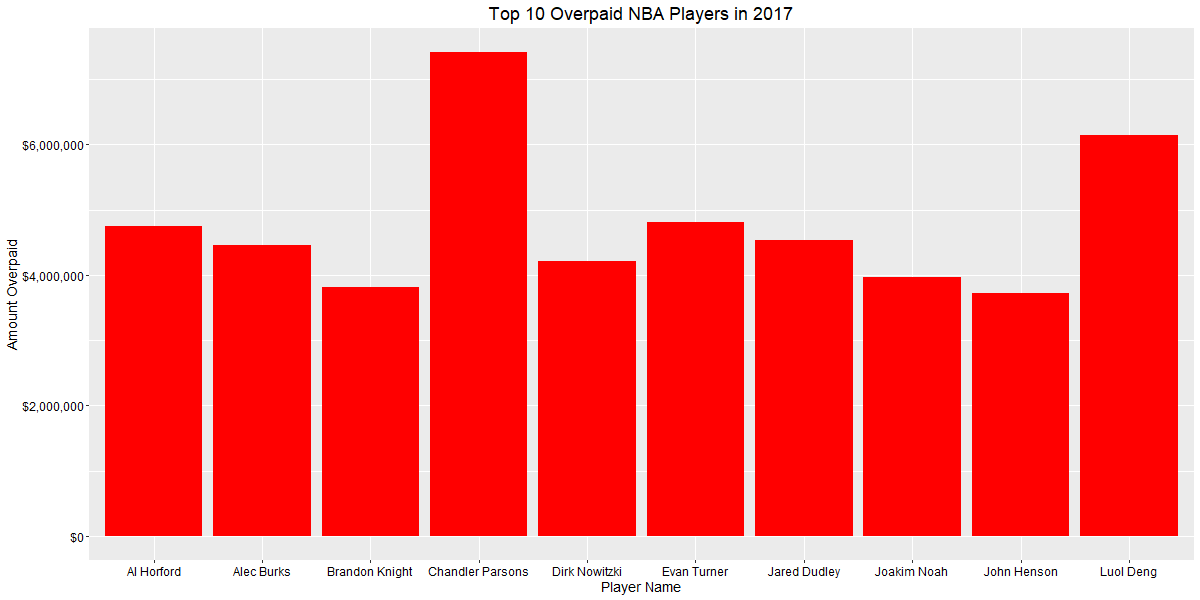

In [115]:
%%R -i top_10_overpaid_17 -w 1200 -h 600 -u px
options(scipen=999)
player_overpaid_bar_17 <- ggplot(top_10_overpaid_17, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "red") + 
labs(x = "Player Name", y = "Amount Overpaid") + ggtitle("Top 10 Overpaid NBA Players in 2017") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) + 
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour="black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))

ggsave(file="player_overpaid_bar_17.png")
player_overpaid_bar_17

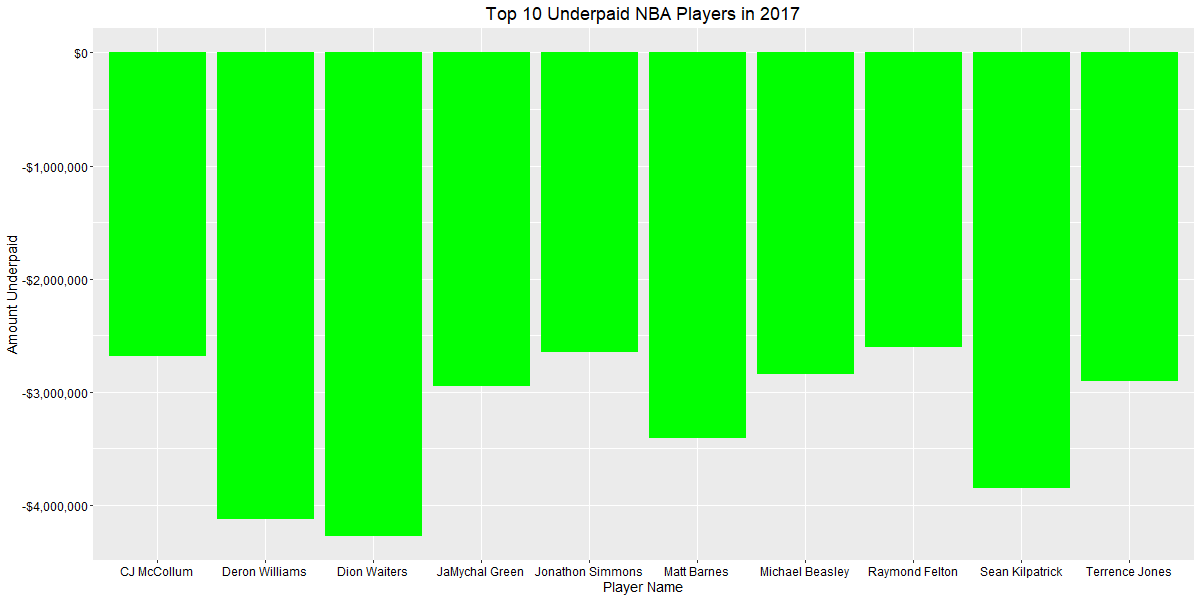

In [116]:
%%R -i top_10_underpaid_17 -w 1200 -h 600 -u px

player_underpaid_bar_17 <- ggplot(top_10_underpaid_17, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "green") + 
labs(x = "Player Name", y = "Amount Underpaid") + ggtitle("Top 10 Underpaid NBA Players in 2017") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) +
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour = "black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))
ggsave(file="player_underpaid_bar_17.png")
player_underpaid_bar_17

# Running 2018 Data in the Model

In [117]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(features_18, labels_18, verbose=False)
y_train_pred1 = xgb_model1.predict(features_18)
y_pred1 = xgb_model1.predict(features_18)

print('Train r2 score: ', r2_score(y_train_pred1, labels_18))
print('Test r2 score: ', r2_score(labels_18, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, labels_18)
test_mse1 = mean_squared_error(y_pred1, labels_18)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[13:34:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.9022915446689753
Test r2 score:  0.9262451282632693
Train RMSE: 2124853.1538
Test RMSE: 2124853.1538


In [118]:
y_train_xgb = pd.DataFrame(labels_18, columns=["Salary"])
y_predict_xgb = pd.DataFrame(y_train_pred1, columns=["Prediction"])

train_predictions_xgb = pd.DataFrame(np.concatenate([nba_subset_18, y_predict_xgb], axis=1), columns= ["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws", "Prediction"])
train_predictions_xgb.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws,Prediction
0,22471910.0,0.585366,0.691275,0.404145,0.391176,0.519774,0.110442,0.926829,0.926829,0.549318,0.574359,-0.122449,0.379781,0.462604,0.256410,20231560.00
1,2955840.0,0.487805,0.526846,0.212435,0.400000,0.180791,0.220884,0.231707,0.841463,0.305533,0.223077,0.142857,0.590164,0.440443,0.206731,2535676.25
2,21461010.0,0.780488,0.838926,0.466321,0.200000,0.242938,0.226908,0.914634,0.914634,0.509222,0.880769,-0.081633,0.472678,0.806094,0.535256,23167536.00
3,2034120.0,0.463415,0.587248,0.455959,0.444118,0.158192,0.108434,0.378049,0.878049,0.311147,0.300000,0.020408,0.494536,0.451524,0.182692,2367933.00
4,1471382.0,0.878049,0.291946,0.015544,0.467647,0.062147,0.092369,0.000000,0.268293,0.037690,0.056410,-0.061224,0.284153,0.523546,0.017628,2608320.50


In [119]:
y_predict_xgb.reset_index(drop=True, inplace=True)
final_18.reset_index(drop=True, inplace=True)
names_18_actual.reset_index(drop=True, inplace=True)

In [120]:
final_df = pd.concat([y_predict_xgb, final_18], axis=1)
final_df = final_df.drop(['Player_Name'], axis=1)
final_df = final_df.drop(final_df.columns[3], axis=1)

final_df = pd.concat([final_df, names_18_actual], axis=1)
# final_df = final_df.dropna()
final_df.head(5)

,Prediction,Position,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,True_Shooting_Pct,Three_Point_Attempt_Rate,Free_Throw_Rate,Offensive_Rebound_Pct,Defensive_Rebound_Pct,Total_Rebound_Pct,Assists_Pct,Steals_Pct,Blocks_Pct,Turnovers_Pct,Usage_Pct,Offensive_Win_Shares,Defensive_Win_Shares,Win_Shares,Win_Shares/48,Offensive_Box_Plus_Minus,Defensive_Box_Plus_Minus,Box_Plus_Minus,Value_Over_Replacement_Player,Year,Salary,Player_Name
0,20231560.00,0,24.0,76.0,76.0,2487.0,448.0,712.0,0.629,0.0,2.0,0.000,448.0,710.0,0.631,0.629,160.0,286.0,0.559,384.0,301.0,685.0,88.0,92.0,78.0,128.0,215.0,20.6,0.630,0.003,0.402,16.6,13.9,15.3,5.5,1.8,2.8,13.3,16.7,6.7,3.0,9.7,0.187,1.7,-0.6,1.1,2.0,2018.0,22471910.0,Steven Adams
1,2535676.25,0,20.0,69.0,19.0,1368.0,174.0,340.0,0.512,0.0,7.0,0.000,174.0,333.0,0.523,0.512,129.0,179.0,0.721,118.0,263.0,381.0,101.0,32.0,41.0,66.0,138.0,15.7,0.570,0.021,0.526,9.7,21.6,15.6,11.0,1.2,2.5,13.6,15.9,2.3,1.9,4.2,0.148,-1.1,0.7,-0.4,0.6,2018.0,2955840.0,Bam Adebayo
2,23167536.00,0,32.0,75.0,75.0,2509.0,687.0,1347.0,0.510,27.0,92.0,0.293,660.0,1255.0,0.526,0.520,334.0,399.0,0.837,246.0,389.0,635.0,152.0,43.0,90.0,111.0,161.0,25.0,0.570,0.068,0.296,10.8,17.3,14.0,11.3,0.9,3.0,6.8,29.1,7.4,3.5,10.9,0.209,4.3,-0.4,3.9,3.7,2018.0,21461010.0,LaMarcus Aldridge
3,2367933.00,0,19.0,72.0,31.0,1441.0,234.0,397.0,0.589,5.0,15.0,0.333,229.0,382.0,0.599,0.596,114.0,147.0,0.776,144.0,244.0,388.0,49.0,28.0,88.0,82.0,147.0,17.5,0.636,0.038,0.370,10.5,18.1,14.3,5.4,0.9,4.6,15.1,16.3,2.7,1.5,4.2,0.141,-0.9,0.1,-0.8,0.5,2018.0,2034120.0,Jarrett Allen
4,2608320.50,7,36.0,22.0,0.0,273.0,44.0,91.0,0.484,4.0,12.0,0.333,40.0,79.0,0.506,0.505,11.0,21.0,0.524,20.0,27.0,47.0,9.0,11.0,3.0,19.0,49.0,8.7,0.514,0.132,0.231,8.2,10.4,9.3,4.6,1.9,0.9,15.9,18.9,-0.2,0.2,0.1,0.017,-5.2,-0.3,-5.5,-0.2,2018.0,1471382.0,Tony Allen


In [121]:
final_df['Salary-Prediction'] = final_df['Salary'] - final_df['Prediction']

**Rearranging the columns**

In [122]:
cols = list(final_df.columns.values)

In [123]:
cols = ['Player_Name', 'Salary', 'Prediction', 'Salary-Prediction', 'Age',
 'Games_Played',
 'Games_Started',
 'Minutes_Played',
 'Field_Goals',
 'Field_Goals_Attempted',
 'Field_Goal_Pct',
 'Three_Pointers',
 'Three_Pointers_Attempted',
 'Three_Pointers_Pct',
 'Two_Pointers',
 'Two_Pointers_Attempted',
 'Two_Pointers_Pct',
 'Effective_Field_Goal_Pct',
 'Free_Throws',
 'Free_Throws_Attempted',
 'Free_Throws_Pct',
 'Offensive_Rebounds',
 'Defensive_Rebounds',
 'Total_Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Personal_Fouls',
 'Player_Efficiency_Rating',
 'Turnovers_Pct',
 'Assists_Pct',
 'Defensive_Box_Plus_Minus',
 'Defensive_Rebound_Pct',
 'Usage_Pct']

final_df = final_df[cols]
final_df['Prediction'] = final_df['Prediction'].astype('int64')

final_df.head(5)

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
0,Steven Adams,22471910.0,20231560,2240350.00,24.0,76.0,76.0,2487.0,448.0,712.0,0.629,0.0,2.0,0.000,448.0,710.0,0.631,0.629,160.0,286.0,0.559,384.0,301.0,685.0,88.0,92.0,78.0,128.0,215.0,20.6,13.3,5.5,-0.6,13.9,16.7
1,Bam Adebayo,2955840.0,2535676,420163.75,20.0,69.0,19.0,1368.0,174.0,340.0,0.512,0.0,7.0,0.000,174.0,333.0,0.523,0.512,129.0,179.0,0.721,118.0,263.0,381.0,101.0,32.0,41.0,66.0,138.0,15.7,13.6,11.0,0.7,21.6,15.9
2,LaMarcus Aldridge,21461010.0,23167536,-1706526.00,32.0,75.0,75.0,2509.0,687.0,1347.0,0.510,27.0,92.0,0.293,660.0,1255.0,0.526,0.520,334.0,399.0,0.837,246.0,389.0,635.0,152.0,43.0,90.0,111.0,161.0,25.0,6.8,11.3,-0.4,17.3,29.1
3,Jarrett Allen,2034120.0,2367933,-333813.00,19.0,72.0,31.0,1441.0,234.0,397.0,0.589,5.0,15.0,0.333,229.0,382.0,0.599,0.596,114.0,147.0,0.776,144.0,244.0,388.0,49.0,28.0,88.0,82.0,147.0,17.5,15.1,5.4,0.1,18.1,16.3
4,Tony Allen,1471382.0,2608320,-1136938.50,36.0,22.0,0.0,273.0,44.0,91.0,0.484,4.0,12.0,0.333,40.0,79.0,0.506,0.505,11.0,21.0,0.524,20.0,27.0,47.0,9.0,11.0,3.0,19.0,49.0,8.7,15.9,4.6,-0.3,10.4,18.9


In [124]:
final_df_overpaid_18 = final_df.sort_values("Salary-Prediction", ascending = False)
top_10_overpaid_18 = final_df_overpaid_18.head(10)
top_10_overpaid_18

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
223,Paul Millsap,31269231.0,23643266,7625965.00,32.0,38.0,37.0,1143.0,202.0,435.0,0.464,39.0,113.0,0.345,163.0,322.0,0.506,0.509,112.0,161.0,0.696,65.0,180.0,245.0,105.0,39.0,44.0,73.0,99.0,17.0,12.6,13.9,0.0,17.6,22.0
248,Chandler Parsons,23112004.0,15572520,7539484.00,29.0,36.0,8.0,691.0,108.0,234.0,0.462,51.0,121.0,0.421,57.0,113.0,0.504,0.571,17.0,27.0,0.630,14.0,76.0,90.0,69.0,18.0,11.0,35.0,53.0,13.6,12.5,16.4,-0.4,13.0,18.3
167,Tyler Johnson,19245370.0,12092814,7152556.00,25.0,72.0,39.0,2052.0,309.0,711.0,0.435,119.0,324.0,0.367,190.0,387.0,0.491,0.518,106.0,129.0,0.822,34.0,214.0,248.0,165.0,60.0,34.0,81.0,148.0,13.0,9.5,12.4,0.2,11.7,18.6
68,Mike Conley,28530608.0,21993216,6537392.00,30.0,12.0,12.0,373.0,64.0,168.0,0.381,24.0,77.0,0.312,40.0,91.0,0.440,0.452,53.0,66.0,0.803,0.0,27.0,27.0,49.0,12.0,3.0,18.0,24.0,15.4,8.4,22.2,-0.8,8.6,25.9
140,Solomon Hill,12236535.0,5796587,6439947.50,26.0,12.0,1.0,187.0,11.0,41.0,0.268,4.0,21.0,0.190,7.0,20.0,0.350,0.317,3.0,6.0,0.500,9.0,27.0,36.0,22.0,7.0,1.0,9.0,22.0,4.8,17.1,14.4,0.5,15.1,12.2
51,Kentavious Caldwell-Pope,17745894.0,11457120,6288774.00,24.0,74.0,74.0,2458.0,340.0,798.0,0.426,159.0,415.0,0.383,181.0,383.0,0.473,0.526,153.0,194.0,0.789,60.0,327.0,387.0,162.0,106.0,16.0,97.0,145.0,13.2,9.9,9.4,0.6,14.1,16.9
85,Gorgui Dieng,14112360.0,7875157,6237202.50,28.0,79.0,0.0,1333.0,186.0,388.0,0.479,19.0,61.0,0.311,167.0,327.0,0.511,0.504,79.0,102.0,0.775,106.0,254.0,360.0,71.0,45.0,39.0,59.0,147.0,14.7,12.0,7.5,-0.1,22.2,16.3
127,Maurice Harkless,10162922.0,4146807,6016114.25,24.0,59.0,36.0,1264.0,147.0,297.0,0.495,49.0,118.0,0.415,98.0,179.0,0.547,0.577,42.0,59.0,0.712,46.0,116.0,162.0,53.0,48.0,43.0,40.0,103.0,12.6,11.0,6.0,1.7,9.9,12.6
21,Nicolas Batum,24000000.0,18267652,5732348.00,29.0,64.0,64.0,1981.0,270.0,650.0,0.415,92.0,274.0,0.336,178.0,376.0,0.473,0.486,108.0,130.0,0.831,57.0,249.0,306.0,349.0,65.0,23.0,131.0,72.0,14.4,15.6,26.2,-0.1,13.8,18.3
19,Harrison Barnes,23112004.0,17803270,5308734.00,25.0,77.0,77.0,2634.0,537.0,1208.0,0.445,119.0,333.0,0.357,418.0,875.0,0.478,0.494,259.0,313.0,0.827,77.0,391.0,468.0,152.0,49.0,14.0,118.0,94.0,15.8,8.1,9.9,-1.3,17.1,25.2


In [125]:
final_df_underpaid_18 = final_df.sort_values("Salary-Prediction", ascending = True)
top_10_underpaid_18 = final_df_underpaid_18.head(10)
top_10_underpaid_18

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
207,Luc Mbah a Moute,1471382.0,6637813,-5166431.0,31.0,61.0,15.0,1564.0,166.0,345.0,0.481,63.0,173.0,0.364,103.0,172.0,0.599,0.572,65.0,95.0,0.684,22.0,164.0,186.0,55.0,72.0,25.0,68.0,100.0,10.3,15.0,5.0,1.4,11.7,12.8
142,Justin Holiday,4384616.0,9208958,-4824342.0,28.0,72.0,72.0,2265.0,290.0,782.0,0.371,161.0,449.0,0.359,129.0,333.0,0.387,0.474,135.0,164.0,0.823,31.0,260.0,291.0,153.0,80.0,31.0,93.0,134.0,10.8,9.8,10.1,-0.3,12.8,18.2
300,Anthony Tolliver,3290000.0,7945485,-4655485.0,32.0,79.0,14.0,1757.0,219.0,472.0,0.464,159.0,365.0,0.436,60.0,107.0,0.561,0.632,106.0,133.0,0.797,50.0,191.0,241.0,90.0,32.0,21.0,58.0,144.0,13.9,9.9,7.5,-0.3,12.3,14.8
96,Tyreke Evans,3290000.0,7806513,-4516513.5,28.0,52.0,32.0,1607.0,366.0,809.0,0.452,114.0,286.0,0.399,252.0,523.0,0.482,0.523,164.0,209.0,0.785,44.0,221.0,265.0,269.0,57.0,17.0,117.0,96.0,21.1,11.5,31.2,-0.5,16.3,28.4
176,Maxi Kleber,815615.0,5262059,-4446444.5,26.0,72.0,36.0,1206.0,151.0,309.0,0.489,40.0,128.0,0.313,111.0,181.0,0.613,0.553,44.0,59.0,0.746,71.0,163.0,234.0,51.0,26.0,47.0,30.0,114.0,13.4,8.2,6.4,0.5,15.6,13.7
219,Khris Middleton,1300000.0,5324410,-4024410.0,26.0,82.0,82.0,2982.0,593.0,1272.0,0.466,146.0,407.0,0.359,447.0,865.0,0.517,0.524,320.0,362.0,0.884,45.0,384.0,429.0,328.0,119.0,21.0,191.0,270.0,17.4,11.8,17.7,-0.8,15.0,24.6
227,Markieff Morris,8600000.0,12495510,-3895510.0,28.0,73.0,73.0,1968.0,330.0,687.0,0.480,76.0,207.0,0.367,254.0,480.0,0.529,0.536,105.0,128.0,0.820,75.0,334.0,409.0,142.0,56.0,38.0,127.0,216.0,13.2,14.6,11.0,0.1,19.2,19.5
119,Jerian Grant,2639314.0,6412118,-3772804.5,25.0,74.0,26.0,1686.0,209.0,503.0,0.416,61.0,187.0,0.326,148.0,316.0,0.468,0.476,140.0,188.0,0.745,31.0,141.0,172.0,342.0,63.0,8.0,89.0,132.0,14.3,13.2,30.1,-0.5,9.3,17.4
313,T.J. Warren,3152931.0,6863812,-3710881.5,24.0,65.0,65.0,2142.0,529.0,1063.0,0.498,20.0,90.0,0.222,509.0,973.0,0.523,0.507,193.0,255.0,0.757,125.0,208.0,333.0,85.0,65.0,41.0,85.0,149.0,17.6,6.7,7.2,-1.6,10.5,24.9
234,Larry Nance Jr.,2272391.0,5853496,-3581105.0,25.0,66.0,27.0,1421.0,240.0,413.0,0.581,2.0,12.0,0.167,238.0,401.0,0.594,0.584,91.0,137.0,0.664,161.0,291.0,452.0,82.0,88.0,38.0,51.0,172.0,20.2,9.7,8.6,1.5,22.0,15.9


**Making the Plots**

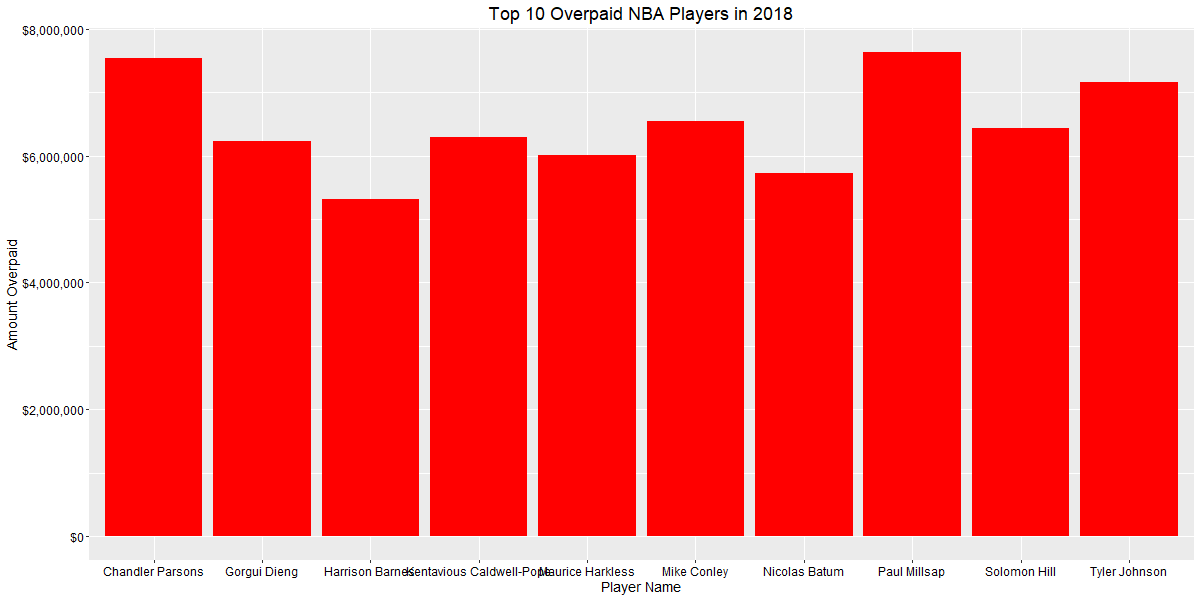

In [126]:
%%R -i top_10_overpaid_18 -w 1200 -h 600 -u px
options(scipen=999)
player_overpaid_bar_18 <- ggplot(top_10_overpaid_18, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "red") + 
labs(x = "Player Name", y = "Amount Overpaid") + ggtitle("Top 10 Overpaid NBA Players in 2018") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) + 
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour="black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))

ggsave(file="player_overpaid_bar_18.png")
player_overpaid_bar_18

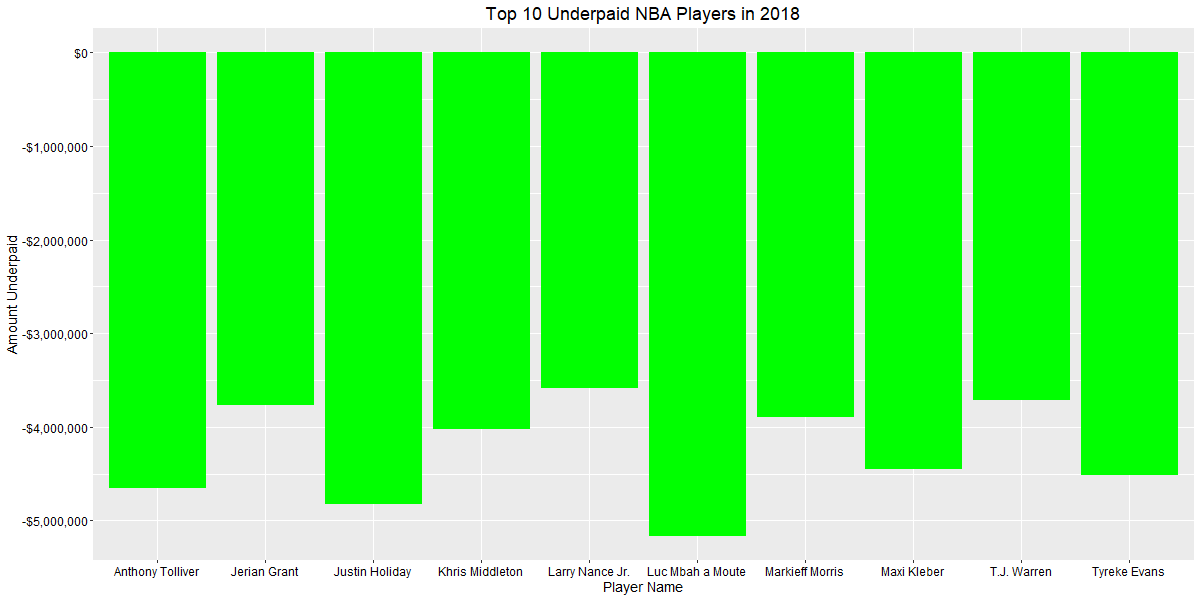

In [127]:
%%R -i top_10_underpaid_18 -w 1200 -h 600 -u px

player_underpaid_bar_18 <- ggplot(top_10_underpaid_18, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "green") + 
labs(x = "Player Name", y = "Amount Underpaid") + ggtitle("Top 10 Underpaid NBA Players in 2018") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) +
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text=element_text(size=12, colour = "black"),
     axis.title.x=element_text(size=14),
     axis.title.y=element_text(size=14))
ggsave(file="player_underpaid_bar_18.png")
player_underpaid_bar_18

# Running 2019 Data in the Model

In [128]:
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor, plot_importance 
xgb_model1 = XGBRegressor()
xgb_model1.fit(features_19, labels_19, verbose=False)
y_train_pred1 = xgb_model1.predict(features_19)
y_pred1 = xgb_model1.predict(features_19)

print('Train r2 score: ', r2_score(y_train_pred1, labels_19))
print('Test r2 score: ', r2_score(labels_19, y_pred1))
train_mse1 = mean_squared_error(y_train_pred1, labels_19)
test_mse1 = mean_squared_error(y_pred1, labels_19)
train_rmse1 = np.sqrt(train_mse1)
test_rmse1 = np.sqrt(test_mse1)
print('Train RMSE: %.4f' % train_rmse1)
print('Test RMSE: %.4f' % test_rmse1)

[13:36:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train r2 score:  0.8977170573157198
Test r2 score:  0.9229840607401892
Train RMSE: 2246050.5422
Test RMSE: 2246050.5422


In [129]:
y_train_xgb = pd.DataFrame(labels_19, columns=["Salary"])
y_predict_xgb = pd.DataFrame(y_train_pred1, columns=["Prediction"])

train_predictions_xgb = pd.DataFrame(np.concatenate([nba_subset_19, y_predict_xgb], axis=1), columns= ["Salary", "Age", "Player_Efficiency_Rating", "Blocks", "Turnovers_Pct", "Steals", "Assists_Pct", "Games_Started", "Games_Played", "Total_Rebounds", "Field_Goals", "Defensive_Box_Plus_Minus", "Defensive_Rebound_Pct", "Usage_Pct", "Free_Throws", "Prediction"])
train_predictions_xgb.head(5)

,Salary,Age,Player_Efficiency_Rating,Blocks,Turnovers_Pct,Steals,Assists_Pct,Games_Started,Games_Played,Total_Rebounds,Field_Goals,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct,Free_Throws,Prediction
0,270014.0,0.523810,0.231003,0.025126,0.735075,0.082353,0.416842,0.012195,0.414634,0.048701,0.045077,-0.119048,0.203980,0.333333,0.009284,1346993.25
1,24157303.0,0.595238,0.562310,0.381910,0.470149,0.688235,0.138947,0.975610,0.975610,0.616883,0.570581,0.095238,0.245439,0.404938,0.193634,20528162.00
2,2955840.0,0.500000,0.544073,0.326633,0.638060,0.417647,0.298947,0.341463,1.000000,0.484578,0.332147,0.523810,0.398010,0.390123,0.220159,2871048.25
3,22347015.0,0.785714,0.696049,0.537688,0.328358,0.252941,0.244211,0.987805,0.987805,0.603896,0.811388,-0.142857,0.328358,0.664198,0.462865,22380306.00
4,2074320.0,0.547619,0.227964,0.030151,0.518657,0.035294,0.187368,0.024390,0.463415,0.018669,0.079478,-0.500000,0.084577,0.602469,0.059682,3076324.75


In [130]:
y_predict_xgb.reset_index(drop=True, inplace=True)
final_19.reset_index(drop=True, inplace=True)
names_19_actual.reset_index(drop=True, inplace=True)

In [131]:
final_df = pd.concat([y_predict_xgb, final_19], axis=1)
final_df = final_df.drop(['Player_Name'], axis=1)
final_df = final_df.drop(final_df.columns[3], axis=1)

final_df = pd.concat([final_df, names_19_actual], axis=1)
# final_df = final_df.dropna()
final_df.head(5)

,Prediction,Position,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,True_Shooting_Pct,Three_Point_Attempt_Rate,Free_Throw_Rate,Offensive_Rebound_Pct,Defensive_Rebound_Pct,Total_Rebound_Pct,Assists_Pct,Steals_Pct,Blocks_Pct,Turnovers_Pct,Usage_Pct,Offensive_Win_Shares,Defensive_Win_Shares,Win_Shares,Win_Shares/48,Offensive_Box_Plus_Minus,Defensive_Box_Plus_Minus,Box_Plus_Minus,Value_Over_Replacement_Player,Year,Salary,Player_Name
0,1346993.25,5,22.0,34.0,1.0,428.0,38.0,110.0,0.345,25.0,74.0,0.338,13.0,36.0,0.361,0.459,7.0,9.0,0.778,11.0,49.0,60.0,65.0,14.0,5.0,28.0,45.0,7.6,0.474,0.673,0.082,2.6,12.3,7.4,19.8,1.5,1.0,19.7,13.5,-0.1,0.2,0.1,0.011,-3.8,-0.5,-4.3,-0.2,2019.0,270014.0,Jaylen Adams
1,20528162.00,0,25.0,80.0,80.0,2669.0,481.0,809.0,0.595,0.0,2.0,0.000,481.0,807.0,0.596,0.595,146.0,292.0,0.500,391.0,369.0,760.0,124.0,117.0,76.0,135.0,204.0,18.5,0.591,0.002,0.361,14.7,14.8,14.7,6.6,2.0,2.4,12.6,16.4,5.1,4.0,9.1,0.163,0.7,0.4,1.1,2.1,2019.0,24157303.0,Steven Adams
2,2871048.25,0,21.0,82.0,28.0,1913.0,280.0,486.0,0.576,3.0,15.0,0.200,277.0,471.0,0.588,0.579,166.0,226.0,0.735,165.0,432.0,597.0,184.0,71.0,65.0,121.0,203.0,17.9,0.623,0.031,0.465,9.2,24.0,16.6,14.2,1.8,3.0,17.1,15.8,3.4,3.4,6.8,0.171,-0.4,2.2,1.8,1.8,2019.0,2955840.0,Bam Adebayo
3,22380306.00,0,33.0,81.0,81.0,2687.0,684.0,1319.0,0.519,10.0,42.0,0.238,674.0,1277.0,0.528,0.522,349.0,412.0,0.847,251.0,493.0,744.0,194.0,43.0,107.0,144.0,179.0,22.9,0.576,0.032,0.312,10.3,19.8,15.1,11.6,0.8,3.4,8.8,26.9,6.4,2.9,9.3,0.167,2.4,-0.6,1.8,2.6,2019.0,22347015.0,LaMarcus Aldridge
4,3076324.75,10,23.0,38.0,2.0,416.0,67.0,178.0,0.376,32.0,99.0,0.323,35.0,79.0,0.443,0.466,45.0,60.0,0.750,3.0,20.0,23.0,25.0,6.0,6.0,33.0,47.0,7.5,0.516,0.556,0.337,0.8,5.1,3.0,8.9,0.7,1.1,13.9,24.4,-0.4,0.4,0.0,0.002,-4.2,-2.1,-6.3,-0.5,2019.0,2074320.0,Grayson Allen


In [132]:
final_df['Salary-Prediction'] = final_df['Salary'] - final_df['Prediction']

**Rearranging the columns**

In [133]:
cols = list(final_df.columns.values)

In [134]:
cols = ['Player_Name', 'Salary', 'Prediction', 'Salary-Prediction', 'Age',
 'Games_Played',
 'Games_Started',
 'Minutes_Played',
 'Field_Goals',
 'Field_Goals_Attempted',
 'Field_Goal_Pct',
 'Three_Pointers',
 'Three_Pointers_Attempted',
 'Three_Pointers_Pct',
 'Two_Pointers',
 'Two_Pointers_Attempted',
 'Two_Pointers_Pct',
 'Effective_Field_Goal_Pct',
 'Free_Throws',
 'Free_Throws_Attempted',
 'Free_Throws_Pct',
 'Offensive_Rebounds',
 'Defensive_Rebounds',
 'Total_Rebounds',
 'Assists',
 'Steals',
 'Blocks',
 'Turnovers',
 'Personal_Fouls',
 'Player_Efficiency_Rating',
 'Turnovers_Pct',
 'Assists_Pct',
 'Defensive_Box_Plus_Minus',
 'Defensive_Rebound_Pct',
 'Usage_Pct']

final_df = final_df[cols]
final_df['Prediction'] = final_df['Prediction'].astype('int64')

final_df.head(5)

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
0,Jaylen Adams,270014.0,1346993,-1076979.25,22.0,34.0,1.0,428.0,38.0,110.0,0.345,25.0,74.0,0.338,13.0,36.0,0.361,0.459,7.0,9.0,0.778,11.0,49.0,60.0,65.0,14.0,5.0,28.0,45.0,7.6,19.7,19.8,-0.5,12.3,13.5
1,Steven Adams,24157303.0,20528162,3629141.00,25.0,80.0,80.0,2669.0,481.0,809.0,0.595,0.0,2.0,0.000,481.0,807.0,0.596,0.595,146.0,292.0,0.500,391.0,369.0,760.0,124.0,117.0,76.0,135.0,204.0,18.5,12.6,6.6,0.4,14.8,16.4
2,Bam Adebayo,2955840.0,2871048,84791.75,21.0,82.0,28.0,1913.0,280.0,486.0,0.576,3.0,15.0,0.200,277.0,471.0,0.588,0.579,166.0,226.0,0.735,165.0,432.0,597.0,184.0,71.0,65.0,121.0,203.0,17.9,17.1,14.2,2.2,24.0,15.8
3,LaMarcus Aldridge,22347015.0,22380306,-33291.00,33.0,81.0,81.0,2687.0,684.0,1319.0,0.519,10.0,42.0,0.238,674.0,1277.0,0.528,0.522,349.0,412.0,0.847,251.0,493.0,744.0,194.0,43.0,107.0,144.0,179.0,22.9,8.8,11.6,-0.6,19.8,26.9
4,Grayson Allen,2074320.0,3076324,-1002004.75,23.0,38.0,2.0,416.0,67.0,178.0,0.376,32.0,99.0,0.323,35.0,79.0,0.443,0.466,45.0,60.0,0.750,3.0,20.0,23.0,25.0,6.0,6.0,33.0,47.0,7.5,13.9,8.9,-2.1,5.1,24.4


In [135]:
final_df_overpaid_19 = final_df.sort_values("Salary-Prediction", ascending = False)
top_10_overpaid_19 = final_df_overpaid_19.head(10)
top_10_overpaid_19

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
171,Gordon Hayward,31214295.0,20861014,10353281.0,28.0,72.0,18.0,1863.0,296.0,635.0,0.466,77.0,231.0,0.333,219.0,404.0,0.542,0.527,156.0,187.0,0.834,51.0,271.0,322.0,244.0,62.0,23.0,105.0,104.0,15.6,12.8,18.4,0.4,15.5,19.0
300,Chandler Parsons,24107258.0,16017678,8089580.0,30.0,25.0,3.0,496.0,68.0,182.0,0.374,29.0,94.0,0.309,39.0,88.0,0.443,0.453,22.0,25.0,0.880,4.0,66.0,70.0,43.0,19.0,5.0,32.0,45.0,8.5,14.2,13.4,-0.5,15.2,20.3
298,Jabari Parker,20000000.0,12211210,7788790.0,23.0,64.0,17.0,1724.0,369.0,749.0,0.493,61.0,195.0,0.313,308.0,554.0,0.556,0.533,131.0,184.0,0.712,79.0,342.0,421.0,152.0,46.0,30.0,151.0,145.0,15.5,15.4,14.1,-0.9,21.8,24.6
203,Tyler Johnson,19356932.0,11852434,7504498.0,26.0,57.0,22.0,1529.0,217.0,526.0,0.413,90.0,260.0,0.346,127.0,266.0,0.477,0.498,95.0,127.0,0.748,34.0,139.0,173.0,166.0,54.0,27.0,77.0,97.0,12.4,11.7,15.9,0.3,9.8,18.5
266,Paul Millsap,29230769.0,22118664,7112105.0,33.0,70.0,65.0,1895.0,322.0,665.0,0.484,58.0,159.0,0.365,264.0,506.0,0.522,0.528,181.0,249.0,0.727,153.0,352.0,505.0,141.0,83.0,54.0,95.0,183.0,17.9,10.9,10.6,1.0,20.2,19.6
9,Ryan Anderson,20421546.0,13536294,6885252.0,30.0,25.0,8.0,322.0,21.0,69.0,0.304,9.0,40.0,0.225,12.0,29.0,0.414,0.370,12.0,16.0,0.750,18.0,36.0,54.0,19.0,4.0,1.0,14.0,25.0,4.6,15.5,7.8,-1.9,12.5,12.0
175,George Hill,19000000.0,12303144,6696856.0,32.0,60.0,13.0,1302.0,170.0,376.0,0.452,48.0,153.0,0.314,122.0,223.0,0.547,0.516,70.0,85.0,0.824,39.0,109.0,148.0,135.0,52.0,8.0,51.0,102.0,12.1,11.0,14.0,0.5,8.3,15.1
212,Michael Kidd-Gilchrist,13000000.0,7017022,5982977.5,25.0,64.0,3.0,1179.0,158.0,332.0,0.476,16.0,47.0,0.340,142.0,285.0,0.498,0.500,95.0,123.0,0.772,88.0,158.0,246.0,61.0,32.0,39.0,43.0,156.0,13.3,10.0,7.4,-0.1,14.8,15.7
293,Victor Oladipo,21000000.0,15070530,5929470.0,26.0,36.0,36.0,1147.0,249.0,588.0,0.423,74.0,216.0,0.343,175.0,372.0,0.470,0.486,103.0,141.0,0.730,21.0,181.0,202.0,186.0,60.0,11.0,82.0,72.0,17.6,11.2,25.2,1.2,17.1,27.9
90,Allen Crabbe,18500000.0,12762518,5737482.0,26.0,43.0,20.0,1133.0,137.0,373.0,0.367,98.0,259.0,0.378,39.0,114.0,0.342,0.499,41.0,56.0,0.732,16.0,132.0,148.0,46.0,23.0,13.0,46.0,102.0,7.7,10.4,5.8,-0.4,12.2,16.4


In [136]:
final_df_underpaid_19 = final_df.sort_values("Salary-Prediction", ascending = True)
top_10_underpaid_19 = final_df_underpaid_19.head(10)
top_10_underpaid_19

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
219,Kyle Kuzma,1689840.0,7623985,-5934145.5,23.0,70.0,68.0,2314.0,496.0,1087.0,0.456,128.0,422.0,0.303,368.0,665.0,0.553,0.515,188.0,250.0,0.752,60.0,322.0,382.0,178.0,41.0,26.0,133.0,170.0,14.0,10.0,11.5,-1.2,14.1,23.8
52,Malcolm Brogdon,1544951.0,6238412,-4693461.0,26.0,64.0,64.0,1832.0,378.0,748.0,0.505,104.0,244.0,0.426,274.0,504.0,0.544,0.575,141.0,152.0,0.928,65.0,223.0,288.0,205.0,46.0,13.0,91.0,102.0,17.8,10.0,16.2,0.1,11.7,20.7
231,Jeremy Lin,487109.0,5085279,-4598170.0,30.0,74.0,4.0,1436.0,238.0,541.0,0.440,55.0,187.0,0.294,183.0,354.0,0.517,0.491,176.0,210.0,0.838,22.0,157.0,179.0,231.0,47.0,13.0,124.0,144.0,13.5,16.4,23.4,-0.9,11.7,21.8
272,Markieff Morris,427288.0,4961320,-4534032.0,29.0,58.0,16.0,1270.0,204.0,484.0,0.421,68.0,203.0,0.335,136.0,281.0,0.484,0.492,71.0,92.0,0.772,61.0,204.0,265.0,79.0,36.0,22.0,54.0,175.0,11.7,9.3,8.8,-0.6,17.5,19.1
246,Wesley Matthews,512746.0,4922741,-4409995.5,32.0,69.0,68.0,2091.0,279.0,698.0,0.400,150.0,403.0,0.372,129.0,295.0,0.437,0.507,132.0,163.0,0.810,32.0,138.0,170.0,160.0,54.0,17.0,91.0,160.0,10.3,10.6,11.1,-0.5,7.1,17.8
252,JaVale McGee,1512601.0,5862542,-4349941.5,31.0,75.0,62.0,1671.0,400.0,641.0,0.624,1.0,12.0,0.083,399.0,629.0,0.634,0.625,96.0,152.0,0.632,195.0,371.0,566.0,52.0,47.0,148.0,108.0,208.0,21.8,13.2,4.8,1.2,22.5,20.2
155,Jeff Green,1512601.0,5773879,-4261278.5,32.0,77.0,44.0,2097.0,326.0,687.0,0.475,111.0,320.0,0.347,215.0,367.0,0.586,0.555,183.0,206.0,0.888,57.0,252.0,309.0,137.0,43.0,39.0,101.0,160.0,13.6,11.5,9.2,-1.4,13.3,17.8
279,Larry Nance Jr.,2272391.0,6302699,-4030308.5,26.0,67.0,30.0,1795.0,249.0,479.0,0.520,33.0,98.0,0.337,216.0,381.0,0.567,0.554,96.0,134.0,0.716,168.0,384.0,552.0,214.0,100.0,40.0,97.0,192.0,18.6,15.3,17.8,1.4,24.9,15.5
210,Enes Kanter,487109.0,4515775,-4028666.0,26.0,67.0,31.0,1640.0,375.0,683.0,0.549,10.0,34.0,0.294,365.0,649.0,0.562,0.556,155.0,197.0,0.787,257.0,402.0,659.0,116.0,32.0,26.0,118.0,167.0,22.3,13.3,12.1,-1.5,26.1,23.1
174,Buddy Hield,3844760.0,7853181,-4008421.0,26.0,82.0,82.0,2615.0,623.0,1360.0,0.458,278.0,651.0,0.427,345.0,709.0,0.487,0.560,171.0,193.0,0.886,106.0,306.0,412.0,205.0,58.0,33.0,146.0,202.0,17.5,9.2,11.9,-1.4,12.4,25.1


**Making the Plots**

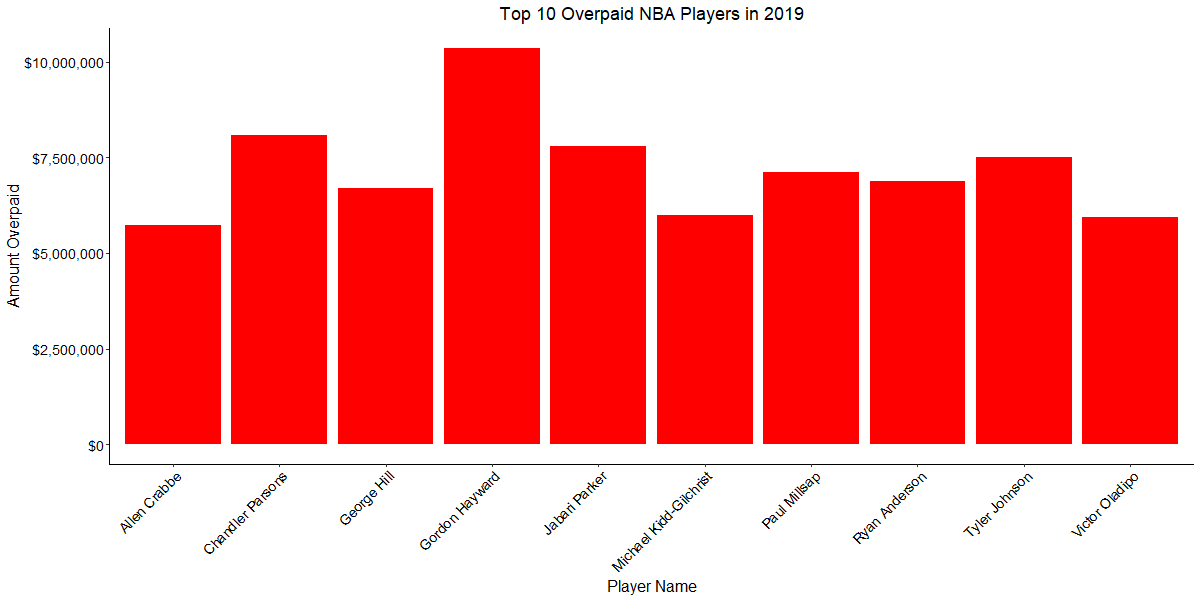

In [137]:
%%R -i top_10_overpaid_19 -w 1200 -h 600 -u px
options(scipen=999)
player_overpaid_bar_19 <- ggplot(top_10_overpaid_19, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "red") + 
labs(x = "Player Name", y = "Amount Overpaid") + ggtitle("Top 10 Overpaid NBA Players in 2019") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) + theme_classic() +
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text.x=element_text(size=14, colour="black", angle = 45, hjust = 1.0),
      axis.text.y=element_text(size=14, colour="black"),
     axis.title.x=element_text(size=16),
     axis.title.y=element_text(size=16))

ggsave(file="player_overpaid_bar_19.png")
player_overpaid_bar_19

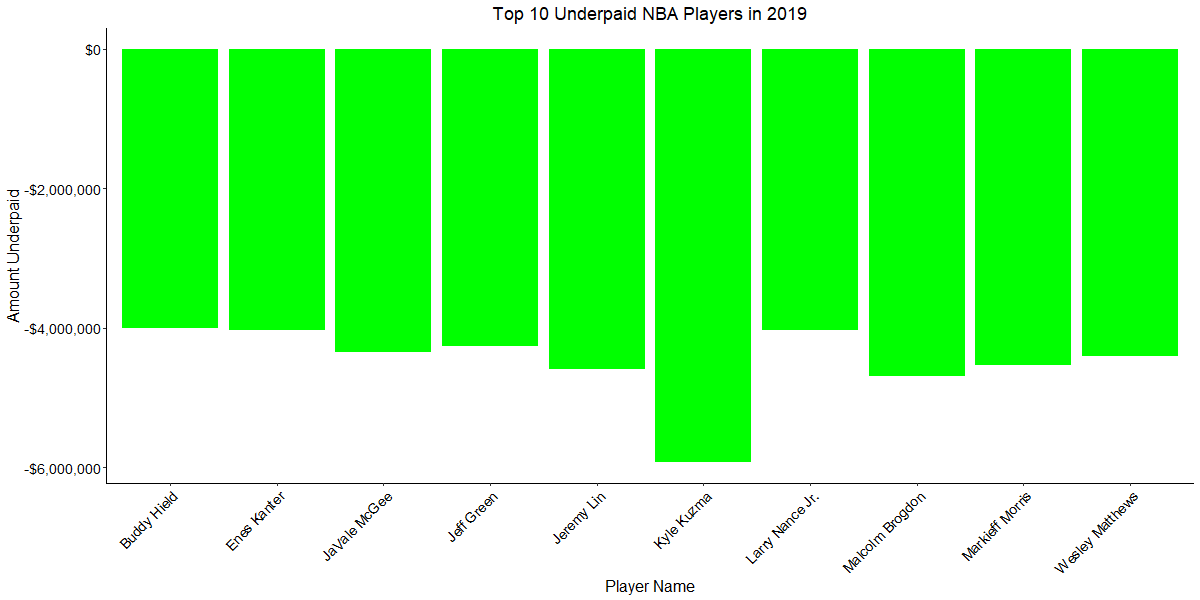

In [138]:
%%R -i top_10_underpaid_19 -w 1200 -h 600 -u px

player_underpaid_bar_19 <- ggplot(top_10_underpaid_19, aes(x = Player_Name, y=Salary-Prediction)) + geom_bar(stat="identity",fill = "green") + 
labs(x = "Player Name", y = "Amount Underpaid") + ggtitle("Top 10 Underpaid NBA Players in 2019") + 
scale_y_continuous(labels=scales::dollar_format(prefix="$")) + theme_classic() +
theme(plot.title = element_text(hjust = 0.5, size=18),
      axis.text.x=element_text(size=14, colour="black", angle = 45, hjust = 1.0),
      axis.text.y=element_text(size=14, colour="black"),
     axis.title.x=element_text(size=16),
     axis.title.y=element_text(size=16))

ggsave(file="player_underpaid_bar_19.png")
player_underpaid_bar_19

# Summary of Model Generalization

| Year | $R^2$ | RMSE |  
| ---- | ---- | ---- |  
| 2010 | 0.946 | 1,099,627 |  
| 2011 | 0.949 | 1,070,874 |  
| 2012 | 0.957 | 989,150 |  
| 2013 | 0.942 | 1,132,491 |  
| 2014 | 0.946 | 1,174,769 |  
| 2015 | 0.940 | 1,204,874 |  
| 2016 | 0.955 | 1,147,450 |  
| 2017 | 0.940 | 1,641,827 |  
| 2018 | 0.926 | 2,124,853 |  
| 2019 | 0.923 | 2,246,051 |  


# Most Overpaid Players from 2010-2019

In [185]:
df_summary_overpaid = pd.concat([top_10_overpaid_10, top_10_overpaid_11, top_10_overpaid_12, top_10_overpaid_13, top_10_overpaid_14, top_10_overpaid_15, top_10_overpaid_16, top_10_overpaid_17, top_10_overpaid_18, top_10_overpaid_19])
df_summary_overpaid

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
195,Tim Duncan,"22,183,220.0",880920,"21,302,299.5625",33.0,78.0,77.0,"2,438.0",561.0,"1,082.0",0.518,2.0,11.0,0.182,559.0,"1,071.0",0.522,0.519,271.0,374.0,0.725,221.0,567.0,788.0,246.0,45.0,117.0,140.0,152.0,24.7,10.1,17.8,1.8,26.8,26.0
109,Kobe Bryant,"23,034,375.0",3125619,"19,908,755.25",31.0,73.0,73.0,"2,835.0",716.0,"1,569.0",0.456,99.0,301.0,0.32899999999999996,617.0,"1,268.0",0.48700000000000004,0.488,439.0,541.0,0.8109999999999999,78.0,313.0,391.0,365.0,113.0,20.0,233.0,187.0,21.9,11.4,23.8,0.2,12.2,32.3
91,Elton Brand,"14,858,472.0",907392,"13,951,079.1875",30.0,76.0,57.0,"2,297.0",412.0,858.0,0.48,0.0,1.0,0.0,412.0,857.0,0.48100000000000004,0.48,172.0,233.0,0.738,179.0,282.0,461.0,109.0,82.0,80.0,131.0,232.0,15.7,12.0,7.9,-0.7,14.7,21.7
133,Vince Carter,"16,123,250.0",3793071,"12,330,178.75",33.0,75.0,74.0,"2,310.0",434.0,"1,015.0",0.428,119.0,324.0,0.36700000000000005,315.0,691.0,0.456,0.486,257.0,306.0,0.84,33.0,260.0,293.0,236.0,53.0,18.0,106.0,189.0,17.1,8.4,17.8,0.4,12.6,25.2
21,Carmelo Anthony,"15,779,912.0",4990881,"10,789,031.0",25.0,69.0,69.0,"2,634.0",688.0,"1,502.0",0.45799999999999996,59.0,187.0,0.316,629.0,"1,315.0",0.478,0.478,508.0,612.0,0.83,152.0,302.0,454.0,222.0,88.0,30.0,209.0,225.0,22.2,10.6,15.9,-1.2,13.1,33.4
337,Andre Iguodala,"12,200,000.0",1443273,"10,756,726.75",26.0,82.0,82.0,"3,193.0",496.0,"1,120.0",0.44299999999999995,94.0,303.0,0.31,402.0,817.0,0.49200000000000005,0.485,315.0,430.0,0.733,82.0,447.0,529.0,472.0,141.0,55.0,218.0,145.0,17.8,14.3,23.7,0.4,16.8,21.8
321,Josh Howard,"10,890,000.0",242632,"10,647,367.875",29.0,35.0,12.0,918.0,157.0,388.0,0.405,23.0,86.0,0.267,134.0,302.0,0.444,0.434,109.0,139.0,0.784,30.0,95.0,125.0,48.0,26.0,11.0,46.0,91.0,12.7,9.3,8.5,-1.1,11.8,24.8
87,Chris Bosh,"15,779,912.0",5605472,"10,174,440.0",25.0,70.0,70.0,"2,526.0",600.0,"1,158.0",0.518,8.0,22.0,0.364,592.0,"1,136.0",0.521,0.522,470.0,590.0,0.797,205.0,554.0,759.0,166.0,43.0,68.0,169.0,170.0,25.0,10.7,11.5,-1.2,25.2,28.7
73,Chauncey Billups,"12,100,000.0",2014230,"10,085,770.0",33.0,73.0,73.0,"2,490.0",402.0,962.0,0.418,157.0,407.0,0.386,245.0,555.0,0.441,0.499,466.0,512.0,0.91,25.0,203.0,228.0,409.0,82.0,9.0,177.0,153.0,20.2,13.0,26.1,-0.8,9.3,24.3
167,Baron Davis,"12,100,000.0",2086629,"10,013,370.125",30.0,75.0,73.0,"2,523.0",412.0,"1,015.0",0.406,82.0,296.0,0.27699999999999997,330.0,719.0,0.45899999999999996,0.446,239.0,291.0,0.821,52.0,214.0,266.0,598.0,126.0,43.0,211.0,210.0,17.4,15.6,39.6,0.0,9.9,24.3


In [186]:
df_summary_overpaid = df_summary_overpaid[["Player_Name", "Salary-Prediction"]]
df_summary_overpaid

,Player_Name,Salary-Prediction
195,Tim Duncan,"21,302,299.5625"
109,Kobe Bryant,"19,908,755.25"
91,Elton Brand,"13,951,079.1875"
133,Vince Carter,"12,330,178.75"
21,Carmelo Anthony,"10,789,031.0"
337,Andre Iguodala,"10,756,726.75"
321,Josh Howard,"10,647,367.875"
87,Chris Bosh,"10,174,440.0"
73,Chauncey Billups,"10,085,770.0"
167,Baron Davis,"10,013,370.125"


In [187]:
years_total = df_summary_overpaid.groupby(['Player_Name']).count().sort_values('Salary-Prediction', ascending=False)
years_total

,Salary-Prediction
Player_Name,
Andre Iguodala,4
Chandler Parsons,4
Joe Johnson,3
Paul Millsap,2
Caron Butler,2
Kris Humphries,2
Marcus Thornton,2
Michael Kidd-Gilchrist,2
Eric Gordon,2


In [188]:
#pd.options.display.float_format = '{:.0f}'.format
pd.options.display.float_format = '{:,}'.format
amount_total = df_summary_overpaid.groupby(['Player_Name']).sum().sort_values('Salary-Prediction', ascending=False)
amount_total

,Salary-Prediction
Player_Name,
Chandler Parsons,"26,630,132.0"
Tim Duncan,"21,302,299.5625"
Kobe Bryant,"19,908,755.25"
Andre Iguodala,"19,551,666.75"
Vince Carter,"15,397,011.75"
Paul Millsap,"14,738,070.0"
Tyler Johnson,"14,657,054.0"
Elton Brand,"13,951,079.1875"
Joe Johnson,"11,777,641.0"


In [202]:
overpaid_result = pd.merge(years_total,
                          amount_total[["Salary-Prediction"]],
                          on="Player_Name")
overpaid_result.columns = ["Years Overpaid", "Total Amount Overpaid"]
overpaid_result['Total Amount Overpaid'] = overpaid_result['Total Amount Overpaid'].apply(lambda x: "${:,.2f}".format((x)))
overpaid_result

,Years Overpaid,Total Amount Overpaid
Player_Name,,
Andre Iguodala,4,"$19,551,666.75"
Chandler Parsons,4,"$26,630,132.00"
Joe Johnson,3,"$11,777,641.00"
Paul Millsap,2,"$14,738,070.00"
Caron Butler,2,"$5,770,528.00"
Kris Humphries,2,"$8,248,974.50"
Marcus Thornton,2,"$6,880,623.50"
Michael Kidd-Gilchrist,2,"$9,570,985.00"
Eric Gordon,2,"$7,066,979.00"


# Most Underpaid Players from 2010-2019

In [212]:
df_summary_underpaid = pd.concat([top_10_underpaid_10, top_10_underpaid_11, top_10_underpaid_12, top_10_underpaid_13, top_10_underpaid_14, top_10_underpaid_15, top_10_underpaid_16, top_10_underpaid_17, top_10_underpaid_18, top_10_underpaid_19])
df_summary_underpaid

,Player_Name,Salary,Prediction,Salary-Prediction,Age,Games_Played,Games_Started,Minutes_Played,Field_Goals,Field_Goals_Attempted,Field_Goal_Pct,Three_Pointers,Three_Pointers_Attempted,Three_Pointers_Pct,Two_Pointers,Two_Pointers_Attempted,Two_Pointers_Pct,Effective_Field_Goal_Pct,Free_Throws,Free_Throws_Attempted,Free_Throws_Pct,Offensive_Rebounds,Defensive_Rebounds,Total_Rebounds,Assists,Steals,Blocks,Turnovers,Personal_Fouls,Player_Efficiency_Rating,Turnovers_Pct,Assists_Pct,Defensive_Box_Plus_Minus,Defensive_Rebound_Pct,Usage_Pct
97,Aaron Brooks,"1,118,520.0",21628846,"-20,510,326.0",25.0,82.0,82.0,"2,919.0",575.0,"1,331.0",0.43200000000000005,209.0,525.0,0.39799999999999996,366.0,806.0,0.45399999999999996,0.511,245.0,298.0,0.8220000000000001,54.0,161.0,215.0,434.0,69.0,14.0,232.0,199.0,16.0,13.7,25.6,-1.6,6.6,25.7
239,Rudy Gay,"3,280,997.0",19312470,"-16,031,473.0",23.0,80.0,80.0,"3,175.0",600.0,"1,288.0",0.466,66.0,202.0,0.327,534.0,"1,086.0",0.49200000000000005,0.491,301.0,400.0,0.753,115.0,357.0,472.0,153.0,118.0,64.0,169.0,201.0,16.2,10.3,7.8,-0.3,13.2,22.5
11,Rafer Alston,"475,875.0",15781898,"-15,306,023.0",33.0,52.0,38.0,"1,421.0",155.0,446.0,0.348,58.0,168.0,0.345,97.0,278.0,0.349,0.413,59.0,81.0,0.728,13.0,116.0,129.0,176.0,50.0,10.0,95.0,103.0,8.2,16.5,20.2,-0.5,9.7,18.8
261,Stephen Graham,"825,497.0",15574602,"-14,749,105.0",27.0,70.0,8.0,804.0,119.0,240.0,0.496,16.0,50.0,0.32,103.0,190.0,0.542,0.529,42.0,65.0,0.6459999999999999,24.0,111.0,135.0,23.0,20.0,10.0,36.0,94.0,11.2,11.8,5.0,0.8,16.3,17.6
307,Jordan Hill,"2,483,280.0",16427102,"-13,943,822.0",22.0,47.0,0.0,624.0,99.0,201.0,0.493,0.0,2.0,0.0,99.0,199.0,0.49700000000000005,0.493,46.0,68.0,0.6759999999999999,76.0,99.0,175.0,20.0,14.0,21.0,30.0,92.0,15.0,11.5,5.2,-1.4,18.7,18.7
159,Dante Cunningham,"457,588.0",14191066,"-13,733,478.0",22.0,63.0,2.0,707.0,106.0,214.0,0.495,0.0,2.0,0.0,106.0,212.0,0.5,0.495,31.0,48.0,0.6459999999999999,54.0,106.0,160.0,14.0,24.0,22.0,15.0,97.0,14.3,6.0,3.3,0.2,18.7,16.8
175,Carlos Delfino,"3,500,000.0",15601446,"-12,101,446.0",27.0,75.0,66.0,"2,279.0",299.0,732.0,0.408,134.0,365.0,0.36700000000000005,165.0,367.0,0.45,0.5,93.0,119.0,0.782,51.0,343.0,394.0,202.0,80.0,21.0,119.0,138.0,12.9,13.2,14.0,1.5,18.0,18.0
325,Lester Hudson,"457,588.0",12029192,"-11,571,604.0",25.0,25.0,0.0,131.0,21.0,53.0,0.396,5.0,16.0,0.313,16.0,37.0,0.43200000000000005,0.44299999999999995,11.0,13.0,0.846,7.0,11.0,18.0,13.0,8.0,3.0,14.0,12.0,13.2,19.3,15.7,0.5,9.9,25.0
45,J.J. Barea,"1,657,500.0",12947800,"-11,290,300.0",25.0,78.0,18.0,"1,546.0",232.0,527.0,0.44,56.0,157.0,0.35700000000000004,176.0,370.0,0.47600000000000003,0.493,76.0,90.0,0.8440000000000001,17.0,129.0,146.0,258.0,35.0,6.0,102.0,119.0,12.8,15.3,26.1,-0.7,9.5,19.9
139,Wilson Chandler,"1,255,440.0",11741122,"-10,485,682.0",22.0,65.0,64.0,"2,320.0",412.0,860.0,0.479,40.0,150.0,0.267,372.0,710.0,0.524,0.502,129.0,160.0,0.8059999999999999,93.0,255.0,348.0,138.0,46.0,49.0,108.0,184.0,13.7,10.4,9.8,-1.1,12.7,20.2


In [213]:
df_summary_underpaid = df_summary_underpaid[["Player_Name", "Salary-Prediction"]]
df_summary_underpaid

,Player_Name,Salary-Prediction
97,Aaron Brooks,"-20,510,326.0"
239,Rudy Gay,"-16,031,473.0"
11,Rafer Alston,"-15,306,023.0"
261,Stephen Graham,"-14,749,105.0"
307,Jordan Hill,"-13,943,822.0"
159,Dante Cunningham,"-13,733,478.0"
175,Carlos Delfino,"-12,101,446.0"
325,Lester Hudson,"-11,571,604.0"
45,J.J. Barea,"-11,290,300.0"
139,Wilson Chandler,"-10,485,682.0"


In [214]:
years_total_under = df_summary_underpaid.groupby(['Player_Name']).count().sort_values('Salary-Prediction', ascending=False)
years_total_under

,Salary-Prediction
Player_Name,
Pau Gasol,2
Chandler Parsons,2
P.J. Tucker,2
J.J. Barea,2
Deron Williams,2
Raymond Felton,2
David West,2
Matt Barnes,2
Markieff Morris,2


In [215]:
amount_total_under = df_summary_underpaid.groupby(['Player_Name']).sum().sort_values('Salary-Prediction', ascending=True)
amount_total_under

,Salary-Prediction
Player_Name,
Aaron Brooks,"-20,510,326.0"
Rudy Gay,"-16,031,473.0"
Rafer Alston,"-15,306,023.0"
Stephen Graham,"-14,749,105.0"
Jordan Hill,"-13,943,822.0"
J.J. Barea,"-13,850,090.0"
Dante Cunningham,"-13,733,478.0"
Carlos Delfino,"-12,101,446.0"
Lester Hudson,"-11,571,604.0"


In [217]:
underpaid_result = pd.merge(years_total_under,
                          amount_total_under[["Salary-Prediction"]],
                          on="Player_Name")
underpaid_result.columns = ["Years Underpaid", "Total Amount Underpaid"]
underpaid_result['Total Amount Underpaid'] = underpaid_result['Total Amount Underpaid'].apply(lambda x: "${:,.2f}".format((x)))
underpaid_result.sort_values(['Years Underpaid', 'Total Amount Underpaid'], ascending=[False, True])

,Years Underpaid,Total Amount Underpaid
Player_Name,,
J.J. Barea,2,"$-13,850,090.00"
Tony Allen,2,"$-3,723,978.50"
Nick Young,2,"$-4,238,423.00"
Leandro Barbosa,2,"$-5,007,441.00"
Raymond Felton,2,"$-5,023,405.25"
P.J. Tucker,2,"$-5,053,912.50"
Chandler Parsons,2,"$-5,178,526.00"
David West,2,"$-5,228,552.00"
Pau Gasol,2,"$-5,267,324.00"
